> [基於時間序列的 CNN](https://journalofbigdata.springeropen.com/articles/10.1186/s40537-022-00599-y)

>

# 卷積神經網絡(convolutional neural network)

> 時間序列特徵選取

> 單變量取 lag (延遲天數)

> 用 CNN 或 PCA 做降維

> 最後，前面做完再考慮處理時間序列的自相關
  * CCF(交叉相關)  或 ACF (自相關)

# 卷積神經網絡(convolutional neural network)概念


## 安裝拓譜圖的視覺化套件

*   [Graphviz 安裝方法](https://blog.csdn.net/QAQIknow/article/details/119188790)



In [5]:
# !pip install pydot==1.4.2

  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
Using cached pyparsing-3.1.2-py3-none-any.whl (103 kB)


In [6]:
# !pip install onnx

   ---------------------------------------- 0.0/14.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.4 MB 640.0 kB/s eta 0:00:23
   ---------------------------------------- 0.0/14.4 MB 487.6 kB/s eta 0:00:30
   ---------------------------------------- 0.2/14.4 MB 1.4 MB/s eta 0:00:11
    --------------------------------------- 0.3/14.4 MB 2.1 MB/s eta 0:00:07
   - -------------------------------------- 0.6/14.4 MB 3.1 MB/s eta 0:00:05
   -- ------------------------------------- 0.9/14.4 MB 3.7 MB/s eta 0:00:04
   -- ------------------------------------- 1.0/14.4 MB 3.3 MB/s eta 0:00:05
   ----- ---------------------------------- 1.9/14.4 MB 5.4 MB/s eta 0:00:03
   ------ --------------------------------- 2.2/14.4 MB 5.6 MB/s eta 0:00:03
   -------- ------------------------------- 2.9/14.4 MB 6.7 MB/s eta 0:00:02
   --------- ------------------------------ 3.3/14.4 MB 6.9 MB/s eta 0:00:02
   ---------- ----------------------------- 3.8/14.4 MB 7.1 MB/s eta 0:00:02
  

In [7]:
# !pip install tf2onnx

  Using cached idna-3.7-py3-none-any.whl.metadata (9.9 kB)
  Using cached certifi-2024.6.2-py3-none-any.whl.metadata (2.2 kB)
   ---------------------------------------- 0.0/455.8 kB ? eta -:--:--
   -------- ------------------------------- 102.4/455.8 kB 2.0 MB/s eta 0:00:01
   ------------------------- -------------- 286.7/455.8 kB 3.0 MB/s eta 0:00:01
   ---------------------------------------  450.6/455.8 kB 3.1 MB/s eta 0:00:01
   ---------------------------------------- 455.8/455.8 kB 3.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/904.0 kB ? eta -:--:--
   --------- ------------------------------ 204.8/904.0 kB 4.1 MB/s eta 0:00:01
   ------------------ --------------------- 419.8/904.0 kB 4.4 MB/s eta 0:00:01
   --------------------------------- ------ 768.0/904.0 kB 5.4 MB/s eta 0:00:01
   ---------------------------------------- 904.0/904.0 kB 5.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/64.9 kB ? eta -:--:--
   -------------------

## 設定套件

* 設定虛擬環境

> (myenv) PS D:\House_Price_Predict_Project> & "C:\Users\user\AppData\Local\Programs\Python\Python39\python.exe" -m venv myenv

> (myenv) PS D:\House_Price_Predict_Project> myenv\Scripts\activate

> (myenv) PS D:\House_Price_Predict_Project> pip install numpy==1.21.6

In [13]:
# !pip install tensorflow
# !pip install matplotlib

  Using cached contourpy-1.2.1-cp310-cp310-win_amd64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/165.5 kB ? eta -:--:--
     -- ------------------------------------- 10.2/165.5 kB ? eta -:--:--
     -- ------------------------------------- 10.2/165.5 kB ? eta -:--:--
     ------------- ----------------------- 61.4/165.5 kB 469.7 kB/s eta 0:00:01
     -----------------------------------  163.8/165.5 kB 984.6 kB/s eta 0:00:01
     ------------------------------------ 165.5/165.5 kB 995.2 kB/s eta 0:00:00
  Using cached kiwisolver-1.4.5-cp310-cp310-win_amd64.whl.metadata (6.5 kB)
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   - -------------------------------------- 0.2/8.0 MB 4.8 MB/s eta 0:00:02
   -- ------------------------------------- 0.5/8.0 MB 5.3 MB/s eta 0:00:02
   ---- ----------------------------------- 0.9/8.0 MB 6.2 MB/s eta 0:00:02
   ----- ------------------

In [14]:
import numpy as np
import tensorflow as tf
import onnx

In [15]:
import platform
import tensorflow as tf
from tensorflow import keras
import os
import tf2onnx

print("Platform: {}".format(platform.platform()))
print("Tensorflow version: {}".format(tf.__version__))

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from IPython.display import Image

Platform: Windows-10-10.0.19041-SP0
Tensorflow version: 2.16.1


In [16]:
# 查看 tensorflow 版本
tf.__version__

'2.16.1'

## 初步練習

In [17]:
# 卷積神經網絡(CNN)
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import Conv2D, MaxPool2D
from keras.utils import plot_model

mnist_input = Input(shape=(28, 28, 1), name='input')

conv1 = Conv2D(128, kernel_size=4, activation='relu', name='conv1')(mnist_input)
pool1 = MaxPool2D(pool_size=(2, 2), name='pool1')(conv1)

conv2 = Conv2D(64, kernel_size=4, activation='relu', name='conv2')(pool1)
pool2 = MaxPool2D(pool_size=(2, 2), name='pool2')(conv2)

hidden1 = Dense(64, activation='relu', name='hidden1')(pool2)
hidden2 = Dense(10, activation='softmax', name='hidden2')(hidden1)
output = Dense(10, activation='softmax', name='output')(hidden2)
model = Model(inputs=mnist_input, outputs=output)


# 使用 tf2onnx 將 SavedModel 轉換為 ONNX model
spec = (tf.TensorSpec(shape = (None, 28,28,1), dtype = tf.float32, name='input'),) # 注意這是tuple
output_path = os.path.join("onnx", "convolutional_neural_network.onnx")
onnx_model, _ = tf2onnx.convert.from_keras(model, input_signature=spec, output_path=output_path, opset=11)

# 產生網絡拓撲圖
model.summary()
plot_model(model, to_file='convolutional_neural_network.png', show_shapes=True, show_layer_names=True)

# 秀出網絡拓撲圖
Image('convolutional_neural_network.png')

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 25, 25, 128)    │         2,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 9, 9, 64)       │       131,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden1 (Dense)                 │ (None, 4, 4, 64)       │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden2 (Dense)                 │ (None, 4, 4, 10)       │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 4, 4, 10)       │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,232 (539.97 KB)

 Trainable params: 138,232 (539.97 KB)

 Non-trainable params: 0 (0.00 B)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


FileNotFoundError: No such file or directory: 'convolutional_neural_network.png'

FileNotFoundError: No such file or directory: 'convolutional_neural_network.png'

<IPython.core.display.Image object>

# 檢查運算資源

In [18]:
import psutil

# Check RAM
ram = psutil.virtual_memory()
print(f'Total RAM: {ram.total / (1024 ** 3):.2f} GB')
print(f'Available RAM: {ram.available / (1024 ** 3):.2f} GB')

# Check Disk Space
disk = psutil.disk_usage('/')
print(f'Total Disk Space: {disk.total / (1024 ** 3):.2f} GB')
print(f'Used Disk Space: {disk.used / (1024 ** 3):.2f} GB')
print(f'Free Disk Space: {disk.free / (1024 ** 3):.2f} GB')


Total RAM: 7.97 GB
Available RAM: 2.33 GB
Total Disk Space: 596.17 GB
Used Disk Space: 133.99 GB
Free Disk Space: 462.18 GB


# 各種上傳檔案的方式

## 從 Colab Notebook 載入資料



* 掛載  Google Drive

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


* 檢查 Google Drive 中的文件是否存在

In [ ]:
# 確保目標路徑沒有錯誤
# !ls /content/drive/MyDrive/Colab\ Notebooks/

In [ ]:
# !ls /content/drive/MyDrive/Colab\ Notebooks/taipei_data_combine_with_economic_data.csv

* 複製 檔案 至工作階段的儲存空間

In [ ]:
# 複製文件到本地儲存空間
# !cp /content/drive/MyDrive/Colab\ Notebooks/taipei_data_combine_with_economic_data.csv /content/sample_data/

shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected


* 讀取本地儲存空間中的文件

In [1]:
import pandas as pd

# 讀取本地儲存空間中的文件
file_path = '../../all_data/df_monthly_bfill.csv'
df = pd.read_csv(file_path)

In [2]:
df.head(2)

date  EA1101  EB0312  EB0911   EB18   EB21   EB22     EC06    EC07  \
0  2011-01-31    34.0    28.8  1.0978  86.78  95.85  89.85  19.6966  2.4085   
1  2011-02-28    34.0    28.8  1.3261  85.89  96.75  89.80  15.6473  2.4130   

   LA07  ...  航運業(TSE26)收盤  鋼鐵(TSE20)收盤   倫敦鋁現貨價  倫敦高級銅極現貨價  巴拿馬型貨櫃運費指數  \
0  4.64  ...        123.49       120.70  2450.30   9560.900      1738.2   
1  4.69  ...        108.61       117.89  2513.25   9853.125      1696.0   

   杜拜輕原油現貨價  水泥50kg北區台泥  無鉛汽油95   竹節鋼筋_南  預拌混凝土3000磅台北  
0   91.6700       151.5  31.600  21260.0        1815.0  
1   99.7525       151.5  31.575  21250.0        1890.0  

[2 rows x 42 columns]

## 上傳資料

> 使用 colab

In [ ]:
# #loading the dataset
# from google.colab import files

# uploaded = files.upload()

Saving df_monthly_b_fill.csv to df_monthly_b_fill.csv


In [ ]:
# import io
# import pandas as pd
# import chardet

# # 使用 chardet 檢測檔案編碼
# result = chardet.detect(uploaded_file)
# encoding = result['encoding']
# print(f"Detected encoding: {encoding}")

# # 使用檢測到的編碼讀取 CSV 檔案
# df = pd.read_csv(io.BytesIO(uploaded['df_monthly_b_fill.csv']), encoding=encoding)

# # 顯示前五行數據
# df.head()

Detected encoding: MacRoman


date  EA1101  EB0312  EB0911   EB18    EB21   EB22     EC06    EC07  \
0  2011/1/31      34    28.8  1.0978  86.78   95.85  89.85  19.6966  2.4085   
1  2011/2/28      34    28.8  1.3261  85.89   96.75  89.80  15.6473  2.4130   
2  2011/3/31      31    28.8  1.3950  83.66   96.60  88.00   9.6368  2.6450   
3  2011/4/30      29    28.8  1.2941  85.78  100.45  89.30  12.5386  2.4640   
4  2011/5/31      27    28.8  1.6650  85.40  102.60  90.55  21.8994  2.2711   

   LA07  ...  ?™È?Ê•?TSE26)?∂Áõ§  ?ºÈêµ(TSE20)?∂Áõ§  ?´Êï¶?ÅÁèæË≤®ÂÉπ  \
0  4.64  ...              123.49             120.70          2450.300   
1  4.69  ...              108.61             117.89          2513.250   
2  4.48  ...              103.48             122.54          2548.875   
3  4.29  ...              110.02             122.81          2682.700   
4  4.27  ...              112.45             118.57          2587.625   

   ?´Êï¶È´òÁ??ÖÊ•µ?æË≤®??Â∑¥ÊãøÈ¶¨Â?Ë≤®Ê??ãË≤ª?áÊï∏  ?úÊ?ËºïÂ?Ê≤πÁèæË≤®ÂÉπ  \
0                                          9560.900                 1738.2   
1                                          9853.125                 1696.0   
2                                          9564.625                 2071.5   
3                                          9524.800                 1601.0   
4                                          8945.125                 1755.0   

   Ê∞¥Ê≥•50kg?óÂ??∞Ê≥•  ?°È?Ê±ΩÊ≤π95  Á´πÁ??ºÁ?_???êÊ?Ê∑∑Â???000Á£ÖÂè∞??  \
0              91.6700         151.5                              31.600   
1              99.7525         151.5                              31.575   
2             109.1775         151.5                              32.675   
3             115.6840         151.5                              32.980   
4             105.4850         151.5                              32.525   

   Unnamed: 40  Unnamed: 41  
0      21260.0       1815.0  
1      21250.0       1890.0  
2      21525.0       1890.0  
3      20500.0       1896.0  
4      20175.0       1787.5  

[5 rows x 42 columns]



> 下載前 100 行資料至本機



In [ ]:
# import pandas as pd

# # 假設 df 是已讀取的 DataFrame
# df_first_100 = df.head(100)

# # 將前100行數據保存為新的 CSV 文件
# df_first_100.to_csv('first_100_rows.csv', index=False)

# # 使用 google colab 的 files 模塊下載文件
# from google.colab import files
# files.download('first_100_rows.csv')

## 載入資料

> 使用 VScode

In [ ]:
# import pandas as pd

# # 使用相對路徑載入資料
# df = pd.read_csv('實價登錄_EcoDaily_bfill補值_all.csv', encoding='utf-8')

In [ ]:
# # 顯示資料前幾行
# df.head(3)

Unnamed: 0.1 usage_category                                 address  \
0             0              住    士林區中社路一段０１１巷００７２號四樓#士林區中社路一段１１巷７２號四樓   
1             1              住        士林區後港街０２０巷００１８號四樓#士林區後港街２０巷１８號四樓   
2             2              住  士林區中正路１０４巷００１弄０００２號四樓#士林區中正路１０４巷１弄２號四樓   

   property_type community_name  main_building_ratio city  \
0   公寓(5樓含以下無電梯)            NaN               100.00    A   
1   公寓(5樓含以下無電梯)            NaN                86.10    A   
2  華廈(10層含以下有電梯)            NaN                49.54    A   

   parking_space_price transaction_date  elevator_available  ...  \
0                  NaN       2016-12-08                 NaN  ...   
1                  NaN       2016-12-03                 NaN  ...   
2                  NaN       2016-12-02                 NaN  ...   

   航運業(TSE26)收盤  鋼鐵(TSE20)收盤  倫敦鋁現貨價  倫敦高級銅極現貨價  巴拿馬型貨櫃運費指數  杜拜輕原油現貨價  \
0         60.42       101.14  1742.5     5824.0      1508.0     51.29   
1         60.42       101.14  1715.0     5736.0      1508.0     50.30   
2         60.42       101.14  1715.0     5736.0      1508.0     50.30   

   水泥50kg北區台泥 無鉛汽油95   竹節鋼筋_南  預拌混凝土3000磅台北  
0       156.5   25.1  14400.0        1750.0  
1       156.5   24.8  13900.0        1750.0  
2       156.5   24.8  13900.0        1750.0  

[3 rows x 74 columns]

> 下載前 100 行資料至本機

* 分區塊讀取

In [ ]:
# # 定義要讀取的文件名
# file_name = 'taipei_data_combine_with_economic_data.csv'

# # 使用 chunksize 參數分塊讀取
# chunksize = 1000  # 每次讀取1000行
# chunks = pd.read_csv(file_name, chunksize=chunksize, encoding='utf-8')

# # 創建一個空的DataFrame來存儲前100行
# df_first_100 = pd.DataFrame()

# # 迭代分塊讀取
# for chunk in chunks:
#     # 將當前塊的前幾行添加到 df_first_100 中
#     df_first_100 = pd.concat([df_first_100, chunk.head(100)])
#     # 如果已經收集到100行，則停止
#     if len(df_first_100) >= 100:
#         df_first_100 = df_first_100.head(100)
#         break

# # 將前100行數據保存為新的 CSV 文件
# df_first_100.to_csv('first_100_rows.csv', index=False)

# # 打印提示信息
# print("已將前100行數據保存為 first_100_rows.csv 文件。")


已將前100行數據保存為 first_100_rows.csv 文件。


In [3]:
import pandas as pd

# 讀取本地儲存空間中的文件
file_path = '../../all_data/house_price_monthly_bfill.csv'
df = pd.read_csv(file_path)

In [4]:
df

date  house_index_xyi_all_tp  house_index_xyi_tp  \
0    2011-01-31                   95.40               94.45   
1    2011-02-28                   97.69               97.34   
2    2011-03-31                   97.76               97.86   
3    2011-04-30                   97.31               98.38   
4    2011-05-31                   96.85               97.02   
..          ...                     ...                 ...   
154  2023-11-30                  162.10              150.51   
155  2023-12-31                  163.19              150.85   
156  2024-01-31                  167.57              156.36   
157  2024-02-29                  171.05              159.79   
158  2024-03-31                  173.13              162.66   

     house_index_xyi_new_tp  EA1101  EB0312  EB0911   EB18    EB21   EB22  \
0                     96.84    34.0    28.8  1.0978  86.78   95.85  89.85   
1                     98.23    34.0    28.8  1.3261  85.89   96.75  89.80   
2                     97.61    31.0    28.8  1.3950  83.66   96.60  88.00   
3                     95.69    29.0    28.8  1.2941  85.78  100.45  89.30   
4                     96.60    27.0    28.8  1.6650  85.40  102.60  90.55   
..                      ...     ...     ...     ...    ...     ...    ...   
154                  179.66    20.0    42.5  2.8952  69.40   67.42  81.84   
155                  181.90    22.0    45.4  2.6980  70.06   67.32  81.33   
156                  184.58    27.0    46.2  1.7954  72.14   69.24  82.94   
157                  188.13    29.0    54.0  3.0751  73.22   70.23  83.59   
158                  188.99    30.0    56.4  2.1472  73.51   70.41  83.68   

     ...  航運業(TSE26)收盤  鋼鐵(TSE20)收盤    倫敦鋁現貨價  倫敦高級銅極現貨價  巴拿馬型貨櫃運費指數  \
0    ...        123.49       120.70  2450.300   9560.900      1738.2   
1    ...        108.61       117.89  2513.250   9853.125      1696.0   
2    ...        103.48       122.54  2548.875   9564.625      2071.5   
3    ...        110.02       122.81  2682.700   9524.800      1601.0   
4    ...        112.45       118.57  2587.625   8945.125      1755.0   
..   ...           ...          ...       ...        ...         ...   
154  ...        138.28       139.30  2197.875   8135.500      1729.0   
155  ...        154.46       146.64  2204.900   8450.000      2063.5   
156  ...        149.83       141.05  2181.125   8339.375      1580.5   
157  ...        157.14       141.65  2187.500   8314.000      1548.5   
158  ...        154.33       139.16  2225.500   8664.600      1934.2   

     杜拜輕原油現貨價  水泥50kg北區台泥  無鉛汽油95   竹節鋼筋_南  預拌混凝土3000磅台北  
0     91.6700       151.5  31.600  21260.0        1815.0  
1     99.7525       151.5  31.575  21250.0        1890.0  
2    109.1775       151.5  32.675  21525.0        1890.0  
3    115.6840       151.5  32.980  20500.0        1896.0  
4    105.4850       151.5  32.525  20175.0        1787.5  
..        ...         ...     ...      ...           ...  
154   82.7800       169.5  31.125  20250.0        2625.0  
155   77.9300       169.5  30.960  20880.0        2625.0  
156   79.9025       169.5  30.650  20775.0        2700.0  
157   82.8375       169.5  30.600  20925.0        2700.0  
158   86.5420       169.5  31.020  20380.0        2700.0  

[159 rows x 45 columns]

# 時間序列分析的相關性分析（Time Series Analysis）

## 交叉相關函數（cross-correlation function，CCF）

> 分析兩個序列之間的相關性和延遲效果

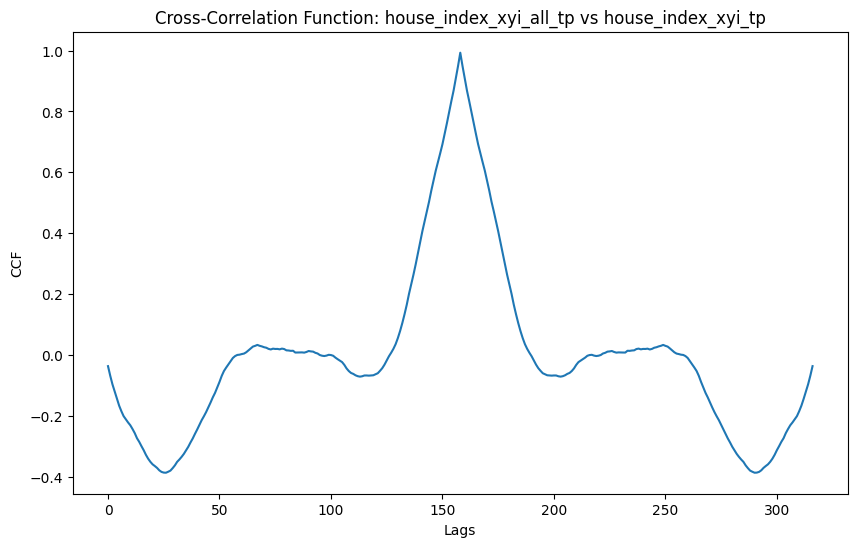

CCF for house_index_xyi_all_tp vs house_index_xyi_tp:
[-3.68044846e-02 -6.83705203e-02 -9.66940391e-02 -1.20335543e-01
 -1.44459587e-01 -1.66728038e-01 -1.84953580e-01 -2.01074067e-01
 -2.11451614e-01 -2.21858535e-01 -2.31066931e-01 -2.43458960e-01
 -2.56978388e-01 -2.73683007e-01 -2.85580180e-01 -2.99694264e-01
 -3.12993730e-01 -3.28156565e-01 -3.40891678e-01 -3.51201512e-01
 -3.59494334e-01 -3.65112909e-01 -3.71209555e-01 -3.79156346e-01
 -3.84343459e-01 -3.86647105e-01 -3.87031508e-01 -3.83817958e-01
 -3.80097707e-01 -3.72013647e-01 -3.62887573e-01 -3.51374062e-01
 -3.43684925e-01 -3.35029062e-01 -3.25354144e-01 -3.13449536e-01
 -3.01811817e-01 -2.87630403e-01 -2.74534800e-01 -2.59341017e-01
 -2.45039703e-01 -2.29731328e-01 -2.14575396e-01 -2.01668190e-01
 -1.87833425e-01 -1.72395248e-01 -1.56318424e-01 -1.39478131e-01
 -1.24704150e-01 -1.06933640e-01 -8.87383870e-02 -6.89348068e-02
 -5.28513574e-02 -4.15007194e-02 -3.11547198e-02 -2.03524138e-02
 -9.95143198e-03 -3.70990959e-03 -6.

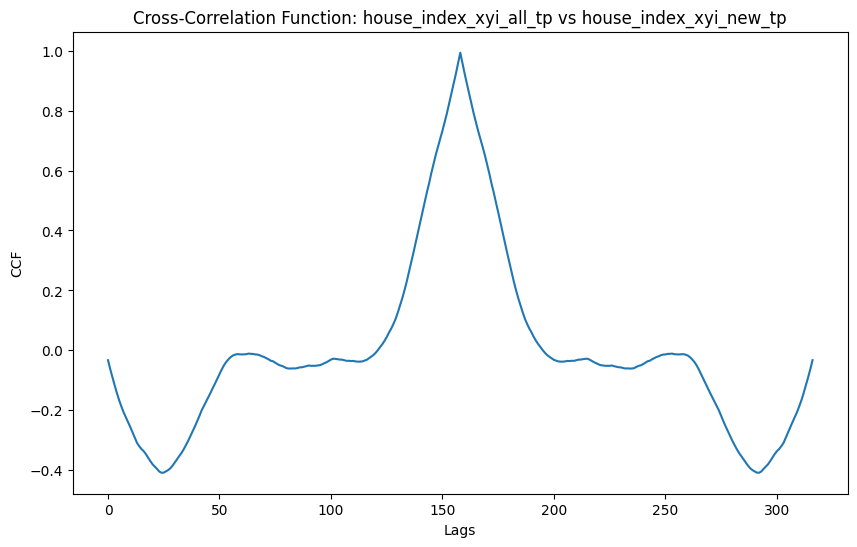

CCF for house_index_xyi_all_tp vs house_index_xyi_new_tp:
[-3.27325015e-02 -6.27531395e-02 -9.04792831e-02 -1.17071661e-01
 -1.42780069e-01 -1.66606665e-01 -1.87353562e-01 -2.06740412e-01
 -2.23600788e-01 -2.39728264e-01 -2.56042577e-01 -2.73392788e-01
 -2.91252842e-01 -3.08637104e-01 -3.19808747e-01 -3.29428748e-01
 -3.36543752e-01 -3.46308815e-01 -3.58174804e-01 -3.69800779e-01
 -3.80411601e-01 -3.88082142e-01 -3.95794529e-01 -4.04449014e-01
 -4.08399676e-01 -4.08090312e-01 -4.03954063e-01 -3.99515940e-01
 -3.93259548e-01 -3.84390819e-01 -3.73548820e-01 -3.62670355e-01
 -3.52456173e-01 -3.41990774e-01 -3.29581177e-01 -3.15849627e-01
 -3.01385104e-01 -2.85104421e-01 -2.69468175e-01 -2.53483276e-01
 -2.36572844e-01 -2.18825962e-01 -2.00349538e-01 -1.85337988e-01
 -1.70744703e-01 -1.56103457e-01 -1.41431709e-01 -1.25579409e-01
 -1.10766864e-01 -9.48600691e-02 -7.95253774e-02 -6.39370733e-02
 -4.98868853e-02 -3.89898215e-02 -2.99714491e-02 -2.26751709e-02
 -1.71737839e-02 -1.43258738e-02

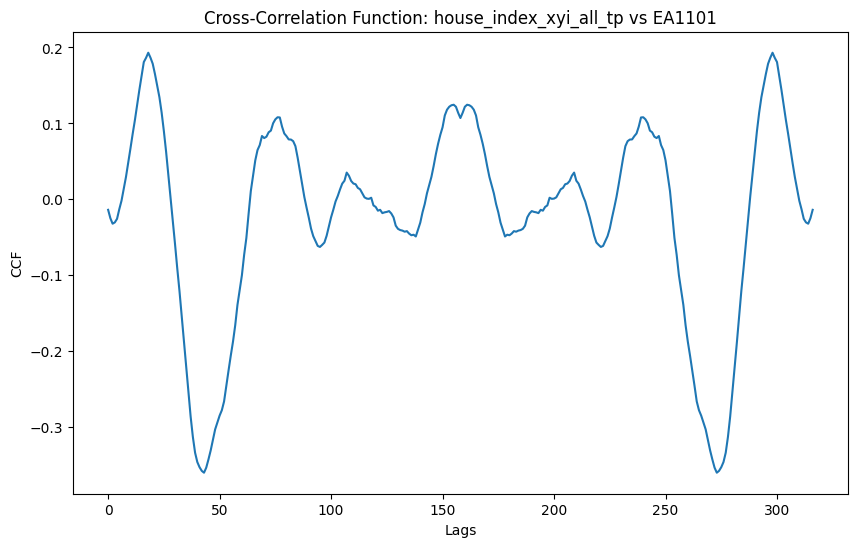

CCF for house_index_xyi_all_tp vs EA1101:
[-0.01378031 -0.02475942 -0.03205466 -0.03033015 -0.0256154  -0.01303239
 -0.00180052  0.0140212   0.02948772  0.04770029  0.06681558  0.08607749
  0.10425104  0.12417397  0.1439993   0.16227244  0.18081344  0.18636702
  0.19311572  0.18654225  0.17858888  0.16507553  0.15010889  0.13454664
  0.11430063  0.08985031  0.0627378   0.03267494  0.00396652 -0.02831623
 -0.0588357  -0.09075149 -0.12063305 -0.15390788 -0.18852161 -0.22201272
 -0.25371851 -0.28588248 -0.31273989 -0.33365279 -0.34593563 -0.35273767
 -0.35753517 -0.35999375 -0.35333157 -0.34246779 -0.33061357 -0.31689908
 -0.30288608 -0.29379401 -0.28481469 -0.27769268 -0.26612341 -0.24545876
 -0.22557008 -0.20588862 -0.18743761 -0.16580037 -0.13909798 -0.11967299
 -0.09989456 -0.0731359  -0.05083102 -0.01914094  0.01096097  0.03138763
  0.05138686  0.06491084  0.07146342  0.08344246  0.08072882  0.08252334
  0.08834018  0.09053859  0.10021824  0.10537696  0.10813192  0.10785529
  0.09582

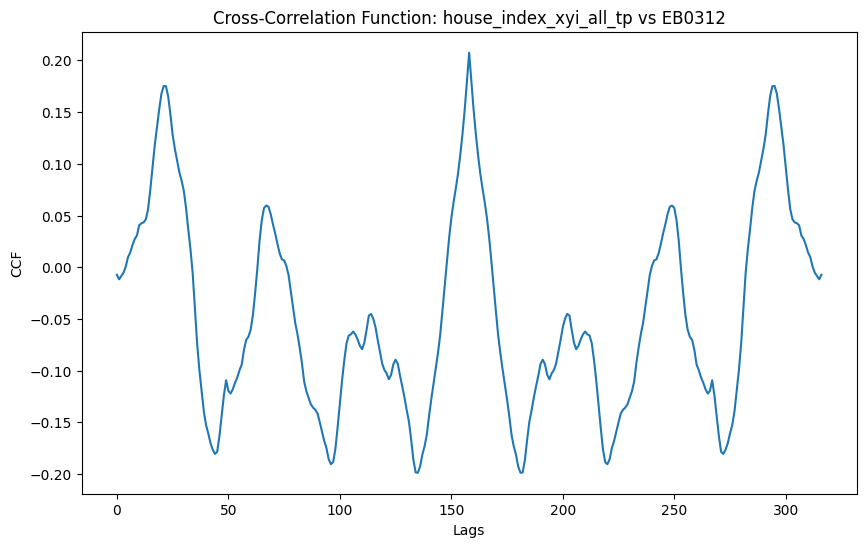

CCF for house_index_xyi_all_tp vs EB0312:
[-0.00727462 -0.01169481 -0.00854278 -0.00520864  0.00086005  0.00980419
  0.01424376  0.02159236  0.02731222  0.03068942  0.04041862  0.04252134
  0.04335511  0.04642958  0.05636735  0.0751701   0.09686289  0.11826189
  0.1356787   0.1529784   0.1678387   0.17522638  0.17503054  0.16531658
  0.14806055  0.12815964  0.1145721   0.1033855   0.09199643  0.0838919
  0.0740911   0.05768058  0.03690394  0.01757926 -0.00582791 -0.04056959
 -0.07395374 -0.099318   -0.11941628 -0.13954631 -0.15263108 -0.1607316
 -0.17017664 -0.17641556 -0.18048581 -0.17845372 -0.16321415 -0.1433318
 -0.12383269 -0.10925143 -0.11951167 -0.12215101 -0.11791455 -0.11164459
 -0.1065997  -0.09963242 -0.09398627 -0.07985528 -0.07021252 -0.06727345
 -0.06046839 -0.04630395 -0.02520194 -0.00127169  0.02585228  0.04556237
  0.05729439  0.05962788  0.05843996  0.05132995  0.04157657  0.03275101
  0.02264862  0.01354967  0.00759489  0.00661697  0.00129682 -0.00756454
 -0.02327556

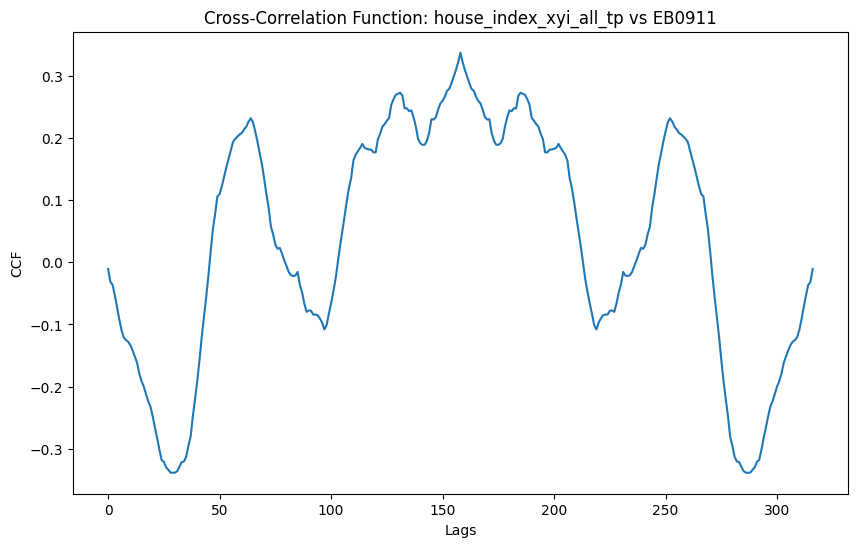

CCF for house_index_xyi_all_tp vs EB0911:
[-0.01055437 -0.03149206 -0.03639412 -0.05319955 -0.07196245 -0.09178941
 -0.10902577 -0.12093599 -0.12512    -0.12804374 -0.13357669 -0.142171
 -0.15192283 -0.16223488 -0.17943211 -0.19144048 -0.20016488 -0.21232089
 -0.22374959 -0.23249055 -0.24827695 -0.26622505 -0.28323201 -0.30201828
 -0.31835997 -0.32130719 -0.33016123 -0.3340381  -0.33873183 -0.33882286
 -0.33866193 -0.33615378 -0.32916679 -0.32164529 -0.3206857  -0.3133232
 -0.29541843 -0.28089037 -0.2476213  -0.21991492 -0.19057719 -0.15664524
 -0.11952104 -0.08776077 -0.05529741 -0.02056405  0.01813999  0.0535464
  0.0781954   0.10608971  0.10986618  0.12260527  0.13754602  0.1526648
  0.16628539  0.18014324  0.19374407  0.19888734  0.20258665  0.2060815
  0.20839658  0.21403291  0.21864161  0.2268301   0.23204313  0.22511338
  0.21018934  0.19422868  0.17509721  0.15778782  0.13447959  0.10944365
  0.08797273  0.05748723  0.04518412  0.02850933  0.02177303  0.02322409
  0.01392435  0

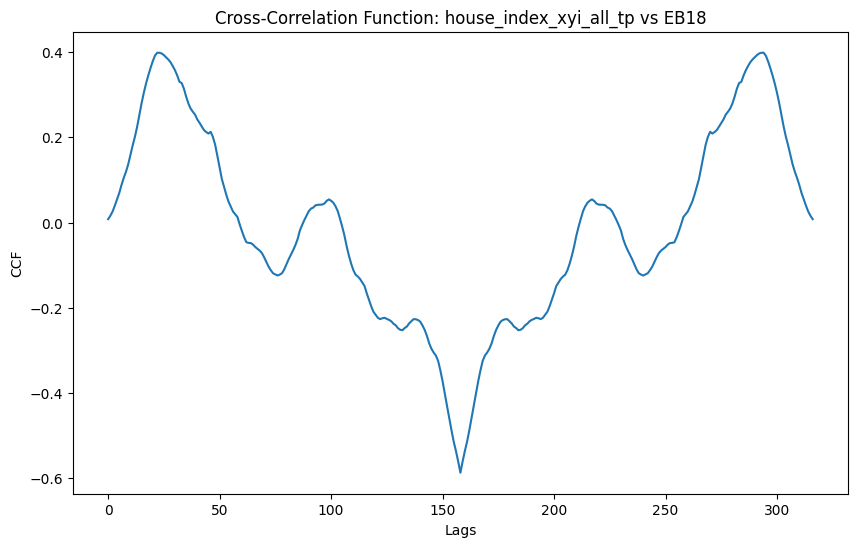

CCF for house_index_xyi_all_tp vs EB18:
[ 0.00804198  0.01607877  0.02602455  0.03971902  0.05447144  0.06949412
  0.08820801  0.10472216  0.11918206  0.13654471  0.15853009  0.18097172
  0.20093832  0.22454406  0.25208773  0.27976011  0.3044024   0.32615087
  0.34507201  0.36232405  0.37822074  0.39149787  0.39846068  0.39837704
  0.39671696  0.39282449  0.38762764  0.38248053  0.3760327   0.36708584
  0.35714333  0.34499921  0.33024011  0.32728072  0.31392822  0.29537859
  0.27929987  0.26745165  0.25993189  0.25322415  0.24192934  0.23403045
  0.22531363  0.21688403  0.21241253  0.2088785   0.21284728  0.20090171
  0.182568    0.1563171   0.12860814  0.10219336  0.08374425  0.06518477
  0.04906671  0.03778298  0.0260292   0.01933554  0.01303926 -0.00412938
 -0.01974477 -0.03432029 -0.04600391 -0.04763661 -0.04801808 -0.05164148
 -0.05731407 -0.06162104 -0.06577563 -0.07168698 -0.08160562 -0.09260883
 -0.10372524 -0.1119962  -0.11898799 -0.12171024 -0.12419222 -0.12196077
 -0.1186588

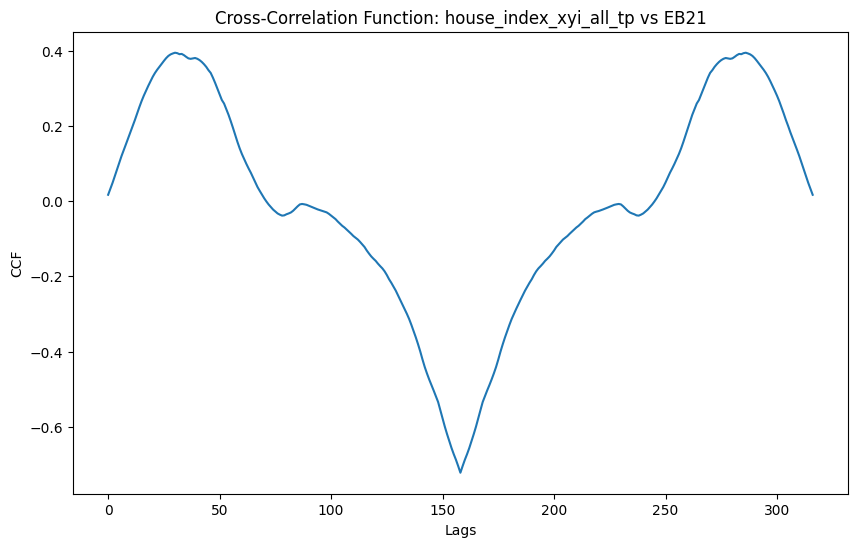

CCF for house_index_xyi_all_tp vs EB21:
[ 0.01663275  0.03229464  0.04862055  0.06648498  0.08440862  0.10187578
  0.11952421  0.13575705  0.1512163   0.16708021  0.18255132  0.19952264
  0.21537715  0.23284829  0.24964011  0.26562818  0.28010754  0.29331329
  0.30616206  0.31853143  0.33021938  0.34037672  0.34907239  0.35668325
  0.3646124   0.3724333   0.3797496   0.38571524  0.38978511  0.39228558
  0.39427616  0.3931149   0.39041563  0.39106704  0.38777536  0.38330818
  0.37928852  0.37800337  0.37918886  0.38025213  0.37820529  0.37467264
  0.36981677  0.36376195  0.35671335  0.34793685  0.34060887  0.32797683
  0.31394305  0.29896915  0.28353095  0.26861613  0.25919044  0.24417895
  0.22926043  0.21231332  0.19440537  0.1753666   0.157086    0.14008778
  0.12501249  0.11167444  0.09876641  0.08665403  0.07530687  0.06264833
  0.04930996  0.03730665  0.02702014  0.017374    0.00735249 -0.00134596
 -0.00927988 -0.01596713 -0.02271507 -0.02774262 -0.03292355 -0.03616843
 -0.0387445

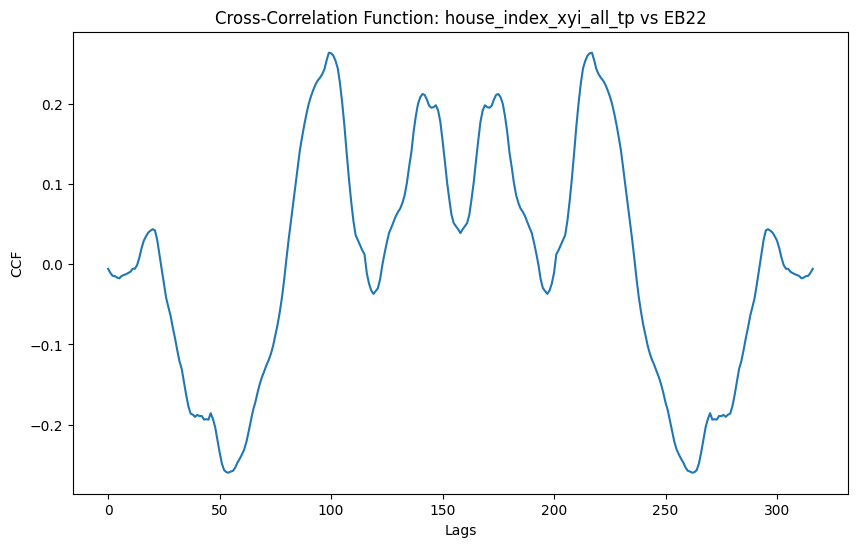

CCF for house_index_xyi_all_tp vs EB22:
[-0.00560299 -0.01064382 -0.01430028 -0.01468913 -0.01646676 -0.01746486
 -0.01462159 -0.01331535 -0.0122845  -0.01083592 -0.00920035 -0.00551685
 -0.00546175 -0.00086215  0.00835223  0.02027144  0.02957767  0.03502446
  0.03969563  0.04201394  0.04387388  0.04241776  0.0307745   0.01209881
 -0.00569923 -0.02402082 -0.04144326 -0.0531303  -0.06398834 -0.07884264
 -0.09227575 -0.10719214 -0.1209995  -0.13042175 -0.14636978 -0.16302293
 -0.17720115 -0.18637109 -0.18765439 -0.19038541 -0.18798115 -0.18947433
 -0.18928269 -0.19378618 -0.19328964 -0.19394792 -0.18579678 -0.19297542
 -0.20317463 -0.21861099 -0.23458331 -0.24852427 -0.25677986 -0.25935921
 -0.26012111 -0.2586543  -0.25779745 -0.25374561 -0.24752795 -0.24282224
 -0.23742045 -0.23134024 -0.22198387 -0.20903596 -0.19539225 -0.18213517
 -0.17245811 -0.16035622 -0.14950496 -0.1407441  -0.1336289  -0.1259593
 -0.11956476 -0.11176275 -0.10156504 -0.08829543 -0.07528897 -0.05918078
 -0.04064722

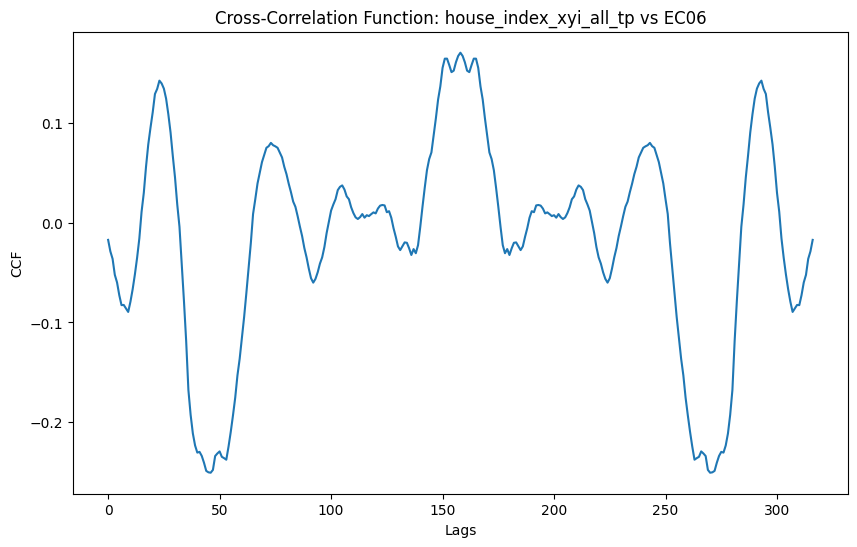

CCF for house_index_xyi_all_tp vs EC06:
[-0.01729206 -0.02879222 -0.03626204 -0.05231103 -0.05992316 -0.07265761
 -0.08262927 -0.08244827 -0.08600887 -0.08943399 -0.0792697  -0.06672631
 -0.051897   -0.03511309 -0.01578194  0.01082253  0.0298367   0.05608153
  0.07830473  0.09500897  0.11051059  0.12882186  0.13391709  0.14216092
  0.13935288  0.13419659  0.12416012  0.10854861  0.09022421  0.06690259
  0.04514437  0.01819406 -0.00414659 -0.04071516 -0.0781293  -0.11857157
 -0.16756515 -0.19245451 -0.21112649 -0.22318775 -0.23030938 -0.22957161
 -0.23366883 -0.24049053 -0.24860378 -0.25006065 -0.25044978 -0.24761024
 -0.23375302 -0.23116585 -0.22911213 -0.23452181 -0.23584532 -0.23740994
 -0.2243304  -0.20949308 -0.1929902  -0.17531    -0.15301444 -0.13629719
 -0.1152673  -0.09441775 -0.07046492 -0.04506307 -0.02057343  0.00852387
  0.02343666  0.03916121  0.05005979  0.0605936   0.0679033   0.0749289
  0.07654699  0.07984824  0.07750125  0.07638349  0.07491535  0.06998025
  0.06528221

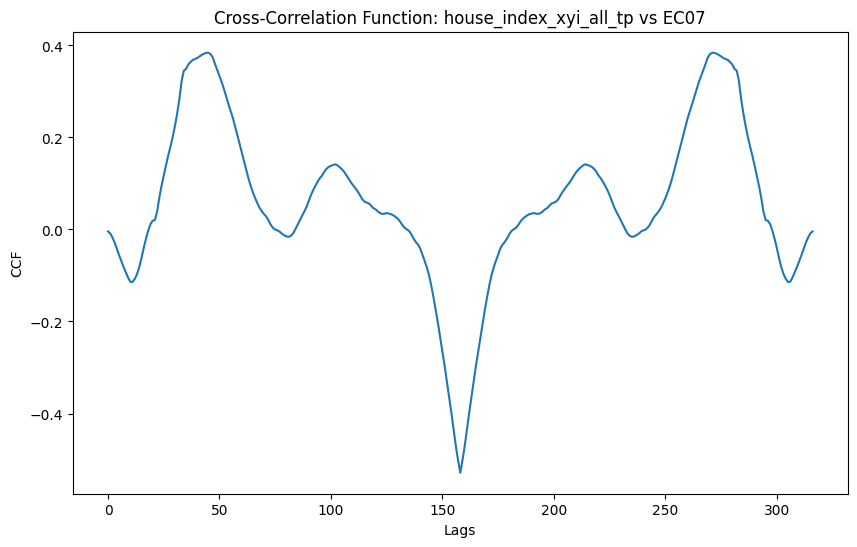

CCF for house_index_xyi_all_tp vs EC07:
[-4.19726918e-03 -8.64231794e-03 -1.74600609e-02 -2.87928660e-02
 -4.27674155e-02 -5.61747005e-02 -6.90916053e-02 -8.16596870e-02
 -9.33564914e-02 -1.04593911e-01 -1.13675513e-01 -1.14050407e-01
 -1.07474806e-01 -9.72560674e-02 -8.21295627e-02 -6.29870554e-02
 -4.05841449e-02 -2.06755153e-02 -3.02510273e-03  1.11111620e-02
  1.89018476e-02  2.01971494e-02  3.78756157e-02  6.87055407e-02
  9.43680210e-02  1.16935226e-01  1.39301322e-01  1.60575069e-01
  1.79843105e-01  2.00775143e-01  2.24351651e-01  2.51280333e-01
  2.82572035e-01  3.21820974e-01  3.45082306e-01  3.48994325e-01
  3.58604508e-01  3.63677565e-01  3.68399276e-01  3.70286591e-01
  3.72432302e-01  3.75997719e-01  3.79189523e-01  3.82007429e-01
  3.83822322e-01  3.84138743e-01  3.81279156e-01  3.73755465e-01
  3.59525704e-01  3.46143537e-01  3.33408303e-01  3.20368799e-01
  3.05088073e-01  2.88744769e-01  2.72661331e-01  2.57417522e-01
  2.42188771e-01  2.23969624e-01  2.05180424e-01  

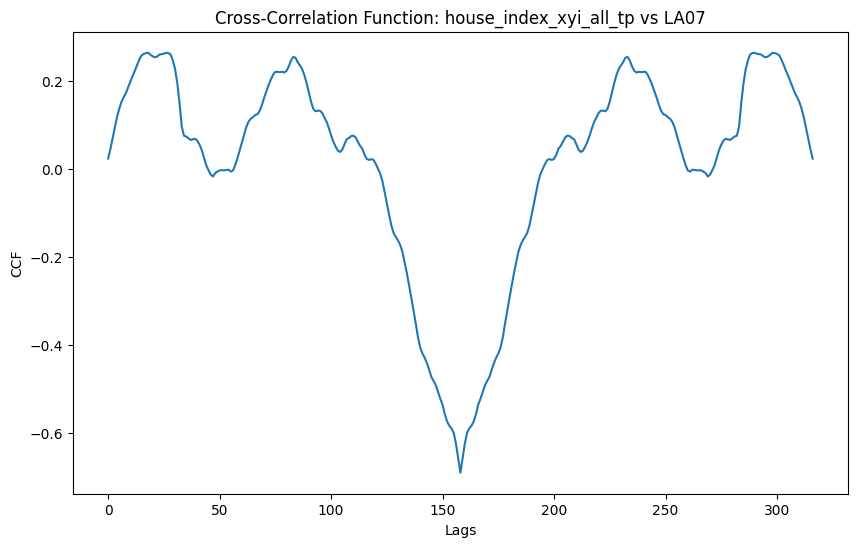

CCF for house_index_xyi_all_tp vs LA07:
[ 0.02333094  0.04465557  0.06967895  0.09383194  0.1178781   0.13697093
  0.1524773   0.16296877  0.17268876  0.18553106  0.19885225  0.21169806
  0.22306854  0.23638703  0.24832814  0.25788991  0.26129245  0.26310078
  0.26396196  0.2593088   0.25561268  0.25375166  0.25533136  0.25971638
  0.2606981   0.26162977  0.26381116  0.26318935  0.26010008  0.24697319
  0.22748691  0.1955401   0.15123734  0.09684906  0.07531719  0.07357771
  0.06959876  0.06572116  0.06721202  0.06842763  0.06425971  0.05512787
  0.04269549  0.02506786  0.00819474 -0.00281393 -0.01282758 -0.01741218
 -0.00971876 -0.00628405 -0.00334719 -0.00301955 -0.00337526 -0.00265426
 -0.00172987 -0.00614454 -0.00362644  0.00853801  0.02457654  0.04192021
  0.06019684  0.07762011  0.09546304  0.10744     0.11408858  0.11770461
  0.12248563  0.12428319  0.13222836  0.14583304  0.16205638  0.17683835
  0.19089627  0.20300308  0.21399514  0.22060547  0.22042797  0.21977035
  0.2206674

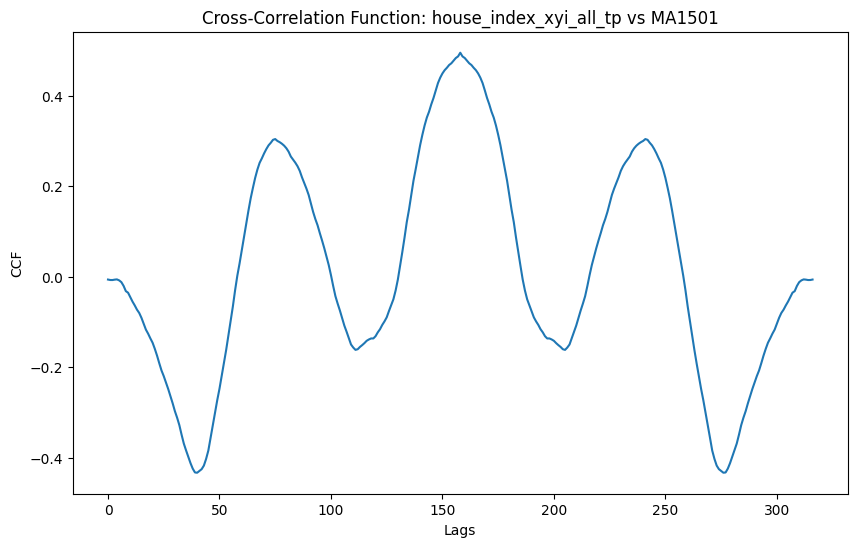

CCF for house_index_xyi_all_tp vs MA1501:
[-0.00600213 -0.00700783 -0.00708396 -0.00618566 -0.00567943 -0.00780406
 -0.01179541 -0.02008165 -0.03158989 -0.03509349 -0.04468636 -0.05478198
 -0.06322948 -0.07257457 -0.07984706 -0.09055591 -0.10374169 -0.1166496
 -0.12565427 -0.13602403 -0.14563022 -0.15915448 -0.17420992 -0.19104201
 -0.20699694 -0.21940202 -0.23330912 -0.24784777 -0.26369965 -0.27945918
 -0.29682948 -0.3113126  -0.32775371 -0.34880874 -0.36841302 -0.38336728
 -0.3974468  -0.41163433 -0.42377654 -0.43227896 -0.43284078 -0.42906589
 -0.42498492 -0.41706804 -0.40233695 -0.38387105 -0.35566317 -0.3268513
 -0.29976955 -0.27241366 -0.24726479 -0.21876382 -0.19109419 -0.16143427
 -0.1299757  -0.0976869  -0.06550876 -0.02972114  0.0024881   0.02936909
  0.05895427  0.08915774  0.11753735  0.14657251  0.17366969  0.19672722
  0.21858741  0.23692379  0.25187853  0.26174385  0.27264895  0.28223419
  0.29047108  0.29614535  0.30274944  0.30441948  0.30023929  0.29754572
  0.2941198

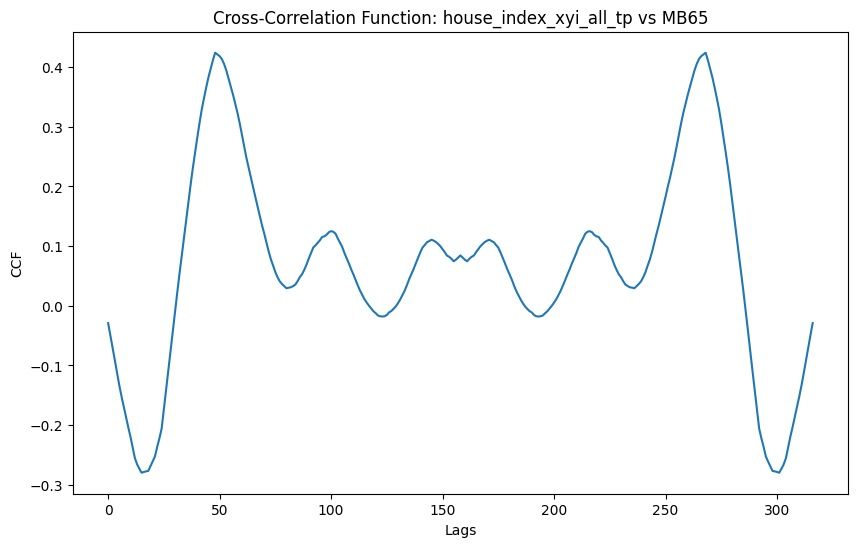

CCF for house_index_xyi_all_tp vs MB65:
[-2.89836399e-02 -4.93866331e-02 -7.01715659e-02 -9.13463702e-02
 -1.12819387e-01 -1.33149981e-01 -1.51740532e-01 -1.69122409e-01
 -1.85933508e-01 -2.03047536e-01 -2.19230588e-01 -2.36961642e-01
 -2.55305035e-01 -2.65714377e-01 -2.73069368e-01 -2.79771984e-01
 -2.78531190e-01 -2.77501894e-01 -2.76759816e-01 -2.68780858e-01
 -2.61014750e-01 -2.52485884e-01 -2.36531801e-01 -2.22146112e-01
 -2.05782486e-01 -1.73124302e-01 -1.40909608e-01 -1.08954329e-01
 -7.66461556e-02 -4.29179099e-02 -9.93627670e-03  2.20477265e-02
  5.34632033e-02  8.29729980e-02  1.13096895e-01  1.43136271e-01
  1.73086849e-01  2.03182187e-01  2.31065803e-01  2.57152411e-01
  2.82272990e-01  3.06415367e-01  3.29181857e-01  3.48156288e-01
  3.66135977e-01  3.83045318e-01  3.97502280e-01  4.11552958e-01
  4.24126836e-01  4.21278519e-01  4.18376400e-01  4.13526244e-01
  4.05303978e-01  3.94525584e-01  3.80990616e-01  3.67785593e-01
  3.53844000e-01  3.38879143e-01  3.23614238e-01  

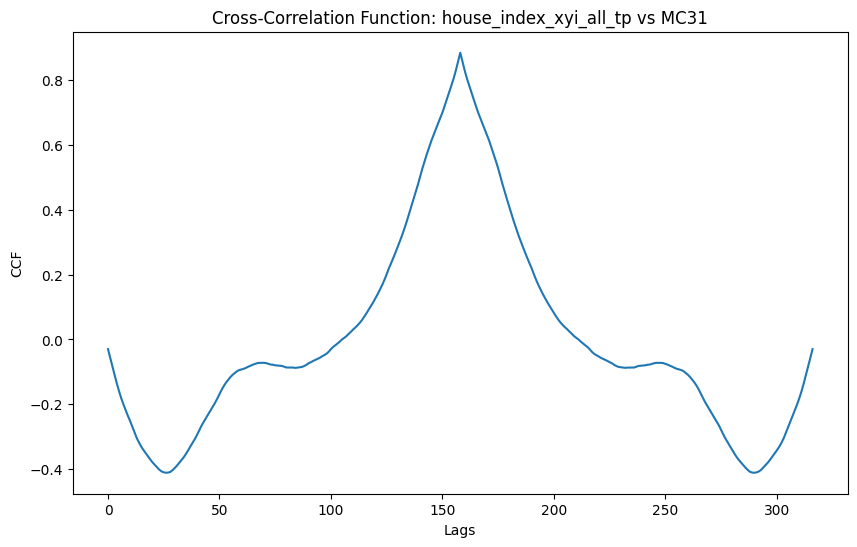

CCF for house_index_xyi_all_tp vs MC31:
[-2.98986909e-02 -5.70699746e-02 -8.40158013e-02 -1.10672025e-01
 -1.36802143e-01 -1.61057446e-01 -1.82622428e-01 -2.01835627e-01
 -2.19582660e-01 -2.37077036e-01 -2.53234552e-01 -2.70475576e-01
 -2.88510481e-01 -3.05915955e-01 -3.19490487e-01 -3.31780483e-01
 -3.42092895e-01 -3.51677510e-01 -3.61178896e-01 -3.70716263e-01
 -3.79628807e-01 -3.86947548e-01 -3.94323862e-01 -4.01896613e-01
 -4.07097322e-01 -4.10001249e-01 -4.11247952e-01 -4.10812859e-01
 -4.08549783e-01 -4.03102581e-01 -3.96183869e-01 -3.88766794e-01
 -3.80407376e-01 -3.72469085e-01 -3.63233776e-01 -3.52748898e-01
 -3.41607655e-01 -3.29388260e-01 -3.18366955e-01 -3.06702702e-01
 -2.93513031e-01 -2.79493013e-01 -2.65324106e-01 -2.53255400e-01
 -2.41808090e-01 -2.30100113e-01 -2.18963003e-01 -2.07303727e-01
 -1.95711759e-01 -1.82781518e-01 -1.68815180e-01 -1.54966262e-01
 -1.43037585e-01 -1.32517837e-01 -1.23771193e-01 -1.15397174e-01
 -1.08487744e-01 -1.02700845e-01 -9.72975815e-02 -

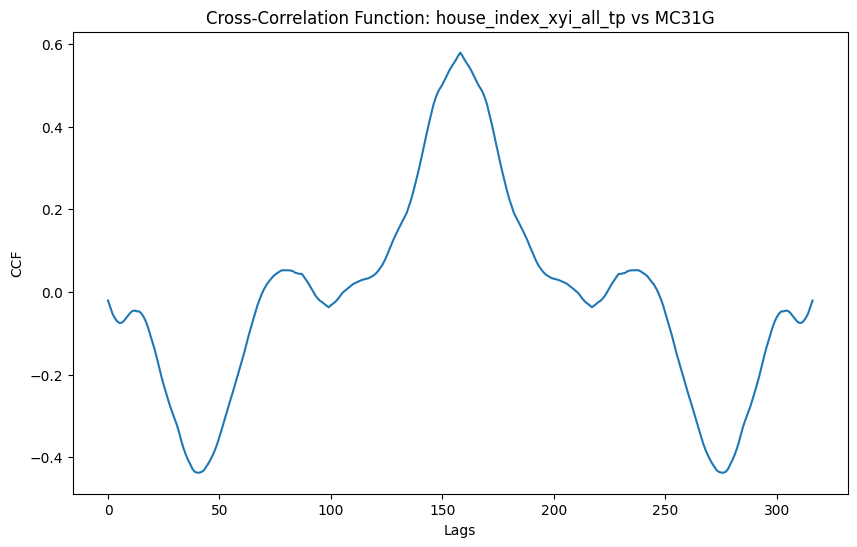

CCF for house_index_xyi_all_tp vs MC31G:
[-0.02078851 -0.03655091 -0.0524941  -0.06269933 -0.07046354 -0.07501349
 -0.07486436 -0.07094975 -0.06420877 -0.05766209 -0.05047532 -0.04620626
 -0.04504936 -0.04706262 -0.04707029 -0.05240781 -0.06056218 -0.07184233
 -0.08692969 -0.10459583 -0.12272388 -0.14058259 -0.1618519  -0.1843902
 -0.20592753 -0.22547922 -0.2439084  -0.26189631 -0.27917551 -0.29386705
 -0.30805296 -0.32371857 -0.34237914 -0.36297626 -0.38057699 -0.39530512
 -0.40795911 -0.41837292 -0.42973758 -0.43558107 -0.4377424  -0.43741508
 -0.43562343 -0.43190388 -0.42395507 -0.41553546 -0.40585566 -0.39484998
 -0.3825312  -0.36771811 -0.35025166 -0.33287999 -0.31438438 -0.29585759
 -0.27759742 -0.25958323 -0.24236523 -0.22361965 -0.20464854 -0.18664295
 -0.16800121 -0.14907003 -0.12777025 -0.1070582  -0.08799189 -0.06956236
 -0.05125611 -0.03296888 -0.01796639 -0.00436537  0.0068864   0.01649698
  0.02394724  0.03045834  0.03733061  0.04212865  0.04570232  0.04946959
  0.0524134

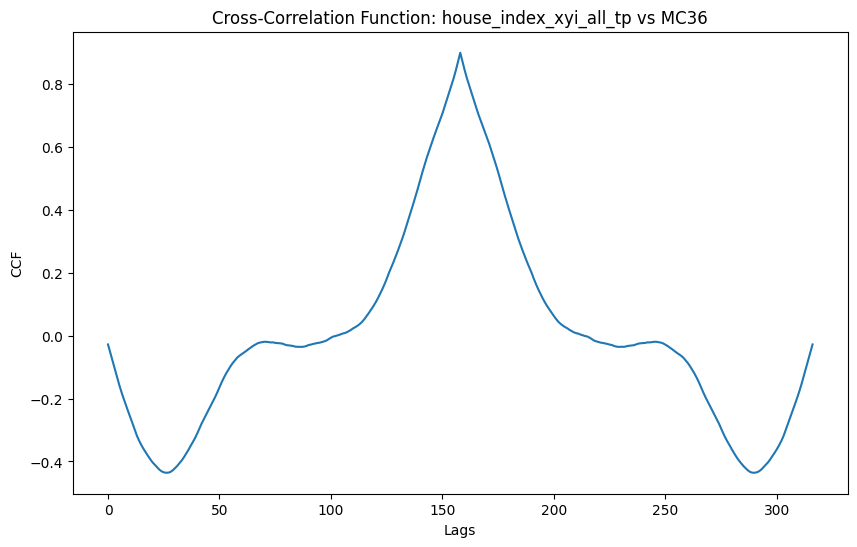

CCF for house_index_xyi_all_tp vs MC36:
[-0.02769566 -0.05341875 -0.07877131 -0.10420079 -0.13021915 -0.15522987
 -0.17832032 -0.19965681 -0.21985827 -0.24003234 -0.25895891 -0.27884811
 -0.29915981 -0.31879853 -0.33456725 -0.3484754  -0.36075886 -0.37215787
 -0.38290378 -0.39335881 -0.40298519 -0.41070633 -0.41812255 -0.42569573
 -0.43122781 -0.43444463 -0.43577865 -0.43559238 -0.43336987 -0.42824137
 -0.42158486 -0.41440509 -0.40590347 -0.39724495 -0.38712402 -0.37590557
 -0.3640633  -0.35102945 -0.33887681 -0.32591363 -0.31121283 -0.29535884
 -0.27912722 -0.2648626  -0.25127146 -0.23740273 -0.22378708 -0.2097156
 -0.19575378 -0.18045979 -0.16406475 -0.1477459  -0.1331102  -0.11976617
 -0.10785705 -0.09645131 -0.08631627 -0.07769777 -0.06935836 -0.06343463
 -0.05850801 -0.05371878 -0.04835247 -0.0427619  -0.03791204 -0.0326176
 -0.0285764  -0.02442996 -0.02196326 -0.02071327 -0.01932246 -0.01928936
 -0.02014161 -0.02129577 -0.02110886 -0.0227598  -0.02330596 -0.02400156
 -0.02480997 

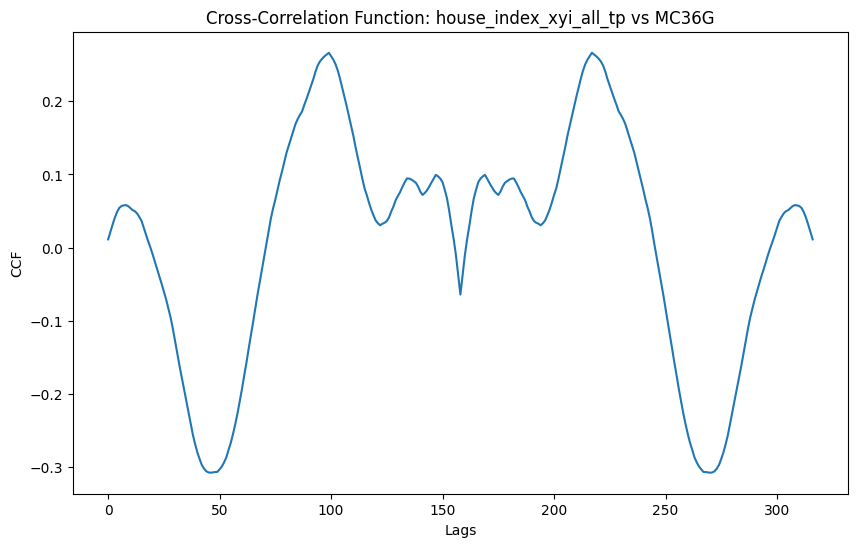

CCF for house_index_xyi_all_tp vs MC36G:
[ 1.12974523e-02  2.15300389e-02  3.14660283e-02  4.08371517e-02
  4.86883830e-02  5.42024054e-02  5.67888748e-02  5.77273960e-02
  5.80830142e-02  5.66711366e-02  5.39589913e-02  5.12101332e-02
  4.97350604e-02  4.66452349e-02  4.18341828e-02  3.64416022e-02
  2.69654715e-02  1.72971893e-02  8.22678406e-03 -2.08679829e-04
 -9.51537305e-03 -1.94618676e-02 -2.97312502e-02 -3.90245875e-02
 -4.94161567e-02 -6.00751001e-02 -7.05461174e-02 -8.26875909e-02
 -9.51553432e-02 -1.10219161e-01 -1.26720986e-01 -1.43958148e-01
 -1.61097493e-01 -1.76636773e-01 -1.92082418e-01 -2.08017355e-01
 -2.23754261e-01 -2.39566970e-01 -2.55328919e-01 -2.68099061e-01
 -2.79355484e-01 -2.88354274e-01 -2.96646953e-01 -3.01654040e-01
 -3.05300475e-01 -3.06883879e-01 -3.07305193e-01 -3.06855900e-01
 -3.06404941e-01 -3.06162123e-01 -3.02715631e-01 -2.98760224e-01
 -2.93217077e-01 -2.86422305e-01 -2.76170616e-01 -2.66610226e-01
 -2.54599189e-01 -2.41257063e-01 -2.26754284e-01 

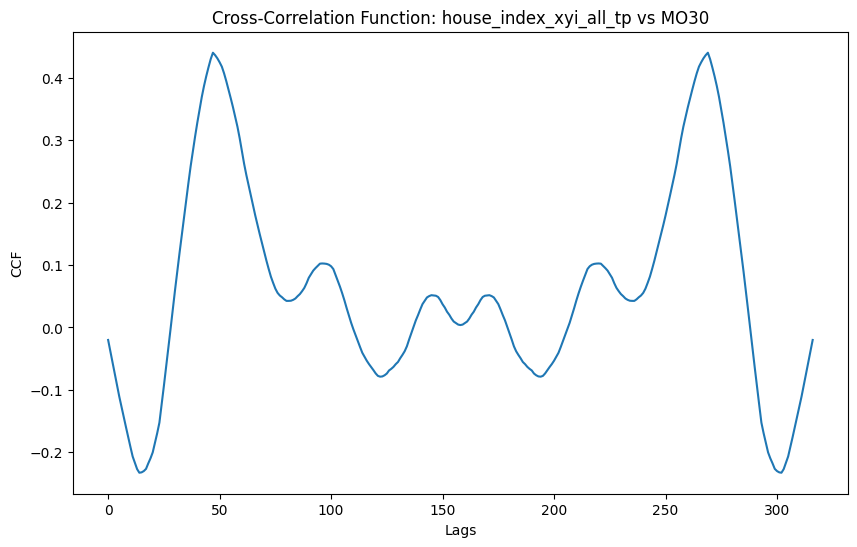

CCF for house_index_xyi_all_tp vs MO30:
[-0.01999014 -0.03812043 -0.05600651 -0.07452826 -0.09280627 -0.11073719
 -0.12723927 -0.14353853 -0.15957245 -0.17566288 -0.19131946 -0.20665712
 -0.21698134 -0.22691496 -0.23269054 -0.23210677 -0.23004245 -0.22651218
 -0.21772166 -0.20965146 -0.20010406 -0.18468295 -0.16945614 -0.1524222
 -0.12339238 -0.09382569 -0.06369358 -0.0330105  -0.00236411  0.02879068
  0.05979221  0.08942632  0.11866345  0.14686857  0.17522563  0.20346625
  0.23132954  0.2582029   0.28260623  0.30590472  0.32816168  0.34910561
  0.36923147  0.38688274  0.4024919   0.41667786  0.42989741  0.44022659
  0.43624747  0.43118812  0.42494678  0.41789803  0.40718912  0.39458991
  0.38103236  0.3671879   0.35283112  0.33740507  0.32171394  0.30329683
  0.28303396  0.26209429  0.24418371  0.22790001  0.21127398  0.1952037
  0.17929184  0.16416633  0.14946186  0.13511511  0.12130367  0.10703928
  0.09389832  0.08148956  0.07152628  0.0622393   0.05546553  0.05123854
  0.04842437 

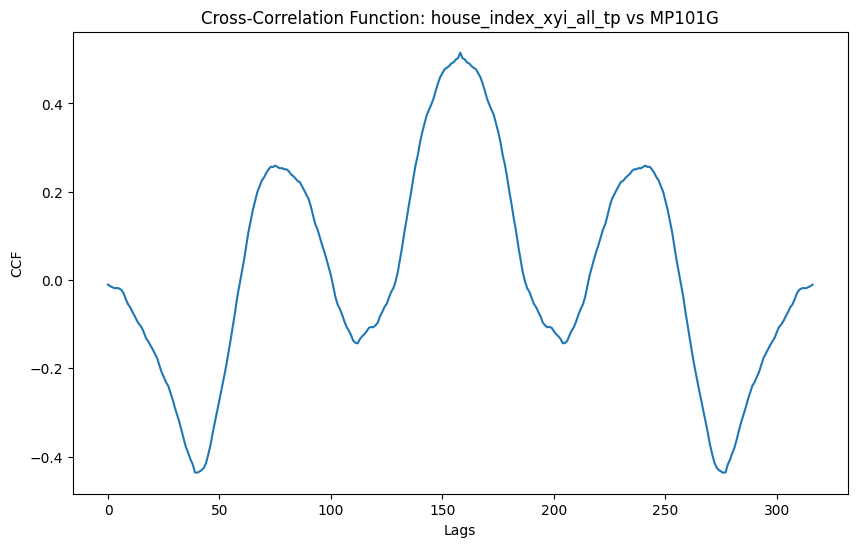

CCF for house_index_xyi_all_tp vs MP101G:
[-0.01049321 -0.01409875 -0.01644994 -0.0187873  -0.01809316 -0.01915766
 -0.02249007 -0.03007648 -0.04345739 -0.0551706  -0.06190515 -0.07272525
 -0.08189341 -0.09232489 -0.10045191 -0.10626606 -0.11760471 -0.13095697
 -0.13892329 -0.14765882 -0.15667513 -0.16690748 -0.17671546 -0.19260152
 -0.20828311 -0.21949144 -0.23153999 -0.23968438 -0.25521639 -0.27079978
 -0.28933151 -0.3053059  -0.32175591 -0.34075478 -0.36108213 -0.37942552
 -0.39224918 -0.40654154 -0.41777906 -0.43585596 -0.43659238 -0.4340023
 -0.43071597 -0.42537104 -0.41422077 -0.39466386 -0.3732985  -0.34528824
 -0.32017514 -0.2949274  -0.27098829 -0.24625634 -0.22069782 -0.19447794
 -0.16577678 -0.13572095 -0.10376489 -0.07259829 -0.03760347 -0.00960925
  0.01742044  0.04510799  0.07734878  0.10922241  0.13430023  0.15953869
  0.17961776  0.1996006   0.21255011  0.22531931  0.23276061  0.24271544
  0.25056032  0.25654646  0.25616357  0.25924777  0.25624094  0.25321928
  0.253546

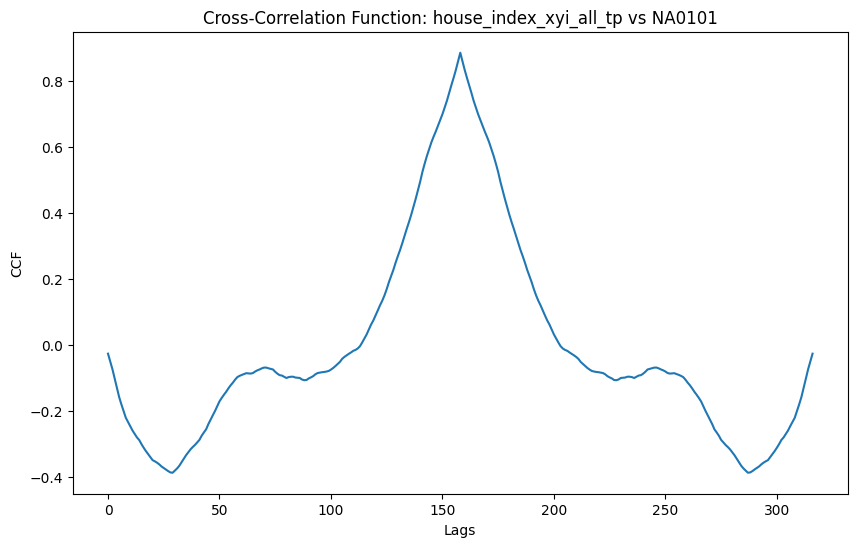

CCF for house_index_xyi_all_tp vs NA0101:
[-0.02544553 -0.04920941 -0.07292187 -0.10123491 -0.12960354 -0.15703827
 -0.17910956 -0.20001928 -0.219944   -0.23281272 -0.24503565 -0.25844052
 -0.26904719 -0.27944997 -0.28722371 -0.2995509  -0.31056314 -0.32079242
 -0.32975024 -0.3392195  -0.34817065 -0.35173736 -0.35589588 -0.36108023
 -0.36735493 -0.37203773 -0.37642311 -0.38149432 -0.38550413 -0.38631568
 -0.37991154 -0.37324145 -0.36510927 -0.35462081 -0.34385559 -0.33331928
 -0.3245388  -0.31560003 -0.30845443 -0.30205351 -0.29464526 -0.28681185
 -0.2743497  -0.26423945 -0.25490872 -0.23910209 -0.22547981 -0.21230847
 -0.19909986 -0.18490739 -0.17000641 -0.15956298 -0.1499084  -0.14099942
 -0.13066064 -0.1212962  -0.1133983  -0.10424665 -0.09657929 -0.09271796
 -0.0897972  -0.0872036  -0.08465109 -0.08540192 -0.08583252 -0.08414526
 -0.07950812 -0.07591573 -0.07322861 -0.06994453 -0.06753984 -0.06770302
 -0.06982069 -0.07157774 -0.07341795 -0.08040434 -0.08621656 -0.09065004
 -0.09178

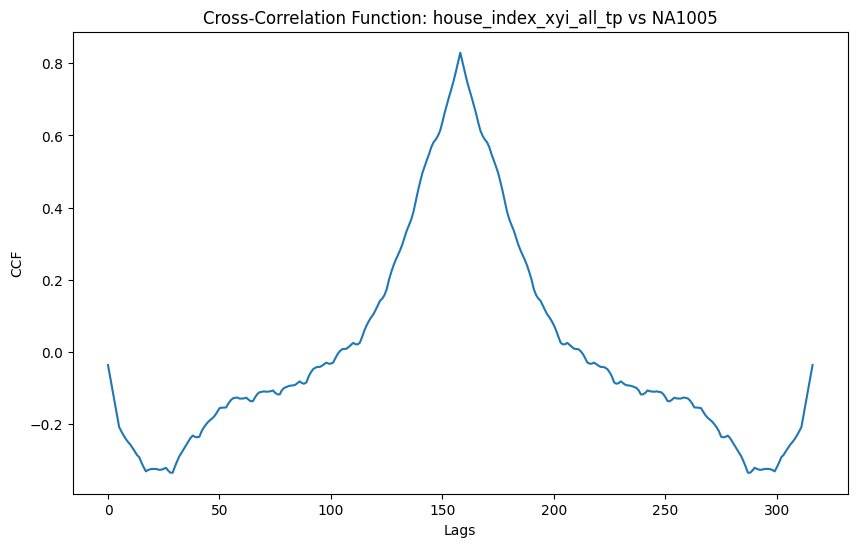

CCF for house_index_xyi_all_tp vs NA1005:
[-0.03665418 -0.07088592 -0.10504362 -0.13967735 -0.17479767 -0.20858513
 -0.2205727  -0.23173024 -0.24172082 -0.25005704 -0.25708388 -0.26650784
 -0.27590574 -0.28592145 -0.29201969 -0.30695367 -0.3199036  -0.33146765
 -0.3275256  -0.32538406 -0.32456115 -0.32471143 -0.32530654 -0.32720862
 -0.32665463 -0.3243306  -0.32153515 -0.32941559 -0.33515348 -0.33503902
 -0.31833712 -0.3032117  -0.28931172 -0.27960995 -0.26927214 -0.25923227
 -0.24922865 -0.23888127 -0.23218421 -0.23558869 -0.2370111  -0.23538498
 -0.2200427  -0.20950433 -0.20096328 -0.19365769 -0.18811547 -0.1829765
 -0.17605435 -0.16637477 -0.15606433 -0.1548782  -0.15449997 -0.15407537
 -0.14314112 -0.13464132 -0.1288591  -0.12744018 -0.12665823 -0.12945629
 -0.12952412 -0.12906893 -0.12715629 -0.13249997 -0.13677102 -0.13675075
 -0.12564066 -0.11688348 -0.11183943 -0.11085537 -0.10953333 -0.11071452
 -0.11008275 -0.10926391 -0.10689571 -0.11360725 -0.11776472 -0.11803772
 -0.106484

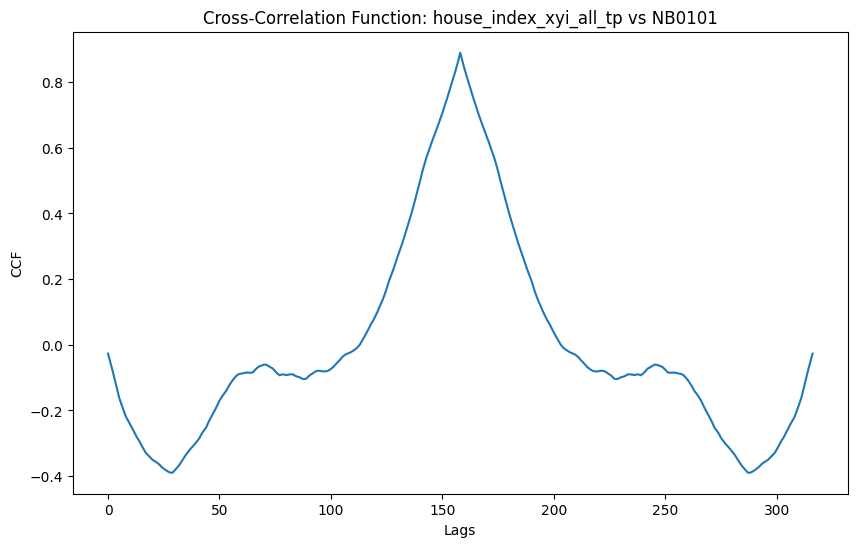

CCF for house_index_xyi_all_tp vs NB0101:
[-0.02705044 -0.05231315 -0.07752121 -0.10543166 -0.13354584 -0.16067162
 -0.18101898 -0.20017174 -0.21835907 -0.23088344 -0.24272057 -0.25592087
 -0.26925737 -0.28232896 -0.29247113 -0.3059638  -0.31816044 -0.32958845
 -0.33625605 -0.3435722  -0.35054056 -0.35450962 -0.35889538 -0.364518
 -0.37169438 -0.3772755  -0.38206324 -0.3863658  -0.38957209 -0.38933247
 -0.38179661 -0.37417255 -0.36581718 -0.35535663 -0.34476242 -0.3343392
 -0.32585706 -0.31685617 -0.30948058 -0.30189519 -0.29335129 -0.28406671
 -0.27121208 -0.2610979  -0.25202249 -0.2365868  -0.2231739  -0.21036016
 -0.19819281 -0.18456449 -0.16999726 -0.15902726 -0.14920484 -0.14044229
 -0.12790068 -0.11679218 -0.10704281 -0.09885902 -0.09178444 -0.08872167
 -0.08746245 -0.08623072 -0.08441652 -0.08480577 -0.08528918 -0.0837736
 -0.07608329 -0.06972729 -0.06521913 -0.0627303  -0.06058879 -0.06069017
 -0.06507186 -0.06910242 -0.0725891  -0.08071306 -0.08773313 -0.09291705
 -0.09024843 

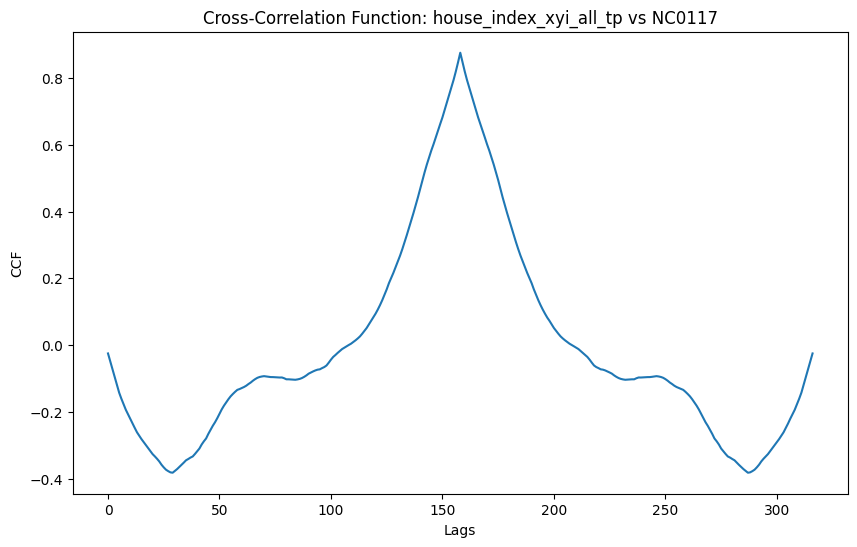

CCF for house_index_xyi_all_tp vs NC0117:
[-2.50464611e-02 -4.84376330e-02 -7.17782065e-02 -9.54191553e-02
 -1.19394253e-01 -1.42458631e-01 -1.60693452e-01 -1.77695443e-01
 -1.93880604e-01 -2.07602135e-01 -2.20660872e-01 -2.34995319e-01
 -2.48164074e-01 -2.61187247e-01 -2.71255366e-01 -2.81498769e-01
 -2.90544058e-01 -2.99186660e-01 -3.08131829e-01 -3.17423784e-01
 -3.26493449e-01 -3.33278267e-01 -3.40552755e-01 -3.48532733e-01
 -3.58290587e-01 -3.66222285e-01 -3.73173945e-01 -3.77542709e-01
 -3.81176272e-01 -3.82253972e-01 -3.76858285e-01 -3.71360448e-01
 -3.64929094e-01 -3.58723621e-01 -3.51882297e-01 -3.45015381e-01
 -3.41199031e-01 -3.36908290e-01 -3.33538311e-01 -3.26099026e-01
 -3.18147531e-01 -3.09798142e-01 -2.97857931e-01 -2.88152954e-01
 -2.79646451e-01 -2.65924393e-01 -2.53714522e-01 -2.41703768e-01
 -2.31127683e-01 -2.19077939e-01 -2.05575251e-01 -1.92703713e-01
 -1.81502365e-01 -1.71571263e-01 -1.62072920e-01 -1.53466153e-01
 -1.46413126e-01 -1.39953209e-01 -1.34134503e-01

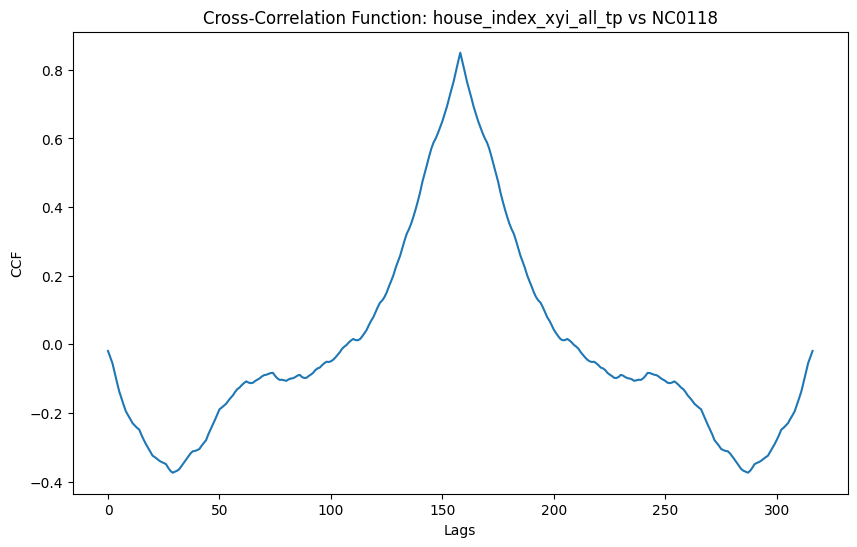

CCF for house_index_xyi_all_tp vs NC0118:
[-0.01926808 -0.03726276 -0.05521852 -0.08276143 -0.10994307 -0.13640519
 -0.15663546 -0.17621587 -0.19483301 -0.20669914 -0.21775938 -0.22959758
 -0.23640302 -0.24318159 -0.2483664  -0.26385279 -0.2778841  -0.29058061
 -0.30169757 -0.31324779 -0.32440289 -0.32881788 -0.33369698 -0.33904784
 -0.34289759 -0.34561478 -0.34908603 -0.35956062 -0.3685498  -0.3740692
 -0.37124478 -0.36820857 -0.36336154 -0.35421027 -0.34477974 -0.33544905
 -0.32660169 -0.31791487 -0.31159746 -0.31055434 -0.30814672 -0.30487993
 -0.29526779 -0.28717646 -0.27902935 -0.26224152 -0.24800628 -0.23434695
 -0.21959215 -0.20440143 -0.18931618 -0.18420324 -0.17863015 -0.17303525
 -0.16400219 -0.15595138 -0.14874156 -0.13871053 -0.13047318 -0.1258247
 -0.11876603 -0.11269092 -0.10791157 -0.11129325 -0.11308811 -0.11191064
 -0.10674001 -0.10278167 -0.09914041 -0.09364132 -0.08975825 -0.08857587
 -0.08603763 -0.08362232 -0.08322206 -0.09232297 -0.09928741 -0.10360485
 -0.1030725

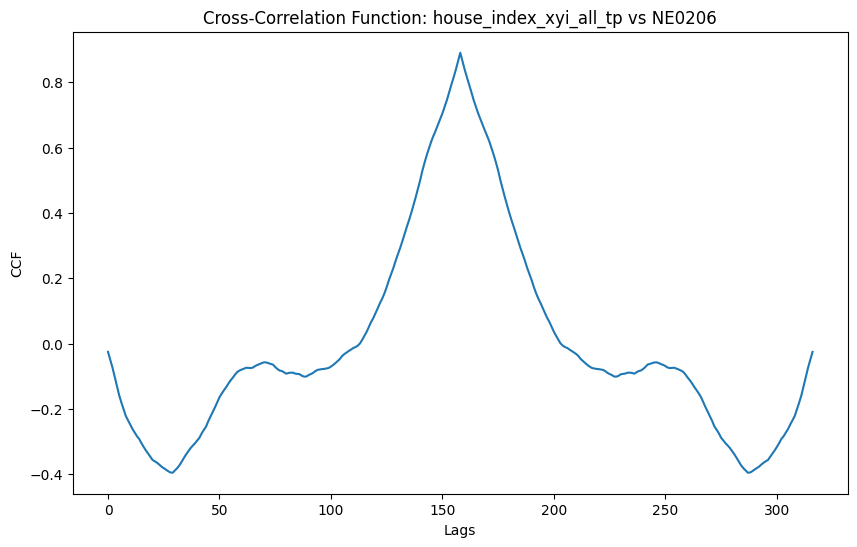

CCF for house_index_xyi_all_tp vs NE0206:
[-2.56631162e-02 -4.96301892e-02 -7.35454181e-02 -1.02116900e-01
 -1.30743372e-01 -1.58427917e-01 -1.80822208e-01 -2.02037366e-01
 -2.22258264e-01 -2.35529651e-01 -2.48139361e-01 -2.61935936e-01
 -2.73132424e-01 -2.84103091e-01 -2.92412570e-01 -3.05276858e-01
 -3.16806387e-01 -3.27535984e-01 -3.37141712e-01 -3.47230308e-01
 -3.56782061e-01 -3.60743692e-01 -3.65300730e-01 -3.70874739e-01
 -3.77127714e-01 -3.81778689e-01 -3.86095845e-01 -3.91105566e-01
 -3.95031529e-01 -3.95757732e-01 -3.89004701e-01 -3.82018729e-01
 -3.73532973e-01 -3.62449641e-01 -3.51087087e-01 -3.39946069e-01
 -3.30402377e-01 -3.20710718e-01 -3.12857668e-01 -3.05636767e-01
 -2.97430634e-01 -2.88778917e-01 -2.75443352e-01 -2.64468161e-01
 -2.54294372e-01 -2.37637050e-01 -2.23191915e-01 -2.09204426e-01
 -1.95175173e-01 -1.80197142e-01 -1.64563902e-01 -1.53410276e-01
 -1.43080148e-01 -1.33551834e-01 -1.22677818e-01 -1.12823213e-01
 -1.04489893e-01 -9.49568815e-02 -8.69562389e-02

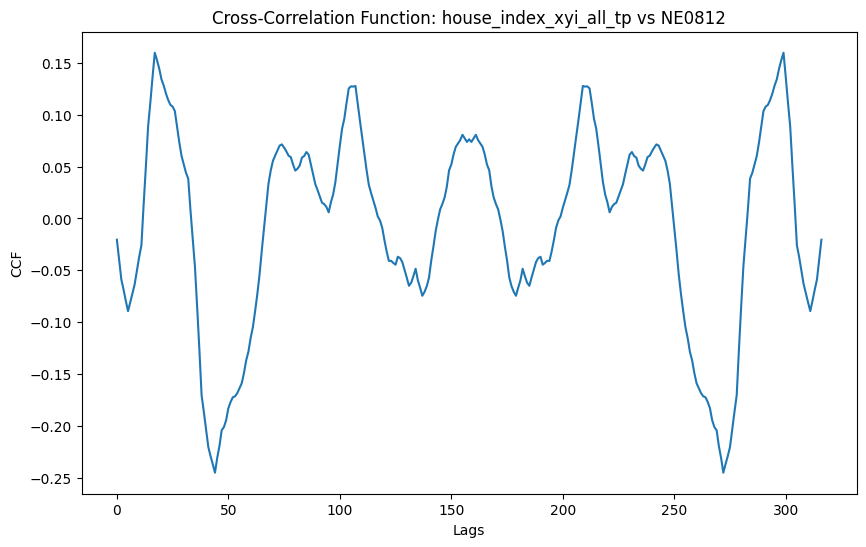

CCF for house_index_xyi_all_tp vs NE0812:
[-0.02055586 -0.03975322 -0.05890904 -0.06873432 -0.07946678 -0.08947114
 -0.08094621 -0.07223674 -0.06323433 -0.05020614 -0.03715562 -0.0259973
  0.01330424  0.04976938  0.08848021  0.11158096  0.13633416  0.15980831
  0.15265072  0.14441284  0.13420822  0.12817032  0.12047676  0.11429916
  0.10951812  0.10786327  0.10343     0.08820067  0.07324934  0.06024005
  0.05214872  0.04391696  0.03842487  0.00807008 -0.01887467 -0.04624248
 -0.08526841 -0.1264676  -0.17061583 -0.18659918 -0.20347435 -0.22044603
 -0.22923038 -0.2369928  -0.24532548 -0.23102601 -0.2196404  -0.20435634
 -0.20134447 -0.1946773  -0.18310095 -0.17708511 -0.17256882 -0.17164065
 -0.16850932 -0.16365805 -0.15905296 -0.14917758 -0.13689202 -0.12859146
 -0.11533079 -0.10483584 -0.08947647 -0.072835   -0.05398463 -0.03076703
 -0.00948844  0.01234611  0.03364748  0.04611219  0.0555544   0.06061063
  0.06532097  0.07023438  0.07138341  0.06827921  0.06470556  0.06048814
  0.059112

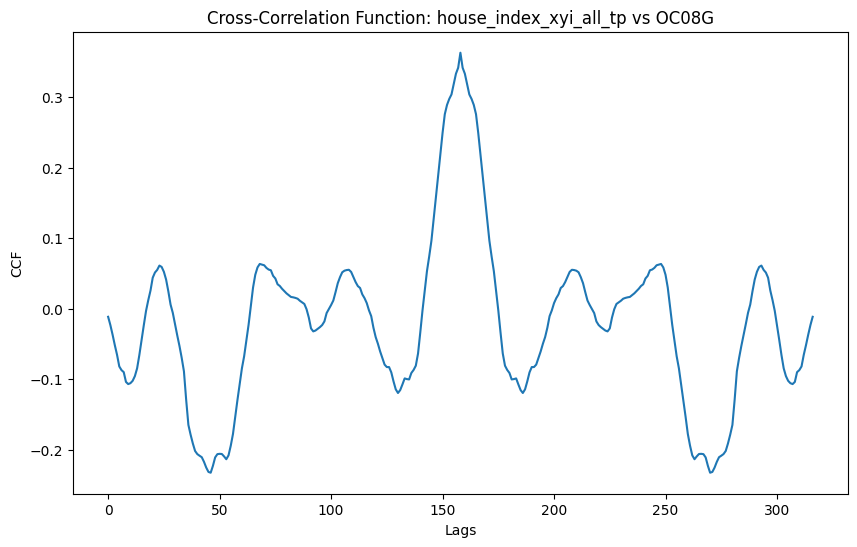

CCF for house_index_xyi_all_tp vs OC08G:
[-0.0114408  -0.02311573 -0.03682068 -0.05164904 -0.06534358 -0.08179837
 -0.08702292 -0.0898849  -0.10370774 -0.10679897 -0.10552178 -0.10216642
 -0.09548768 -0.08445831 -0.06562497 -0.0442074  -0.02334558 -0.00313383
  0.01212573  0.02571118  0.04394001  0.05131011  0.05500485  0.06114539
  0.05923042  0.05233854  0.04134634  0.02466824  0.00592634 -0.00583445
 -0.02194164 -0.03776553 -0.05283418 -0.06970386 -0.08873075 -0.12907496
 -0.16464593 -0.17867537 -0.19104675 -0.20158781 -0.20600771 -0.20831679
 -0.21042685 -0.21702097 -0.2251439  -0.23130689 -0.23240923 -0.22264101
 -0.21071014 -0.20608886 -0.20562461 -0.20587456 -0.20928632 -0.21328257
 -0.2078006  -0.19412731 -0.17739495 -0.15314719 -0.12939357 -0.10733451
 -0.08448799 -0.06740148 -0.04453521 -0.02264241  0.00359387  0.03003021
  0.04815006  0.05855684  0.06344451  0.06254514  0.06157893  0.057869
  0.05550487  0.05448959  0.04656206  0.04284375  0.03462703  0.03223309
  0.02828322

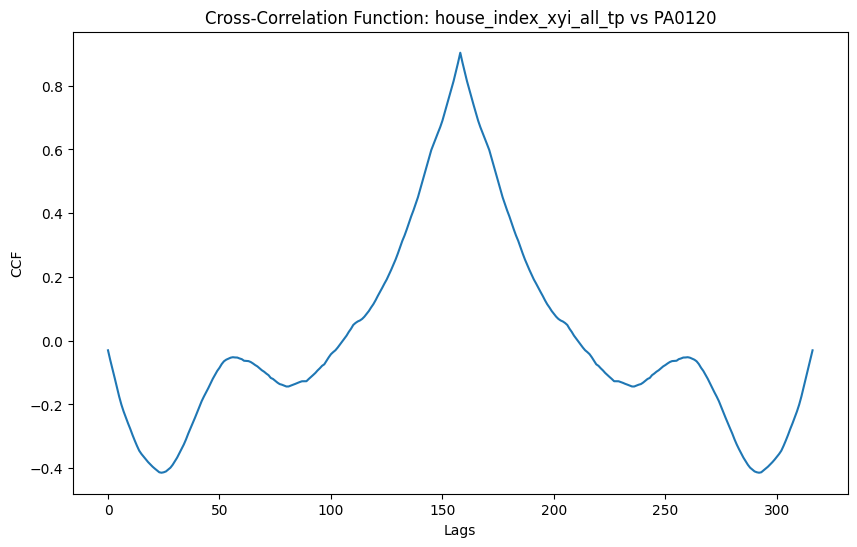

CCF for house_index_xyi_all_tp vs PA0120:
[-0.03010693 -0.06049325 -0.08849691 -0.11699811 -0.14606466 -0.1750023
 -0.20040778 -0.22192109 -0.24071127 -0.25943861 -0.27684538 -0.29573857
 -0.31326342 -0.32981727 -0.34494748 -0.35527157 -0.3639764  -0.37285929
 -0.3808566  -0.38806472 -0.39515675 -0.40122819 -0.40681091 -0.41267327
 -0.41407623 -0.41268507 -0.40997415 -0.40424786 -0.39829338 -0.38926241
 -0.37818365 -0.36676566 -0.35317883 -0.33996865 -0.32554264 -0.30938491
 -0.29124993 -0.27502637 -0.25870592 -0.24183812 -0.22451726 -0.20741873
 -0.18976828 -0.17528413 -0.16198162 -0.14851053 -0.13363296 -0.11945514
 -0.10672633 -0.09462953 -0.0849472  -0.07324832 -0.06460058 -0.05955146
 -0.05649674 -0.05322958 -0.05177143 -0.05256001 -0.05283331 -0.05564817
 -0.05787312 -0.06282224 -0.0635392  -0.0639527  -0.06678901 -0.07122279
 -0.0762795  -0.08059204 -0.08667286 -0.0926304  -0.09719309 -0.10305547
 -0.10808628 -0.11666461 -0.11997421 -0.12567242 -0.1314516  -0.13603624
 -0.138017

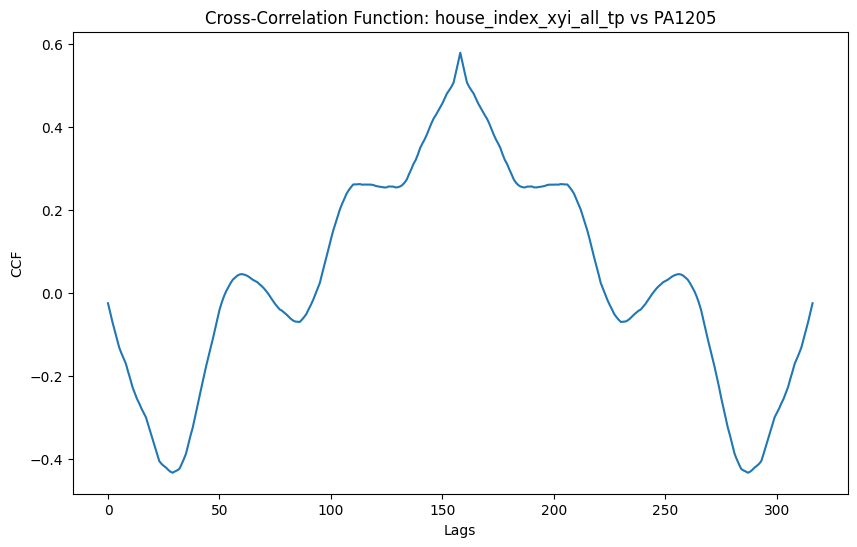

CCF for house_index_xyi_all_tp vs PA1205:
[-0.02430823 -0.04700996 -0.06966258 -0.08988768 -0.11061678 -0.1304675
 -0.14450516 -0.1573823  -0.16956777 -0.18881559 -0.20694843 -0.22642974
 -0.2401873  -0.25439084 -0.2653089  -0.27773612 -0.28834496 -0.29871891
 -0.31641195 -0.33418274 -0.35241586 -0.36975313 -0.38749897 -0.40430594
 -0.41097769 -0.4157361  -0.41982622 -0.42528332 -0.42980568 -0.43226024
 -0.42916783 -0.42663372 -0.42321239 -0.41191311 -0.39968418 -0.38611669
 -0.3644476  -0.3430259  -0.32375879 -0.29925843 -0.27528329 -0.25131817
 -0.22460232 -0.19997799 -0.1760588  -0.15370146 -0.1321139  -0.11055292
 -0.0874821  -0.06412645 -0.04037451 -0.02293112 -0.00771467  0.00474432
  0.0146452   0.02440381  0.03256276  0.03735835  0.0420891   0.04483169
  0.04585374  0.04467791  0.0427984   0.03995786  0.03590053  0.03201214
  0.0290509   0.02636072  0.02133639  0.01671053  0.01110046  0.00458343
 -0.00246416 -0.01077617 -0.01849813 -0.02636555 -0.03267724 -0.03918644
 -0.042238

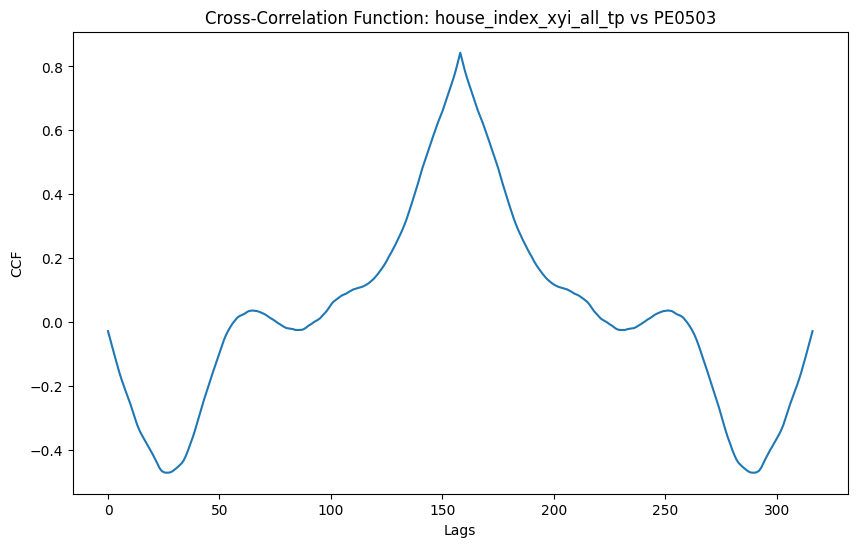

CCF for house_index_xyi_all_tp vs PE0503:
[-0.02784208 -0.05397348 -0.07973821 -0.10543856 -0.13072086 -0.15520171
 -0.1774818  -0.19784994 -0.21722911 -0.2363519  -0.25515074 -0.27636373
 -0.2983412  -0.3194912  -0.33646613 -0.3508266  -0.3630712  -0.3753409
 -0.38795005 -0.39981054 -0.41259691 -0.42600545 -0.44001303 -0.45471847
 -0.46466169 -0.46914728 -0.47082748 -0.47059696 -0.46960629 -0.46582256
 -0.46045756 -0.45486131 -0.44835047 -0.44162209 -0.43143731 -0.41668403
 -0.39925376 -0.37917241 -0.36037067 -0.33868231 -0.31485914 -0.2905925
 -0.26632386 -0.24369099 -0.22192363 -0.20047935 -0.17935594 -0.15764084
 -0.13708729 -0.11607089 -0.09513712 -0.07442615 -0.0555058  -0.03878667
 -0.02542309 -0.01342311 -0.00295056  0.0059669   0.01437588  0.01934119
  0.02253067  0.02542302  0.03011132  0.03437575  0.03596594  0.03651882
  0.03543729  0.03439165  0.03203082  0.02900406  0.02608549  0.02197762
  0.01690762  0.01227612  0.00830554  0.00312533 -0.00162251 -0.00602153
 -0.0102046

c:\Users\Tony\anaconda3\envs\dl\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25910 (\N{CJK UNIFIED IDEOGRAPH-6536}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Tony\anaconda3\envs\dl\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 30436 (\N{CJK UNIFIED IDEOGRAPH-76E4}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


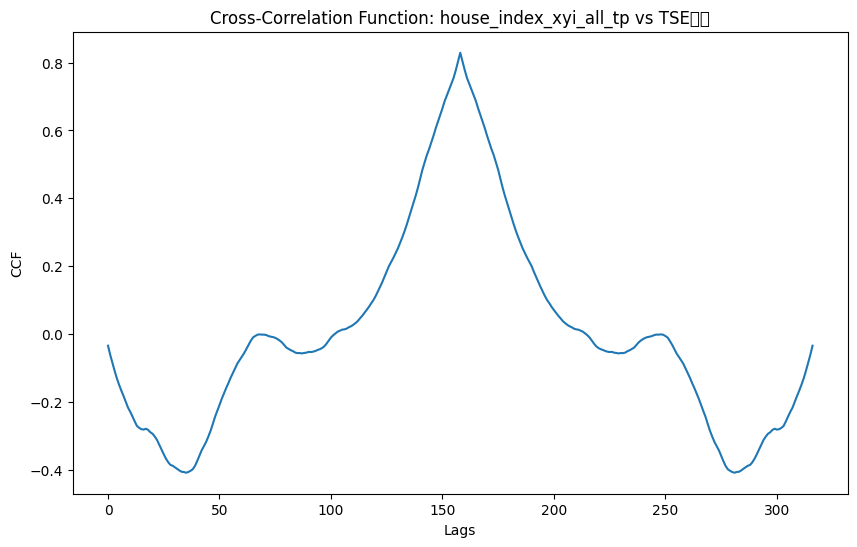

CCF for house_index_xyi_all_tp vs TSE收盤:
[-0.03426283 -0.06141026 -0.08508936 -0.10908477 -0.13117229 -0.14986787
 -0.1670724  -0.18301509 -0.19996717 -0.21702143 -0.22934883 -0.24307372
 -0.25771753 -0.27088223 -0.27645755 -0.28025225 -0.28134557 -0.2789616
 -0.28236319 -0.28935763 -0.29378755 -0.30222223 -0.31226305 -0.32639821
 -0.3401057  -0.35408391 -0.36717929 -0.37756896 -0.38553759 -0.38785806
 -0.39246532 -0.39681735 -0.4018114  -0.40569821 -0.40632215 -0.40851326
 -0.40646357 -0.40292315 -0.39841661 -0.38844911 -0.37409573 -0.35830519
 -0.34260298 -0.33055411 -0.31788101 -0.30199813 -0.28506913 -0.26511635
 -0.2438758  -0.22670873 -0.20905005 -0.19102134 -0.17487621 -0.15902134
 -0.14455668 -0.12870813 -0.11504145 -0.10111463 -0.08693636 -0.07682293
 -0.06668685 -0.05685694 -0.04439873 -0.0313787  -0.02017537 -0.01026792
 -0.00574493 -0.00198913 -0.00085591 -0.00169521 -0.00152985 -0.00298055
 -0.00578906 -0.00768305 -0.00883019 -0.01111529 -0.01459058 -0.01910749
 -0.0244764

c:\Users\Tony\anaconda3\envs\dl\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 27700 (\N{CJK UNIFIED IDEOGRAPH-6C34}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Tony\anaconda3\envs\dl\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 27877 (\N{CJK UNIFIED IDEOGRAPH-6CE5}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


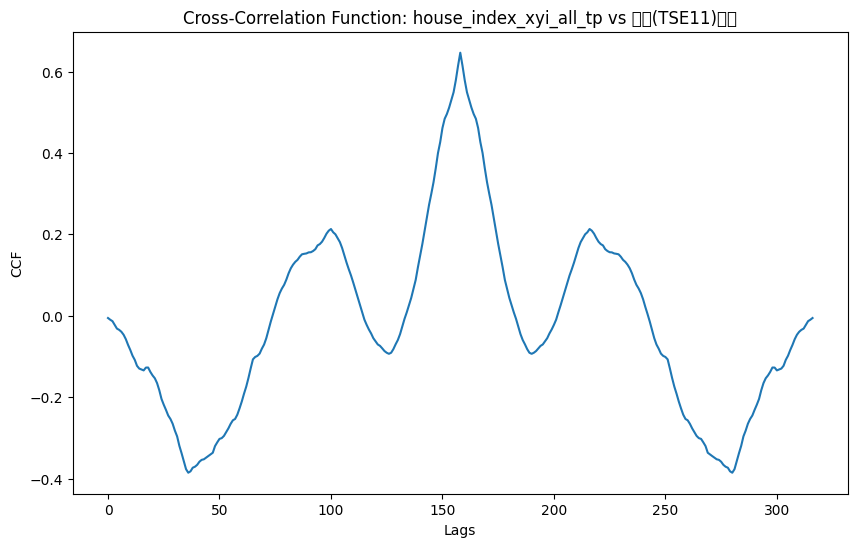

CCF for house_index_xyi_all_tp vs 水泥(TSE11)收盤:
[-0.00551217 -0.00976239 -0.01325398 -0.02246128 -0.03151197 -0.03460676
 -0.03933508 -0.0466501  -0.05755012 -0.07163509 -0.08407361 -0.09812144
 -0.10828782 -0.12287681 -0.1296977  -0.13197559 -0.13421949 -0.12729272
 -0.12715903 -0.13796328 -0.14663586 -0.15351813 -0.16538318 -0.18288444
 -0.20443364 -0.2185433  -0.23126992 -0.24501115 -0.25353572 -0.26531025
 -0.28223895 -0.29631229 -0.31946327 -0.337687   -0.35700989 -0.37683016
 -0.38560136 -0.38216591 -0.37327967 -0.37083023 -0.3661822  -0.35857269
 -0.35399868 -0.35258013 -0.34861814 -0.3447143  -0.34073556 -0.3365091
 -0.32011865 -0.3109432  -0.30250914 -0.30061219 -0.29518719 -0.28579549
 -0.27662618 -0.26557101 -0.25687127 -0.25352162 -0.24299988 -0.22746595
 -0.21066791 -0.19152572 -0.17401479 -0.15269141 -0.12920437 -0.10709298
 -0.10123961 -0.09853884 -0.09300606 -0.08089817 -0.07068746 -0.05504354
 -0.03433893 -0.01446208  0.00402981  0.02157868  0.04044558  0.05563522
  0.0

c:\Users\Tony\anaconda3\envs\dl\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24314 (\N{CJK UNIFIED IDEOGRAPH-5EFA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Tony\anaconda3\envs\dl\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26448 (\N{CJK UNIFIED IDEOGRAPH-6750}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Tony\anaconda3\envs\dl\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 29151 (\N{CJK UNIFIED IDEOGRAPH-71DF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Tony\anaconda3\envs\dl\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 36896 (\N{CJK UNIFIED IDEOGRAPH-9020}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


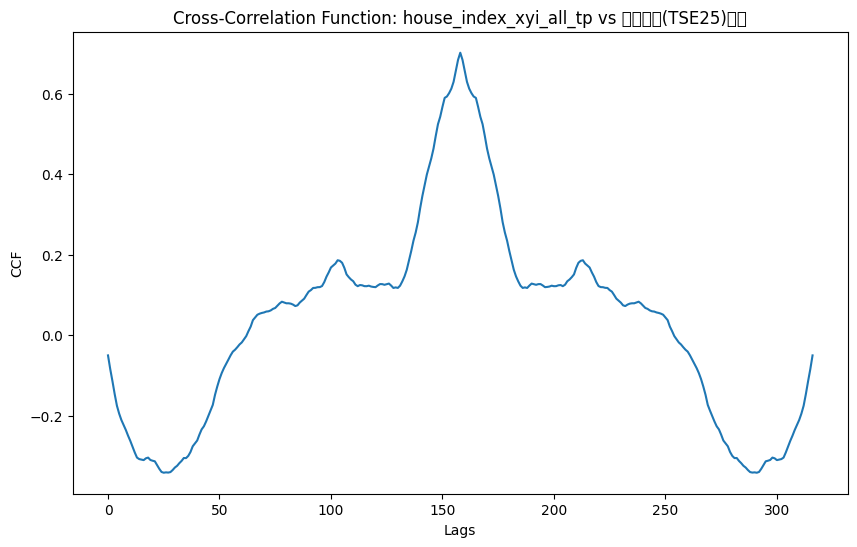

CCF for house_index_xyi_all_tp vs 建材營造(TSE25)收盤:
[-0.04972314 -0.08371084 -0.1138955  -0.14594891 -0.17475317 -0.19434961
 -0.21020247 -0.22242431 -0.23504809 -0.24919659 -0.26207671 -0.27668476
 -0.29083841 -0.30353252 -0.30727501 -0.30844711 -0.3098141  -0.30531917
 -0.30356419 -0.30945469 -0.31131575 -0.31276251 -0.32185174 -0.33141269
 -0.33920847 -0.34112525 -0.34021591 -0.34077167 -0.33953938 -0.33445423
 -0.32820499 -0.32394975 -0.31732816 -0.31180865 -0.30458825 -0.30482157
 -0.29929716 -0.28956749 -0.27546749 -0.2684056  -0.26111509 -0.24647307
 -0.23344597 -0.2258238  -0.2138132  -0.20032808 -0.18691165 -0.17268007
 -0.14759059 -0.12708257 -0.10873509 -0.09363868 -0.08120108 -0.07090067
 -0.06016339 -0.04941006 -0.04037186 -0.03557386 -0.02934045 -0.02253409
 -0.01755743 -0.00947245 -0.0018403   0.01057439  0.021889    0.03790046
  0.0444745   0.05124717  0.05392499  0.05571711  0.05696086  0.05915109
  0.05980531  0.06203296  0.0658775   0.06804046  0.07395201  0.07955417
  

c:\Users\Tony\anaconda3\envs\dl\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 33322 (\N{CJK UNIFIED IDEOGRAPH-822A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Tony\anaconda3\envs\dl\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 36939 (\N{CJK UNIFIED IDEOGRAPH-904B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Tony\anaconda3\envs\dl\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26989 (\N{CJK UNIFIED IDEOGRAPH-696D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


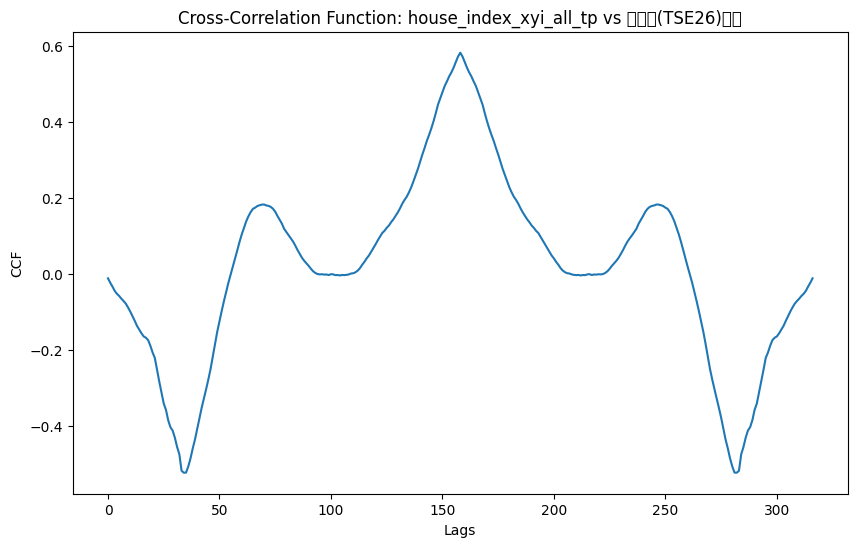

CCF for house_index_xyi_all_tp vs 航運業(TSE26)收盤:
[-0.01186415 -0.02357922 -0.03357643 -0.0448819  -0.05263093 -0.05831071
 -0.06554929 -0.07170367 -0.07875085 -0.08863675 -0.09964386 -0.11162622
 -0.12393143 -0.13701292 -0.1467585  -0.15660847 -0.16486591 -0.16834226
 -0.17461078 -0.1893974  -0.20725119 -0.22149006 -0.25309046 -0.28417621
 -0.31230644 -0.34170558 -0.35845215 -0.38576816 -0.40402139 -0.41295841
 -0.43184991 -0.45634554 -0.4752818  -0.51874416 -0.52387308 -0.52355457
 -0.50741711 -0.48627259 -0.45994952 -0.43665362 -0.40832258 -0.3788782
 -0.35302108 -0.32858841 -0.30391394 -0.2783282  -0.25047231 -0.21772718
 -0.18366229 -0.15235502 -0.12465897 -0.09756926 -0.07186725 -0.04754108
 -0.02347322 -0.0021849   0.0183208   0.04097961  0.06222751  0.08429089
  0.10409771  0.1213598   0.13844124  0.1518257   0.16276478  0.17111832
  0.1743377   0.17854419  0.18072049  0.18226045  0.18262293  0.18011371
  0.1789401   0.17630695  0.17132618  0.16353429  0.15240468  0.14207712
  0.

c:\Users\Tony\anaconda3\envs\dl\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 37628 (\N{CJK UNIFIED IDEOGRAPH-92FC}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Tony\anaconda3\envs\dl\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 37941 (\N{CJK UNIFIED IDEOGRAPH-9435}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


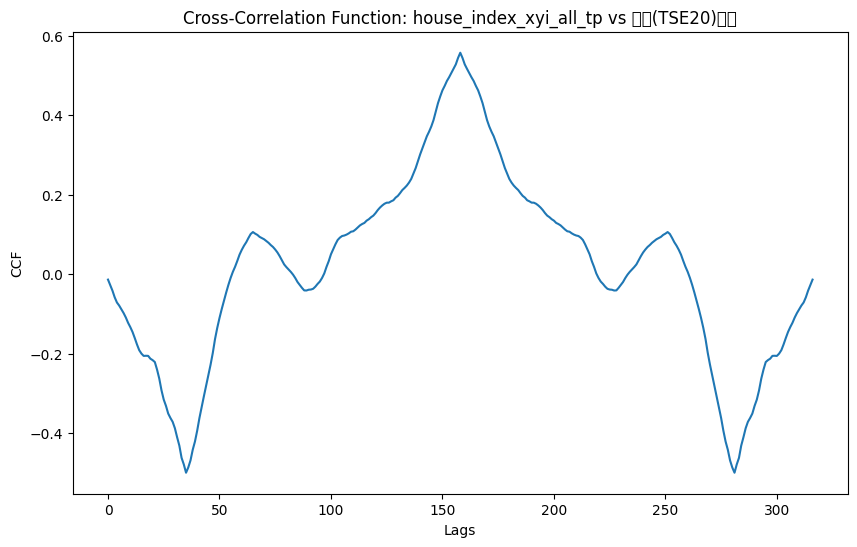

CCF for house_index_xyi_all_tp vs 鋼鐵(TSE20)收盤:
[-0.01374875 -0.0278549  -0.04154454 -0.05827254 -0.0712803  -0.07896754
 -0.08843383 -0.09795959 -0.10912652 -0.12237917 -0.1332258  -0.14553107
 -0.16079899 -0.17696896 -0.19134558 -0.19999104 -0.20578827 -0.20538459
 -0.20562923 -0.2127243  -0.21631422 -0.22120068 -0.24024441 -0.26305978
 -0.29255906 -0.31578063 -0.33151119 -0.35084118 -0.36195319 -0.37168348
 -0.38778637 -0.41050866 -0.43161845 -0.46233119 -0.47886675 -0.49972272
 -0.48653695 -0.46872823 -0.44194986 -0.42121195 -0.39389041 -0.36224469
 -0.33446031 -0.30738375 -0.28075763 -0.25461239 -0.22793896 -0.19825518
 -0.16334451 -0.13520949 -0.11049798 -0.08805165 -0.06703708 -0.046415
 -0.0269428  -0.00945329  0.00581005  0.01867605  0.03348282  0.04916739
  0.0612563   0.07160746  0.08031607  0.09117736  0.10103665  0.10596168
  0.10197484  0.09874826  0.09382694  0.09090353  0.08782457  0.08334274
  0.07894775  0.073245    0.06842385  0.06193434  0.05452834  0.04526325
  0.03

c:\Users\Tony\anaconda3\envs\dl\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20523 (\N{CJK UNIFIED IDEOGRAPH-502B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Tony\anaconda3\envs\dl\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25958 (\N{CJK UNIFIED IDEOGRAPH-6566}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Tony\anaconda3\envs\dl\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 37569 (\N{CJK UNIFIED IDEOGRAPH-92C1}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Tony\anaconda3\envs\dl\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 29694 (\N{CJK UNIFIED IDEOGRAPH-73FE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Tony\anaconda3\envs\dl\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 36008 (\N{CJK UNIFIED IDEOGRAPH-8CA

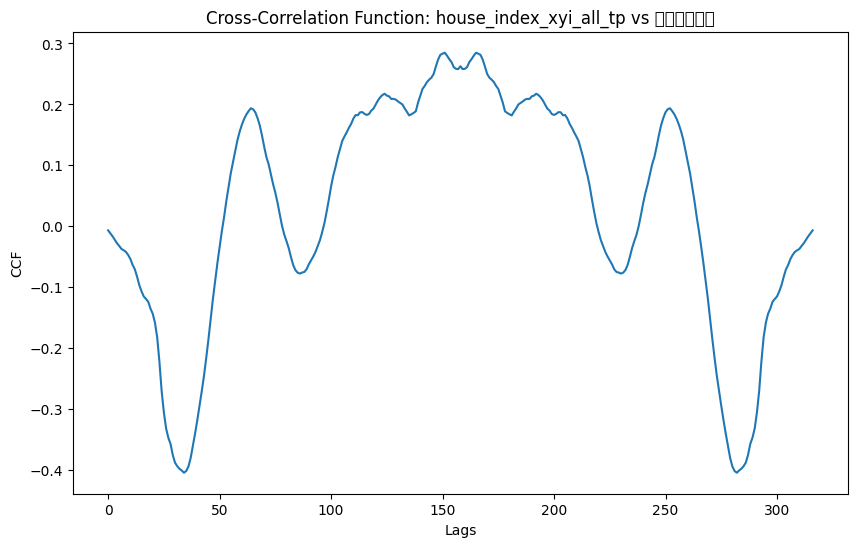

CCF for house_index_xyi_all_tp vs 倫敦鋁現貨價:
[-0.00679421 -0.01177982 -0.01661346 -0.0224038  -0.02795958 -0.03250188
 -0.03737375 -0.03950409 -0.04220019 -0.04724685 -0.05393951 -0.06360399
 -0.07094861 -0.0831729  -0.09702367 -0.10706513 -0.1153936  -0.11944002
 -0.12408978 -0.13521209 -0.14358713 -0.15826634 -0.1823484  -0.22221831
 -0.27056372 -0.30568829 -0.33191192 -0.34724427 -0.35757845 -0.3756297
 -0.38817403 -0.39398512 -0.39820077 -0.40097924 -0.40468341 -0.40196258
 -0.3946207  -0.38076956 -0.36053429 -0.34032467 -0.31822793 -0.29481133
 -0.27067821 -0.2454268  -0.2161979  -0.18534673 -0.15234339 -0.11923803
 -0.08932052 -0.06073098 -0.03382285 -0.00822343  0.01489097  0.0409311
  0.06416577  0.08686296  0.10533652  0.12335804  0.14126807  0.15543256
  0.16668501  0.17620668  0.18342511  0.18899648  0.19361422  0.19207703
  0.18712775  0.17769434  0.16563022  0.1490406   0.13047679  0.11341734
  0.10166747  0.08544124  0.06886787  0.05484838  0.03831227  0.0190234
  0.00076147

c:\Users\Tony\anaconda3\envs\dl\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 39640 (\N{CJK UNIFIED IDEOGRAPH-9AD8}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Tony\anaconda3\envs\dl\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 32026 (\N{CJK UNIFIED IDEOGRAPH-7D1A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Tony\anaconda3\envs\dl\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 37509 (\N{CJK UNIFIED IDEOGRAPH-9285}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Tony\anaconda3\envs\dl\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26997 (\N{CJK UNIFIED IDEOGRAPH-6975}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


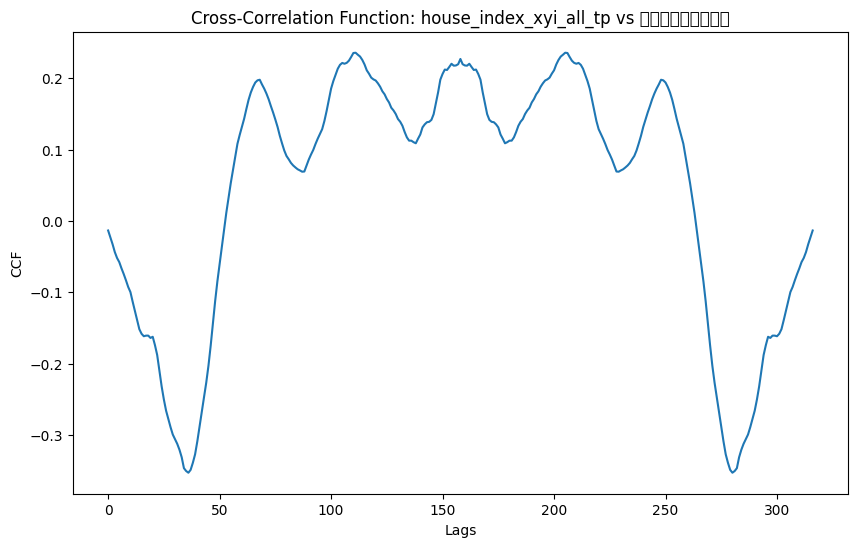

CCF for house_index_xyi_all_tp vs 倫敦高級銅極現貨價:
[-0.0134881  -0.02291811 -0.03275934 -0.04376617 -0.05200383 -0.05781009
 -0.06660527 -0.074624   -0.08335801 -0.09264884 -0.09980152 -0.11327999
 -0.1260457  -0.13936217 -0.15184402 -0.15828475 -0.16168021 -0.16084466
 -0.16081354 -0.16407341 -0.16243937 -0.17413559 -0.18798995 -0.21014135
 -0.23193573 -0.25037978 -0.26611317 -0.27777494 -0.28921229 -0.29947202
 -0.30586967 -0.31254521 -0.32085492 -0.33135027 -0.34662437 -0.35064682
 -0.35298923 -0.34896174 -0.33907856 -0.32723272 -0.30909746 -0.28826886
 -0.26794893 -0.24720181 -0.22684886 -0.20304783 -0.1748042  -0.14393891
 -0.11248808 -0.08482023 -0.06028224 -0.03659389 -0.01281847  0.01126213
  0.03197696  0.05290605  0.07093244  0.08967818  0.10801728  0.12037183
  0.13146481  0.14310836  0.15678008  0.16973967  0.17994699  0.18773408
  0.19390684  0.19697483  0.19779827  0.19126268  0.18537895  0.17844699
  0.17039971  0.1608439   0.15179151  0.1419706   0.13162812  0.11927451
  0.10

c:\Users\Tony\anaconda3\envs\dl\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24052 (\N{CJK UNIFIED IDEOGRAPH-5DF4}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Tony\anaconda3\envs\dl\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25343 (\N{CJK UNIFIED IDEOGRAPH-62FF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Tony\anaconda3\envs\dl\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 39340 (\N{CJK UNIFIED IDEOGRAPH-99AC}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Tony\anaconda3\envs\dl\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 22411 (\N{CJK UNIFIED IDEOGRAPH-578B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Tony\anaconda3\envs\dl\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 27331 (\N{CJK UNIFIED IDEOGRAPH-6AC

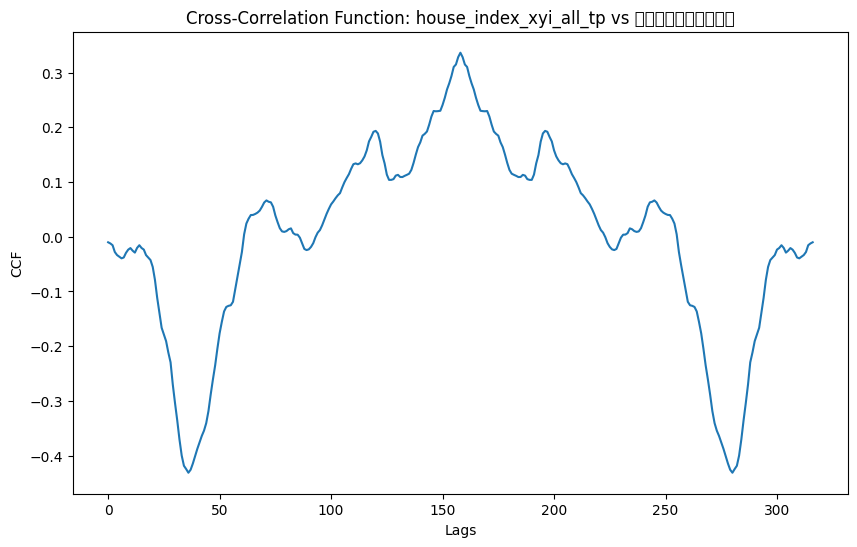

CCF for house_index_xyi_all_tp vs 巴拿馬型貨櫃運費指數:
[-0.01006757 -0.0122386  -0.01546713 -0.02785676 -0.03341518 -0.03641259
 -0.0394061  -0.03789535 -0.02945765 -0.02358377 -0.02066447 -0.02545021
 -0.0289778  -0.02027718 -0.01544549 -0.02052968 -0.02343773 -0.03348942
 -0.03809241 -0.04255278 -0.05507445 -0.07880144 -0.11142432 -0.13876765
 -0.16632965 -0.17832936 -0.19079851 -0.21158453 -0.22946247 -0.27011212
 -0.30400324 -0.33576808 -0.37053022 -0.39993786 -0.41857825 -0.42461361
 -0.4312827  -0.42583357 -0.41449146 -0.40080788 -0.38771816 -0.3757385
 -0.36408244 -0.35437353 -0.34058638 -0.31854605 -0.28838472 -0.26075897
 -0.23508668 -0.20457751 -0.17646046 -0.1554207  -0.13647169 -0.12826623
 -0.12622975 -0.12521261 -0.11884498 -0.09634458 -0.07396743 -0.05189278
 -0.02783972  0.0044901   0.02415234  0.03305226  0.03970207  0.03994941
  0.04174741  0.04415589  0.04789733  0.05474448  0.06262454  0.06646263
  0.06398066  0.06293824  0.05489506  0.03900941  0.02677272  0.01566802
  0.00

c:\Users\Tony\anaconda3\envs\dl\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26460 (\N{CJK UNIFIED IDEOGRAPH-675C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Tony\anaconda3\envs\dl\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25308 (\N{CJK UNIFIED IDEOGRAPH-62DC}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Tony\anaconda3\envs\dl\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 36629 (\N{CJK UNIFIED IDEOGRAPH-8F15}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Tony\anaconda3\envs\dl\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21407 (\N{CJK UNIFIED IDEOGRAPH-539F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Tony\anaconda3\envs\dl\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 27833 (\N{CJK UNIFIED IDEOGRAPH-6CB

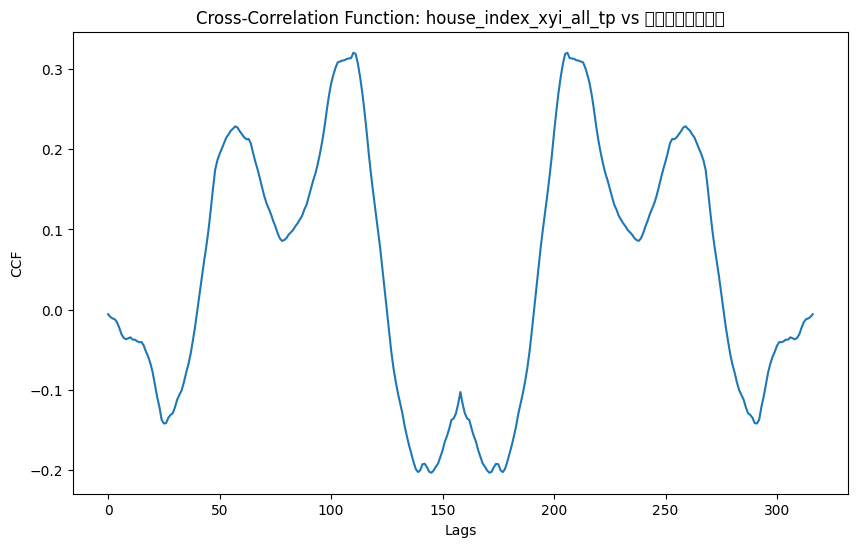

CCF for house_index_xyi_all_tp vs 杜拜輕原油現貨價:
[-0.0057143  -0.00906772 -0.01096938 -0.01199711 -0.01574439 -0.02261712
 -0.030748   -0.03521914 -0.03693269 -0.03578058 -0.03450556 -0.03738863
 -0.03738846 -0.03938743 -0.0406373  -0.04040439 -0.04492325 -0.05255463
 -0.05885124 -0.06748873 -0.07843215 -0.09402594 -0.10897032 -0.12125372
 -0.13728028 -0.14192551 -0.14148591 -0.13483613 -0.13127678 -0.12904117
 -0.12154376 -0.11193311 -0.10622239 -0.100318   -0.09042927 -0.07856109
 -0.0681024  -0.05519251 -0.03860898 -0.02113964 -0.00075669  0.0203345
  0.04096837  0.05978468  0.07832273  0.09895411  0.12377757  0.15028174
  0.1741863   0.18630974  0.19422628  0.20086207  0.2076134   0.21454819
  0.21845989  0.22309203  0.22564077  0.22861624  0.22720212  0.22263303
  0.21878969  0.21495008  0.21246373  0.21281595  0.20746294  0.19547372
  0.18472833  0.17518236  0.16455806  0.15293662  0.1419456   0.13296137
  0.12603198  0.119317    0.11095402  0.10389298  0.09546996  0.08900667
  0.0857

c:\Users\Tony\anaconda3\envs\dl\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21271 (\N{CJK UNIFIED IDEOGRAPH-5317}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Tony\anaconda3\envs\dl\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21312 (\N{CJK UNIFIED IDEOGRAPH-5340}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Tony\anaconda3\envs\dl\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21488 (\N{CJK UNIFIED IDEOGRAPH-53F0}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


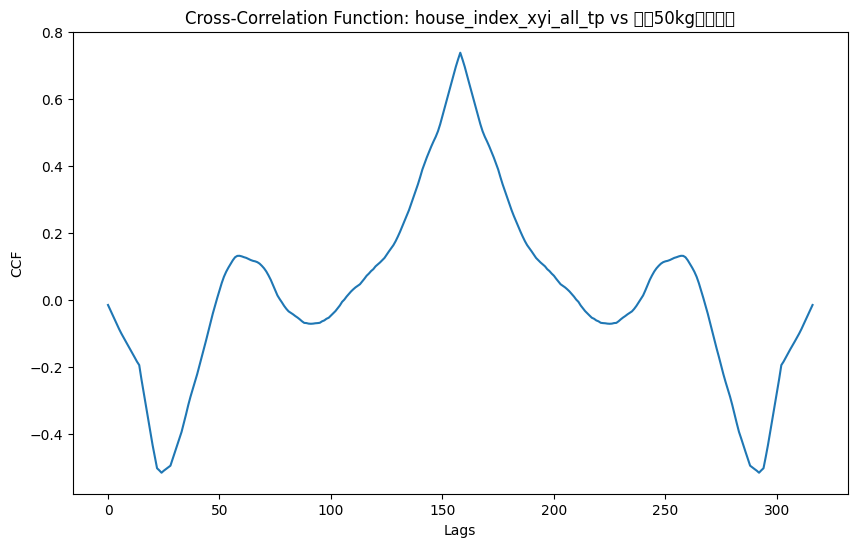

CCF for house_index_xyi_all_tp vs 水泥50kg北區台泥:
[-1.53958504e-02 -2.97742084e-02 -4.41214640e-02 -5.86686635e-02
 -7.34202501e-02 -8.76119938e-02 -1.00750699e-01 -1.13005208e-01
 -1.24753193e-01 -1.36545609e-01 -1.47853717e-01 -1.59872737e-01
 -1.72380508e-01 -1.84621688e-01 -1.94925633e-01 -2.37358042e-01
 -2.76801159e-01 -3.15920050e-01 -3.55413258e-01 -3.95401364e-01
 -4.33872183e-01 -4.69348778e-01 -5.03067573e-01 -5.09348969e-01
 -5.16407373e-01 -5.10476899e-01 -5.05561922e-01 -5.00662993e-01
 -4.95398597e-01 -4.75252723e-01 -4.55363023e-01 -4.35157573e-01
 -4.14220895e-01 -3.94384064e-01 -3.68565695e-01 -3.42046172e-01
 -3.14192138e-01 -2.89342376e-01 -2.67077126e-01 -2.45554617e-01
 -2.22063311e-01 -1.96896947e-01 -1.70604948e-01 -1.46079416e-01
 -1.20818718e-01 -9.43070731e-02 -6.76220849e-02 -4.12648721e-02
 -1.73209651e-02  5.77729948e-03  2.80573138e-02  4.99994502e-02
  6.89085007e-02  8.38144338e-02  9.61691410e-02  1.07337298e-01
  1.18362154e-01  1.27201852e-01  1.31229506

c:\Users\Tony\anaconda3\envs\dl\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 28961 (\N{CJK UNIFIED IDEOGRAPH-7121}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Tony\anaconda3\envs\dl\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 37467 (\N{CJK UNIFIED IDEOGRAPH-925B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Tony\anaconda3\envs\dl\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 27773 (\N{CJK UNIFIED IDEOGRAPH-6C7D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


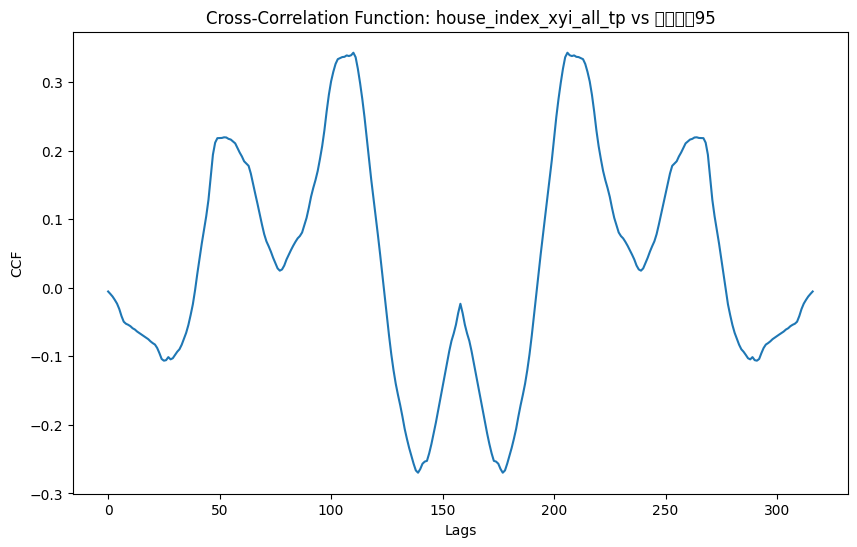

CCF for house_index_xyi_all_tp vs 無鉛汽油95:
[-0.00532698 -0.00888665 -0.01269758 -0.017614   -0.02306939 -0.0308871
 -0.04119931 -0.04941443 -0.05239399 -0.0539206  -0.05598442 -0.05899512
 -0.06081871 -0.06374834 -0.06594435 -0.06811036 -0.07035337 -0.07259637
 -0.07490703 -0.07807242 -0.08062982 -0.08273375 -0.087727   -0.09527436
 -0.10374519 -0.10627919 -0.10550857 -0.10105368 -0.10433711 -0.10269684
 -0.09781668 -0.0932187  -0.0895901  -0.08299071 -0.07426983 -0.06561988
 -0.05410111 -0.03971633 -0.02402733 -0.00324421  0.02053257  0.04238286
  0.06465887  0.08431466  0.10449908  0.12830878  0.16182494  0.19424868
  0.21179794  0.2183584   0.21847697  0.21866148  0.21961271  0.21936078
  0.21733213  0.21633217  0.2136011   0.21075353  0.20395542  0.19740915
  0.19168661  0.18459219  0.18119406  0.17798828  0.16675669  0.15165722
  0.1369409   0.12247324  0.10705731  0.0922773   0.0783026   0.06783287
  0.06064609  0.05279545  0.04389689  0.03624054  0.02843169  0.0250515
  0.0268427

c:\Users\Tony\anaconda3\envs\dl\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 31481 (\N{CJK UNIFIED IDEOGRAPH-7AF9}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Tony\anaconda3\envs\dl\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 31680 (\N{CJK UNIFIED IDEOGRAPH-7BC0}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Tony\anaconda3\envs\dl\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 31563 (\N{CJK UNIFIED IDEOGRAPH-7B4B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Tony\anaconda3\envs\dl\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21335 (\N{CJK UNIFIED IDEOGRAPH-5357}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


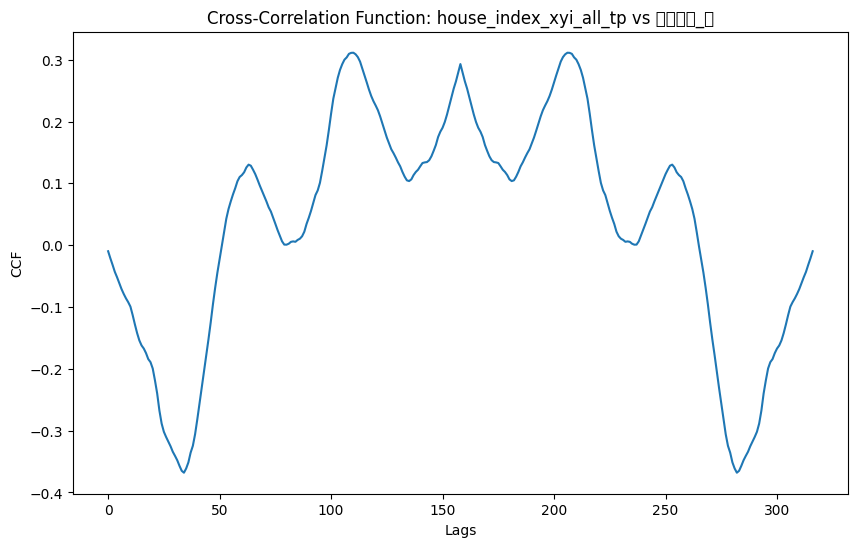

CCF for house_index_xyi_all_tp vs 竹節鋼筋_南:
[-0.00978342 -0.02123461 -0.03187612 -0.04312798 -0.0518363  -0.06123652
 -0.07089165 -0.07889978 -0.0860004  -0.09213407 -0.09935756 -0.11302252
 -0.12811903 -0.14220743 -0.15406698 -0.16222177 -0.16725814 -0.1746618
 -0.18426309 -0.18919622 -0.19947756 -0.21862567 -0.23996126 -0.26757759
 -0.28855352 -0.30189583 -0.31027786 -0.31781841 -0.32530937 -0.33417671
 -0.34083241 -0.34793799 -0.35693266 -0.36493772 -0.3680899  -0.36121882
 -0.35132258 -0.33563172 -0.32458482 -0.3058733  -0.28164289 -0.25587604
 -0.23076821 -0.20447814 -0.17764148 -0.15244323 -0.12513527 -0.0958658
 -0.06911324 -0.04453403 -0.02287741 -0.00174155  0.02106927  0.04276273
  0.05852802  0.07083116  0.08212944  0.09216486  0.10345049  0.11034695
  0.11340513  0.11799173  0.12574297  0.13030278  0.12857837  0.12206333
  0.11488767  0.10601292  0.09665064  0.0881536   0.07956259  0.07079646
  0.06129231  0.0544392   0.04462456  0.03460677  0.02443231  0.01555186
  0.0062676

c:\Users\Tony\anaconda3\envs\dl\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 38928 (\N{CJK UNIFIED IDEOGRAPH-9810}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Tony\anaconda3\envs\dl\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25292 (\N{CJK UNIFIED IDEOGRAPH-62CC}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Tony\anaconda3\envs\dl\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 28151 (\N{CJK UNIFIED IDEOGRAPH-6DF7}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Tony\anaconda3\envs\dl\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20957 (\N{CJK UNIFIED IDEOGRAPH-51DD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Tony\anaconda3\envs\dl\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 22303 (\N{CJK UNIFIED IDEOGRAPH-571

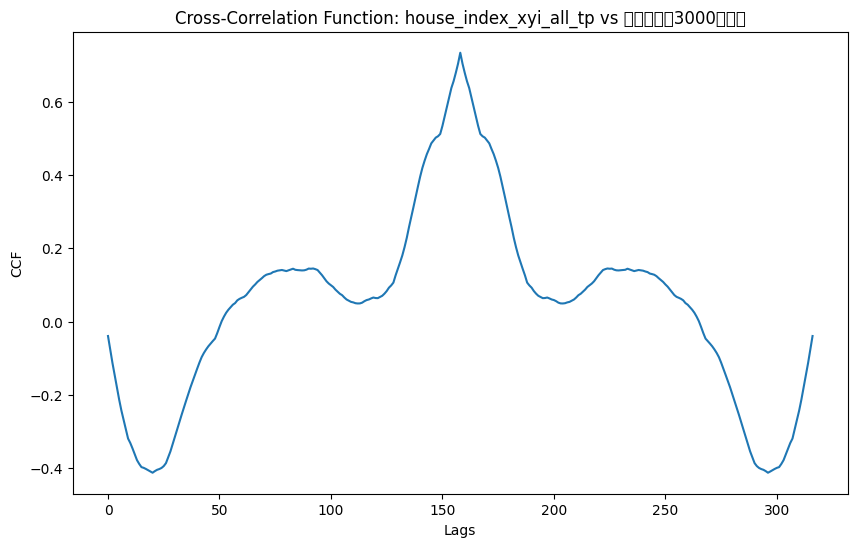

CCF for house_index_xyi_all_tp vs 預拌混凝土3000磅台北:
[-0.03943504 -0.07626386 -0.11301302 -0.1461826  -0.18014611 -0.21268391
 -0.2424713  -0.26857568 -0.29362157 -0.31906389 -0.33120782 -0.34610044
 -0.36230754 -0.37789437 -0.38824559 -0.39690961 -0.3989418  -0.4019372
 -0.40536048 -0.40899823 -0.41222238 -0.40790766 -0.4043339  -0.40222798
 -0.39922975 -0.39410996 -0.38602157 -0.3703498  -0.35404302 -0.3344919
 -0.31415443 -0.29451674 -0.27411926 -0.25461186 -0.23525345 -0.21632623
 -0.19774205 -0.17909711 -0.16198377 -0.14524513 -0.1283537  -0.11198899
 -0.09705739 -0.0856734  -0.07607775 -0.06747509 -0.06017835 -0.05313505
 -0.0464297  -0.03139629 -0.01459293  0.00117831  0.01347964  0.02406842
  0.03236096  0.03937114  0.04600127  0.05032242  0.05789102  0.06192327
  0.06482832  0.06738483  0.07232074  0.07990607  0.0875332   0.09521663
  0.10119535  0.10800406  0.11310152  0.11824539  0.12383505  0.12767788
  0.12950278  0.13096545  0.13490955  0.13657028  0.13877574  0.13981052
  0.1

In [5]:
import pandas as pd
import numpy as np
import statsmodels.tsa.stattools as smt
import matplotlib.pyplot as plt

# 假設第一列是日期，將其設為索引
df.set_index(df.columns[0], inplace=True)

# 確保只處理數值型列
numerical_columns = df.select_dtypes(include=[np.number]).columns

# 初始化一個字典來存儲每一列的 CCF 結果
ccf_results = {}

# 使用第一個數值列作為基準序列   # 房價?
base_series = df[numerical_columns[0]]

for column in numerical_columns[1:]:
    series = df[column]
    # 若ccf(<A 比較時間序列>, <B 基準時間序列>)
    # 若lag值是正的，代表A落後於B，若lag值是負的代表B落後於A  ("落後於"是前幾個月的意思)
    # 我們想要找的應該是超前指標?! # 所以這邊邏輯沒問題
    backwards = smt.ccf(series, base_series, adjusted=False)[::-1]
    forwards = smt.ccf(series, base_series, adjusted=False)
    ccf_output = np.r_[backwards[:-1], forwards]
    ccf_results[column] = ccf_output

    # 畫圖顯示交叉相關函數
    plt.figure(figsize=(10, 6))
    plt.plot(ccf_output)
    plt.title(f'Cross-Correlation Function: {numerical_columns[0]} vs {column}')
    plt.xlabel('Lags')
    plt.ylabel('CCF')
    plt.show()

    # 輸出交叉相關函數結果
    print(f'CCF for {numerical_columns[0]} vs {column}:')
    print(ccf_output)

In [8]:
import pandas as pd
import numpy as np
import statsmodels.tsa.stattools as smt
import matplotlib.pyplot as plt
import seaborn as sns

def calculate_ccf(df, date_col):

    # 假設第一列是日期，將其設為索引
    df.set_index(df.columns[0], inplace=True)

    # 確保只處理數值型列
    numerical_columns = df.select_dtypes(include=[np.number]).columns

    # 初始化一個字典來存儲每一列的 CCF 結果
    ccf_results = {}

    # 使用第一個數值列作為基準序列
    base_series = df[numerical_columns[0]]

    for column in numerical_columns[1:]:
        series = df[column]
        backwards = smt.ccf(series, base_series, adjusted=False)[::-1]
        forwards = smt.ccf(series, base_series, adjusted=False)
        ccf_output = np.r_[backwards[:-1], forwards]
        ccf_results[column] = ccf_output

        # # 畫圖顯示交叉相關函數
        # plt.figure(figsize=(10, 6))
        # plt.plot(ccf_output)
        # plt.title(f'Cross-Correlation Function: {numerical_columns[0]} vs {column}')
        # plt.xlabel('Lags')
        # plt.ylabel('CCF')
        # plt.show()

        # # 輸出交叉相關函數結果
        # print(f'CCF for {numerical_columns[0]} vs {column}:')
        # print(ccf_output)
    return ccf_results

def plot_ccf(ccf_results):
    for column, ccf_output in ccf_results.items():
        plt.figure(figsize=(10, 6))
        plt.plot(ccf_output)
        plt.axhline(y=0, linestyle='--', color='gray')
        plt.axhline(y=1.96/np.sqrt(len(ccf_output)), linestyle='--', color='blue')
        plt.axhline(y=-1.96/np.sqrt(len(ccf_output)), linestyle='--', color='blue')
        plt.title(f'Cross-Correlation Function: Base Series vs {column}')
        plt.xlabel('Lags')
        plt.ylabel('CCF')
        plt.show()

def ccf_to_dataframe(ccf_results):
    max_len = max(len(v) for v in ccf_results.values())
    df_ccf = pd.DataFrame({k: v.tolist() + [np.nan]*(max_len - len(v)) for k, v in ccf_results.items()})
    return df_ccf

# 將 ccf_results 轉換為 DataFrame
df_ccf = ccf_to_dataframe(ccf_results)

# 顯示為表格
print(df_ccf)
print(type(df_ccf))

# # 以熱圖顯示
# plt.figure(figsize=(12, 8))
# sns.heatmap(df_ccf.T, cmap="coolwarm", annot=True, fmt=".2f", cbar=True)
# plt.title('Cross-Correlation Function Heatmap')
# plt.xlabel('Lags')
# plt.ylabel('Series')
# plt.show()

# # 繪製線性圖形
# fig, ax = plt.subplots(figsize=(12, 8))
# for column in df_ccf.columns:
#     ax.plot(df_ccf[column], label=column)
# ax.axhline(y=0, linestyle='--', color='gray')
# ax.axhline(y=1.96/np.sqrt(len(df_ccf)), linestyle='--', color='blue')
# ax.axhline(y=-1.96/np.sqrt(len(df_ccf)), linestyle='--', color='blue')
# ax.set_title('Cross-Correlation Functions')
# ax.set_xlabel('Lags')
# ax.set_ylabel('CCF')
# ax.legend(loc='upper right')
# plt.show()

     house_index_xyi_tp  house_index_xyi_new_tp    EA1101    EB0312    EB0911  \
0             -0.036804               -0.032733 -0.013780 -0.007275 -0.010554   
1             -0.068371               -0.062753 -0.024759 -0.011695 -0.031492   
2             -0.096694               -0.090479 -0.032055 -0.008543 -0.036394   
3             -0.120336               -0.117072 -0.030330 -0.005209 -0.053200   
4             -0.144460               -0.142780 -0.025615  0.000860 -0.071962   
..                  ...                     ...       ...       ...       ...   
312           -0.144460               -0.142780 -0.025615  0.000860 -0.071962   
313           -0.120336               -0.117072 -0.030330 -0.005209 -0.053200   
314           -0.096694               -0.090479 -0.032055 -0.008543 -0.036394   
315           -0.068371               -0.062753 -0.024759 -0.011695 -0.031492   
316           -0.036804               -0.032733 -0.013780 -0.007275 -0.010554   

         EB18      EB21    

## 自相關 (Auto Correlation Function, ACF)

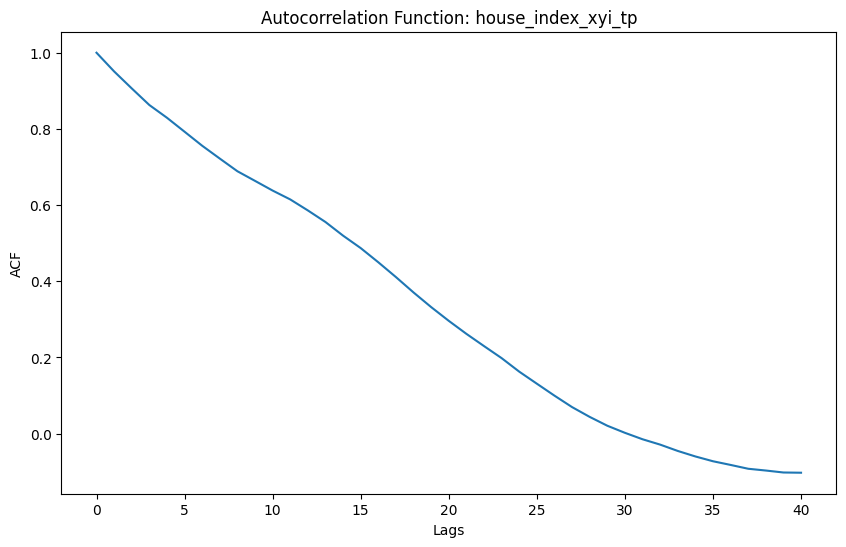

ACF for house_index_xyi_tp:
[ 1.          0.95089625  0.906319    0.8626853   0.8292385   0.79256711
  0.75576264  0.72206649  0.68880004  0.66351092  0.63805338  0.6147802
  0.58590685  0.55550114  0.51967313  0.48704239  0.44977578  0.41093279
  0.3705328   0.33211987  0.29602548  0.2618963   0.22977859  0.19814111
  0.16264345  0.1310443   0.09965218  0.06956549  0.04385981  0.02067564
  0.00205443 -0.01484615 -0.02890861 -0.0455267  -0.06000354 -0.07260239
 -0.08225284 -0.09231425 -0.09695478 -0.10212954 -0.10271418]


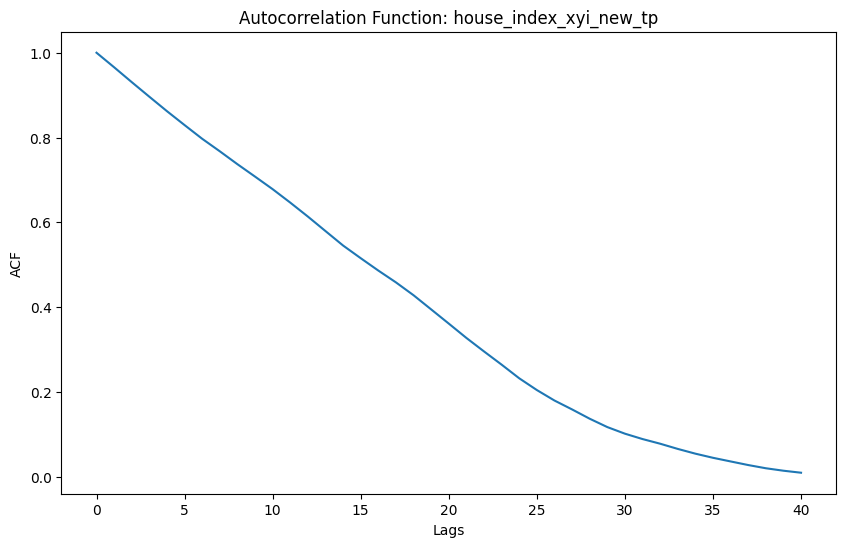

ACF for house_index_xyi_new_tp:
[1.         0.96568923 0.93066863 0.89621776 0.8621492  0.82934526
 0.79703207 0.76754429 0.73711541 0.7078533  0.67821063 0.64651068
 0.61359632 0.57940178 0.54529033 0.51542875 0.48626239 0.45839
 0.42806226 0.39466612 0.36118733 0.32737274 0.29554731 0.2643739
 0.23219984 0.20449454 0.17978209 0.15877935 0.13686716 0.11717116
 0.10159633 0.08891747 0.07793236 0.0656684  0.05446401 0.0447104
 0.03613602 0.02761739 0.02005925 0.01424977 0.00951803]


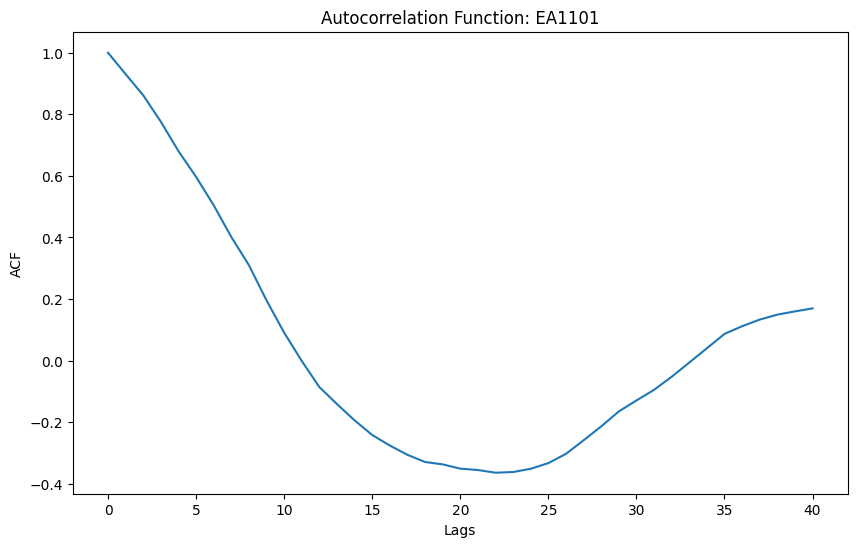

ACF for EA1101:
[ 1.          0.93051763  0.86170677  0.77594038  0.68052847  0.59681654
  0.50469193  0.40168577  0.31003545  0.19562312  0.09100644 -0.00102156
 -0.08582978 -0.14102032 -0.19396237 -0.24144528 -0.27563445 -0.30579773
 -0.3290718  -0.33685714 -0.35066614 -0.35517375 -0.3639444  -0.36165303
 -0.3511462  -0.33276805 -0.30272982 -0.25872634 -0.21349003 -0.16498956
 -0.1292782  -0.09481645 -0.05239315 -0.00612441  0.0401611   0.08679075
  0.1118545   0.13334669  0.14939651  0.15997041  0.16974584]


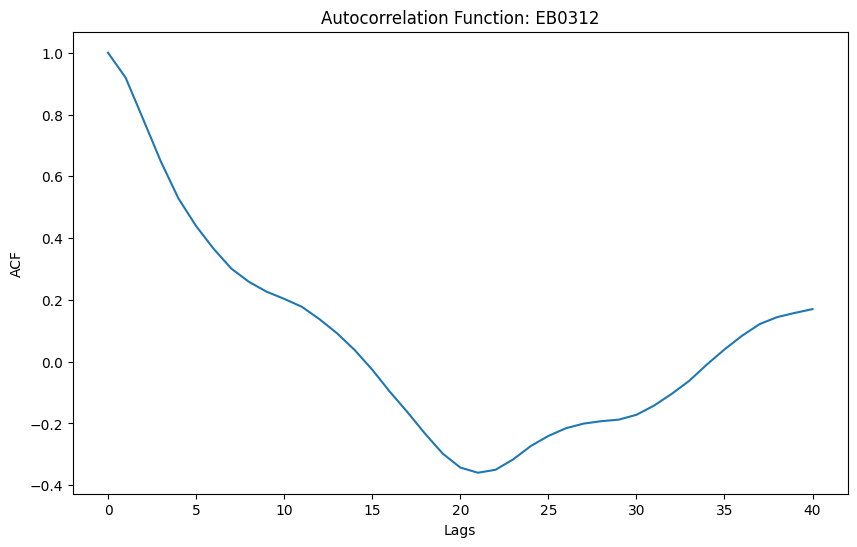

ACF for EB0312:
[ 1.          0.91933502  0.78420326  0.64788805  0.52825149  0.43906672
  0.36507151  0.30131881  0.25841342  0.22656747  0.20333219  0.17774383
  0.13779286  0.09197747  0.03785402 -0.02586911 -0.09724466 -0.16340212
 -0.2332026  -0.29747069 -0.34283021 -0.35956468 -0.35007114 -0.31651793
 -0.27332336 -0.24049787 -0.21552295 -0.2005751  -0.19276741 -0.1877348
 -0.17207645 -0.1423371  -0.10445388 -0.06206265 -0.00925616  0.03948711
  0.08393233  0.12167754  0.14433579  0.15783462  0.17005641]


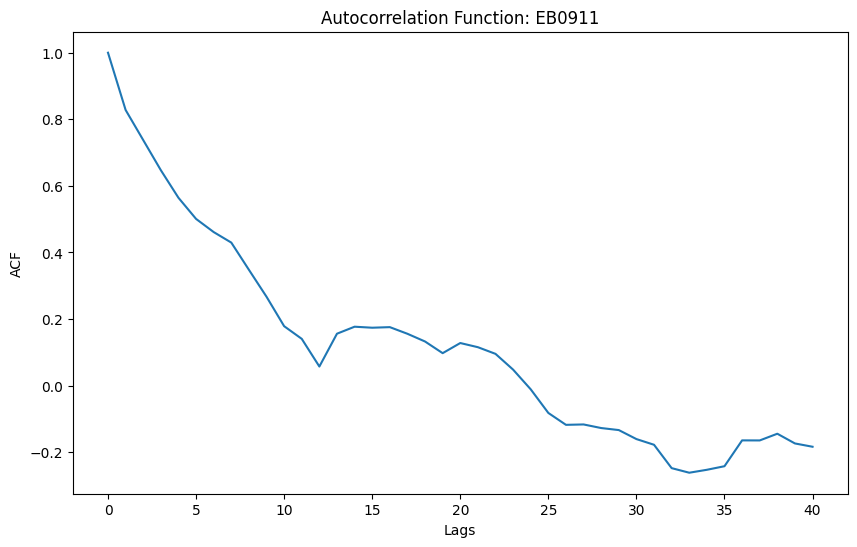

ACF for EB0911:
[ 1.          0.82795974  0.73747018  0.64702747  0.56417684  0.50068949
  0.46116101  0.42951528  0.34779747  0.26681409  0.17838382  0.14033011
  0.05718188  0.15580417  0.17682035  0.17378302  0.17552107  0.15555547
  0.13235032  0.09732715  0.12777169  0.11524953  0.0952388   0.04782654
 -0.01134544 -0.08231418 -0.11802234 -0.11683832 -0.12764337 -0.13373358
 -0.16077598 -0.17790248 -0.24809391 -0.26187838 -0.25305998 -0.24232449
 -0.164704   -0.16487921 -0.14473793 -0.1739263  -0.18385467]


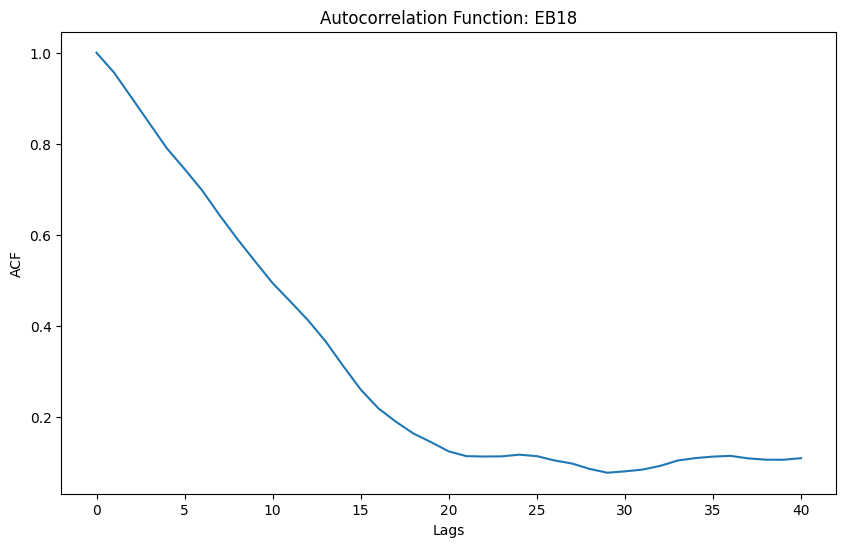

ACF for EB18:
[1.         0.95614974 0.90101467 0.84524085 0.78980823 0.7446737
 0.69754111 0.64261905 0.59081209 0.54193101 0.49405916 0.45386623
 0.41288004 0.36652836 0.3123756  0.26029288 0.21917765 0.18962347
 0.16364509 0.14475983 0.12453076 0.11406537 0.11327088 0.11358856
 0.11729511 0.11403466 0.10471012 0.09782716 0.08603741 0.07767609
 0.08065739 0.08457575 0.09264496 0.10454547 0.1097952  0.11309616
 0.11468871 0.10914058 0.10629991 0.1061821  0.10962747]


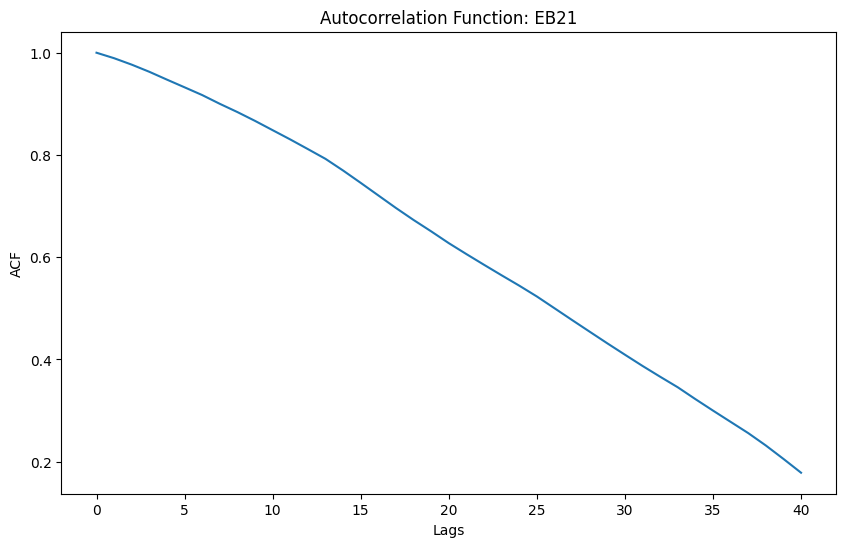

ACF for EB21:
[1.         0.98925337 0.97666652 0.9626799  0.94735522 0.93232852
 0.9171835  0.90004257 0.88390372 0.86665959 0.84849499 0.8303597
 0.81149688 0.79240406 0.76954822 0.74541971 0.72085633 0.69630724
 0.672862   0.6505784  0.6275072  0.60611137 0.58520799 0.56460822
 0.54437787 0.52321585 0.50020943 0.47711358 0.4542855  0.43154867
 0.40931086 0.38732079 0.36621185 0.34558566 0.32244013 0.2999906
 0.27795733 0.25596544 0.23172218 0.20547085 0.17843948]


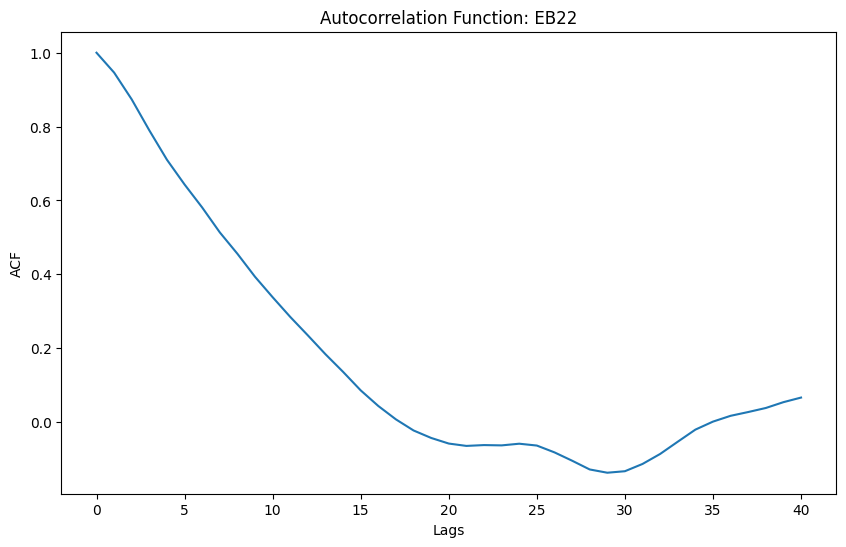

ACF for EB22:
[ 1.          0.94620755  0.87356477  0.7896759   0.71021194  0.64323678
  0.58098885  0.51361367  0.45570018  0.39339979  0.33810411  0.28474608
  0.23474896  0.18369974  0.13596729  0.08588892  0.04358181  0.00733524
 -0.02265492 -0.04291378 -0.05809464 -0.06446238 -0.06221207 -0.06303811
 -0.05851333 -0.06348333 -0.08194662 -0.10445917 -0.12821548 -0.13704862
 -0.13297662 -0.11331426 -0.086228   -0.05309721 -0.02038399  0.0013288
  0.0170195   0.02726072  0.03821471  0.05398481  0.06641005]


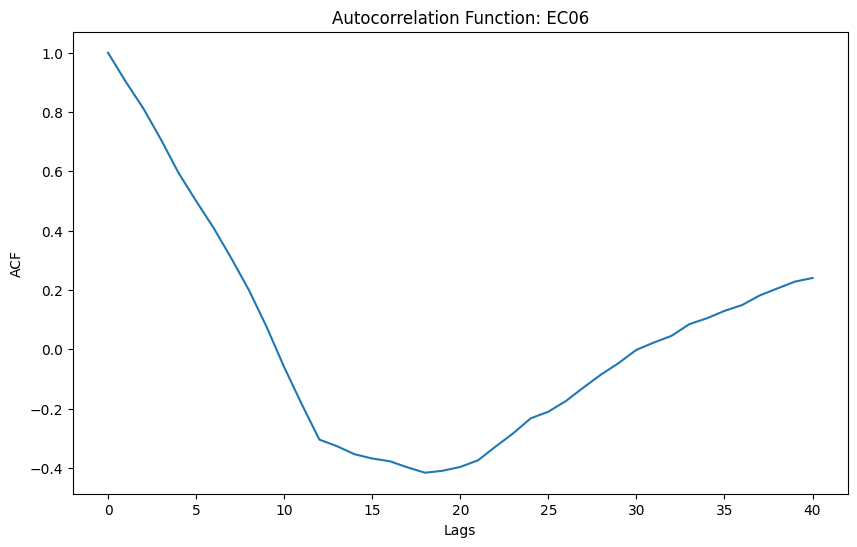

ACF for EC06:
[ 1.          0.90292353  0.81282792  0.70807768  0.59513126  0.50013185
  0.40878429  0.30687375  0.19945564  0.07605287 -0.06013772 -0.18550186
 -0.30481607 -0.32707554 -0.3542297  -0.36851618 -0.37786063 -0.39845098
 -0.41652951 -0.40988246 -0.39701406 -0.37496625 -0.32852675 -0.28386974
 -0.23309614 -0.21070918 -0.17457307 -0.12898738 -0.08517679 -0.04623914
 -0.00209172  0.02269756  0.04534987  0.08440047  0.10432274  0.12928561
  0.14896367  0.18137288  0.20488009  0.2280238   0.2402998 ]


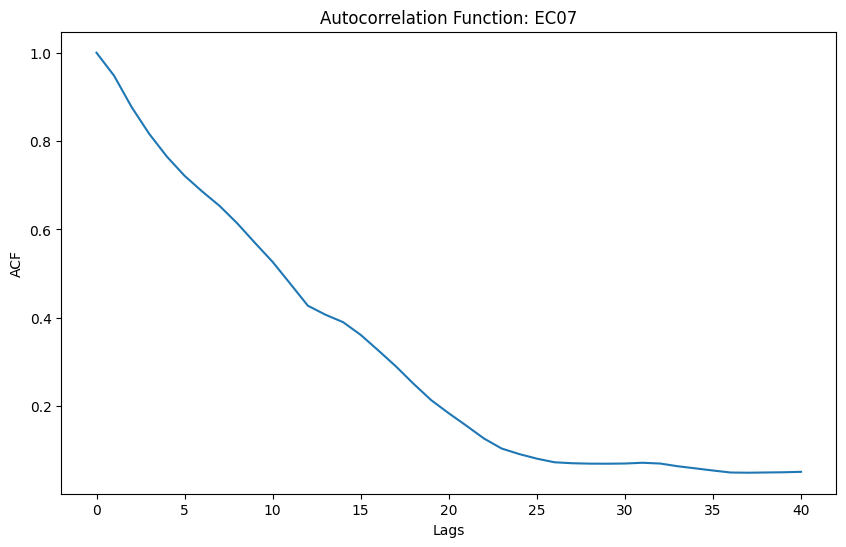

ACF for EC07:
[1.         0.94782517 0.87658532 0.81598795 0.76471314 0.72145443
 0.68603867 0.65292914 0.61351756 0.56953654 0.52659148 0.47728885
 0.42749427 0.40708924 0.3902563  0.36145868 0.32625781 0.29014186
 0.25078827 0.21382687 0.184083   0.15593666 0.1269034  0.10430562
 0.09172718 0.08136999 0.0731611  0.07099999 0.07007507 0.06990596
 0.07034979 0.07204051 0.07031397 0.06416994 0.05939531 0.05449813
 0.05000057 0.04951994 0.05006801 0.05055224 0.0515594 ]


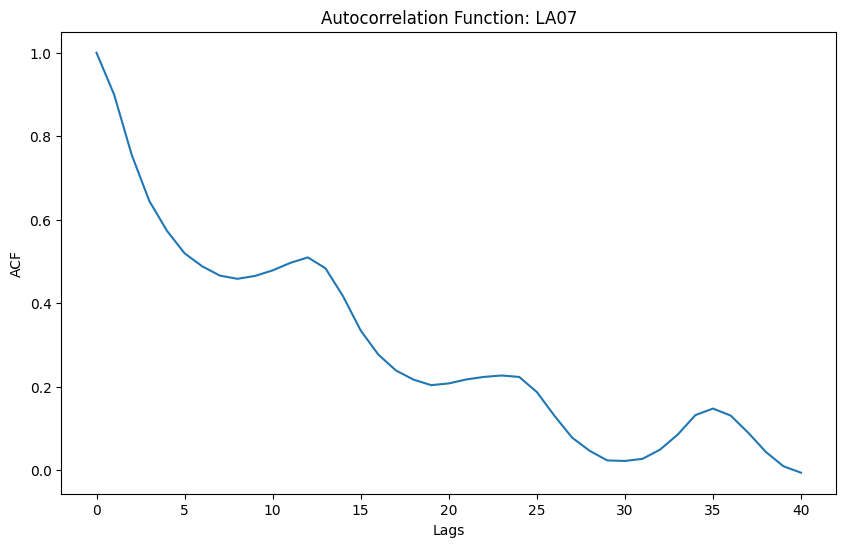

ACF for LA07:
[ 1.          0.89973223  0.75527835  0.6448098   0.57355047  0.51963413
  0.48851781  0.4662396   0.45850889  0.46541812  0.47873057  0.49658458
  0.50986157  0.48369469  0.41658635  0.33465655  0.27703404  0.2390825
  0.2170268   0.20387234  0.20800337  0.21752669  0.22358935  0.2269946
  0.22351567  0.18736564  0.13048208  0.0783053   0.04650198  0.02359508
  0.02231538  0.02740006  0.04956604  0.08557401  0.13205056  0.14780286
  0.13108616  0.09001687  0.04396317  0.00960503 -0.00587138]


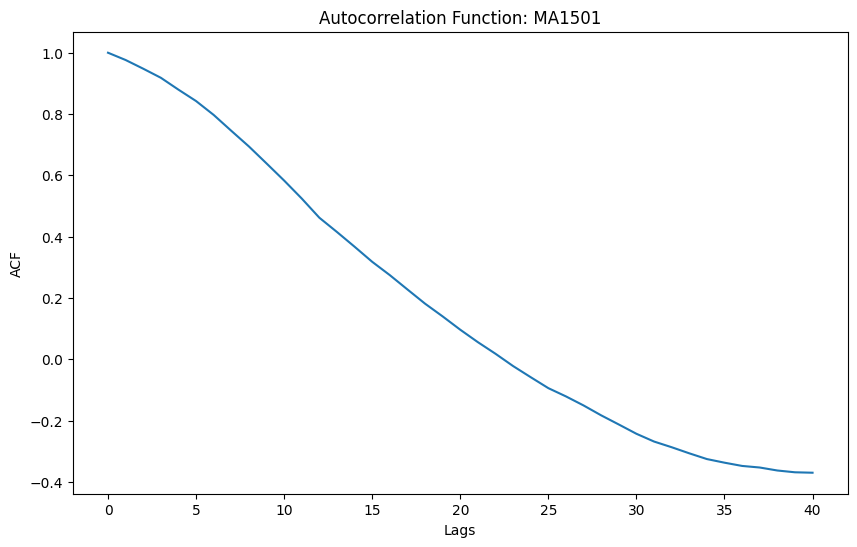

ACF for MA1501:
[ 1.          0.9762248   0.94782477  0.9182496   0.87949041  0.84231278
  0.79702601  0.74524753  0.69419737  0.63885447  0.58295397  0.52428832
  0.46167232  0.41511409  0.36706053  0.31789559  0.27442164  0.22769377
  0.1813687   0.13974464  0.09631868  0.05572142  0.01790766 -0.02223576
 -0.05859066 -0.09425241 -0.12117926 -0.15071697 -0.18300344 -0.21279987
 -0.24309269 -0.26840694 -0.2869622  -0.30682813 -0.32557238 -0.33739602
 -0.34800627 -0.35315346 -0.36288971 -0.36873367 -0.37014996]


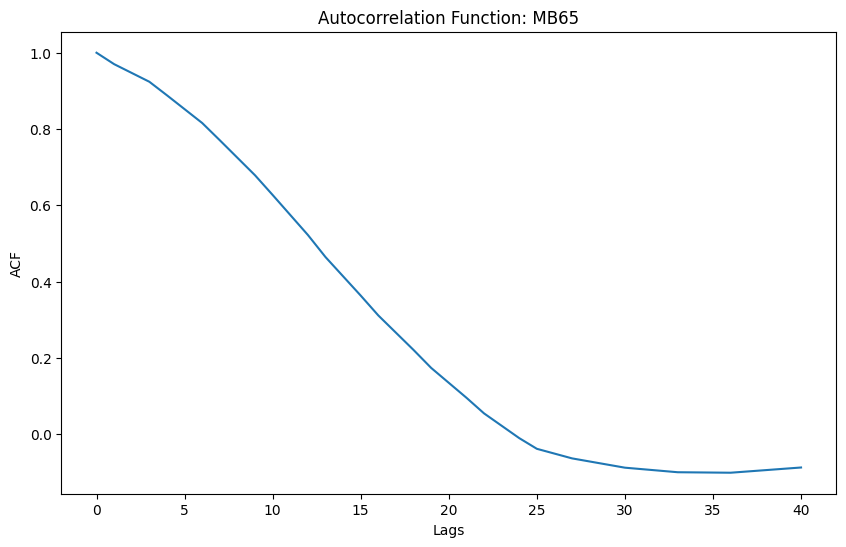

ACF for MB65:
[ 1.          0.97006347  0.9469893   0.92391513  0.88841745  0.85213073
  0.81584401  0.77064264  0.72475086  0.67885908  0.6272796   0.57491109
  0.52254257  0.46461788  0.41412741  0.36363694  0.31156838  0.26636218
  0.22115599  0.17410869  0.13506749  0.09602628  0.05501247  0.02257661
 -0.00985925 -0.03785674 -0.05041391 -0.06297108 -0.07108989 -0.07920869
 -0.08732749 -0.09130381 -0.09528013 -0.09925646 -0.09968208 -0.10010771
 -0.10053334 -0.09711238 -0.09369141 -0.09027045 -0.08684949]


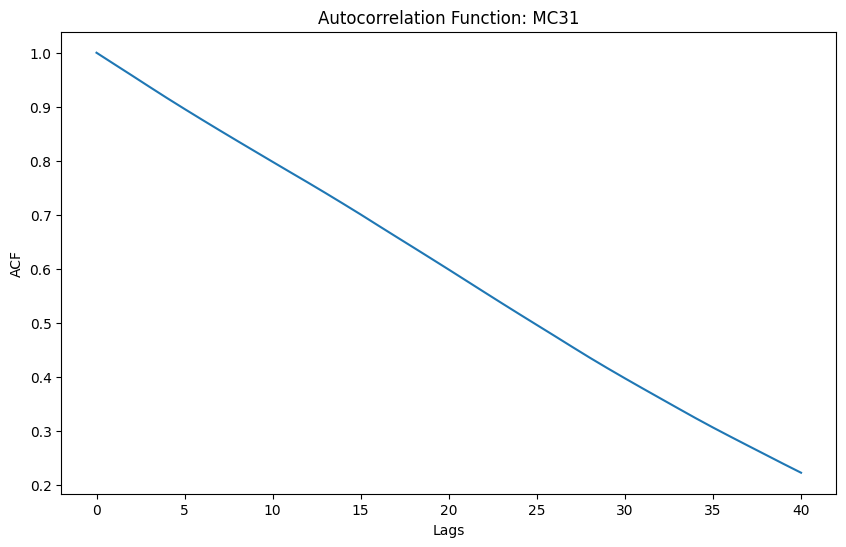

ACF for MC31:
[1.         0.97901985 0.95815039 0.93707364 0.916249   0.89593919
 0.87598601 0.85627043 0.83678578 0.81747967 0.79819951 0.77902167
 0.75995585 0.74055745 0.72081045 0.70080976 0.6802865  0.65992988
 0.63969405 0.61933853 0.59888827 0.5782293  0.55755293 0.53697879
 0.51664857 0.49648415 0.47639004 0.45610061 0.43606514 0.41670208
 0.39781145 0.37925876 0.36092564 0.34261739 0.32443718 0.30682781
 0.28978961 0.27299571 0.25631553 0.23958222 0.22320831]


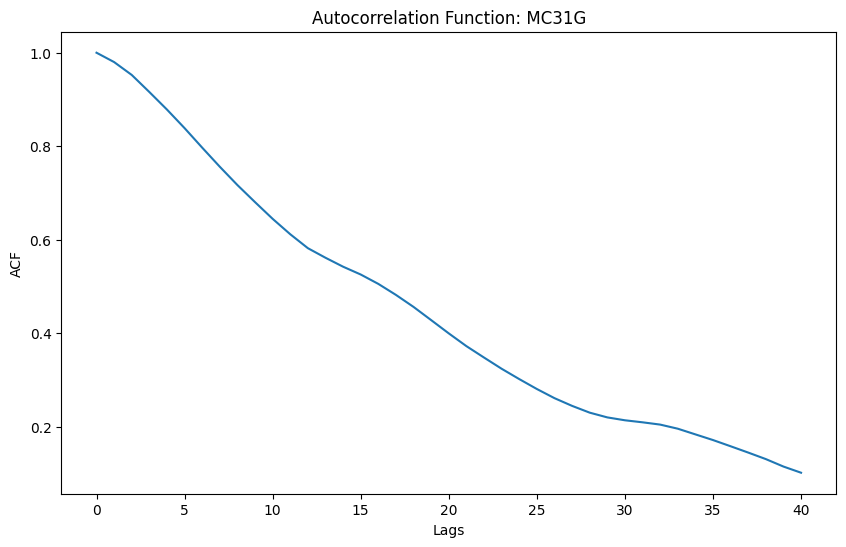

ACF for MC31G:
[1.         0.97999333 0.95248122 0.91595876 0.87842995 0.83871683
 0.79698649 0.75613938 0.71697504 0.68046769 0.64474089 0.61177741
 0.58198213 0.561511   0.54236054 0.52566769 0.50559011 0.48205305
 0.45635323 0.42812847 0.39973627 0.37249547 0.34809469 0.32410696
 0.3020271  0.28082371 0.26125047 0.2447328  0.23023422 0.22009063
 0.21391053 0.20957336 0.2046912  0.19591867 0.18376748 0.17164258
 0.15835961 0.14485802 0.13091744 0.11495373 0.1017599 ]


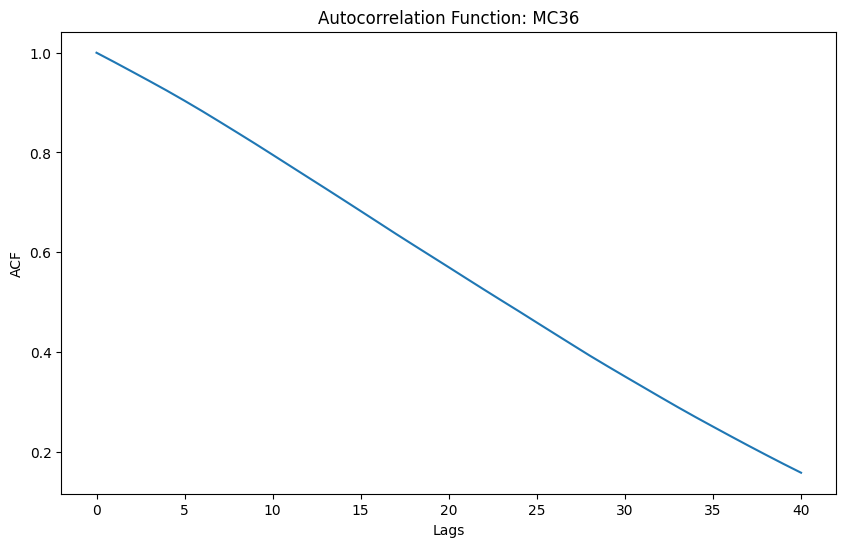

ACF for MC36:
[1.         0.98144904 0.96247412 0.94335873 0.92390736 0.90372237
 0.88292708 0.86143017 0.83969024 0.81777311 0.79538666 0.77287706
 0.75037005 0.72795482 0.70530537 0.68253328 0.65970774 0.63681794
 0.61439761 0.59213559 0.56987195 0.54743826 0.52513332 0.50309201
 0.4812214  0.45896954 0.4368486  0.4147773  0.39281571 0.37170674
 0.35094399 0.33038537 0.30979684 0.28947718 0.26967378 0.25040228
 0.23127014 0.21240008 0.19388042 0.17564336 0.15793736]


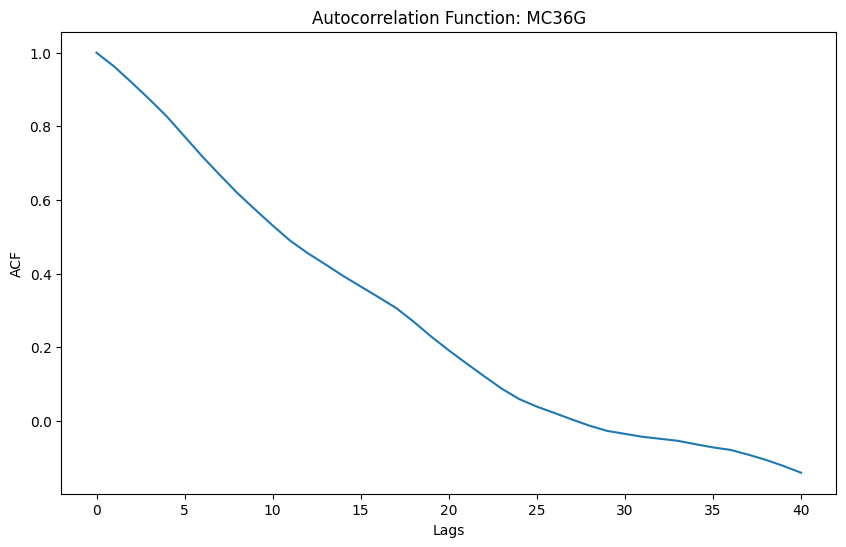

ACF for MC36G:
[ 1.          0.9626352   0.91895415  0.873795    0.82639326  0.77249505
  0.71847608  0.66801033  0.61862925  0.5742716   0.53066542  0.48921107
  0.45516771  0.42494493  0.3936705   0.36495061  0.33620631  0.3068617
  0.26945463  0.22904606  0.19154919  0.15613358  0.12140786  0.08765957
  0.05903296  0.03866634  0.02125387  0.00352901 -0.01342138 -0.02742569
 -0.03538649 -0.04346264 -0.0487565  -0.05426763 -0.06346115 -0.07215115
 -0.07902275 -0.09184302 -0.10605786 -0.12255078 -0.14098401]


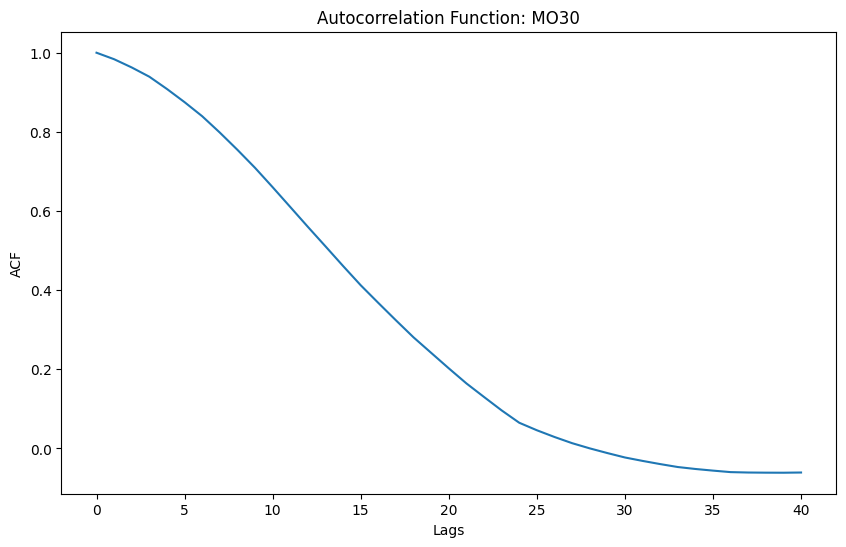

ACF for MO30:
[ 1.00000000e+00  9.83574892e-01  9.62750374e-01  9.39354301e-01
  9.08339826e-01  8.75060060e-01  8.39509638e-01  7.98240441e-01
  7.54657066e-01  7.09137884e-01  6.60221503e-01  6.10193716e-01
  5.59995470e-01  5.10718754e-01  4.61009190e-01  4.12434666e-01
  3.67764681e-01  3.23789491e-01  2.80717302e-01  2.41592525e-01
  2.02491856e-01  1.64414983e-01  1.30111744e-01  9.62152740e-02
  6.49602104e-02  4.60062893e-02  2.90101403e-02  1.33781548e-02
  2.59173412e-04 -1.16204311e-02 -2.28047399e-02 -3.14448551e-02
 -3.94863673e-02 -4.69165764e-02 -5.18599284e-02 -5.60027551e-02
 -5.97929797e-02 -6.08178601e-02 -6.11903296e-02 -6.13269921e-02
 -6.07966697e-02]


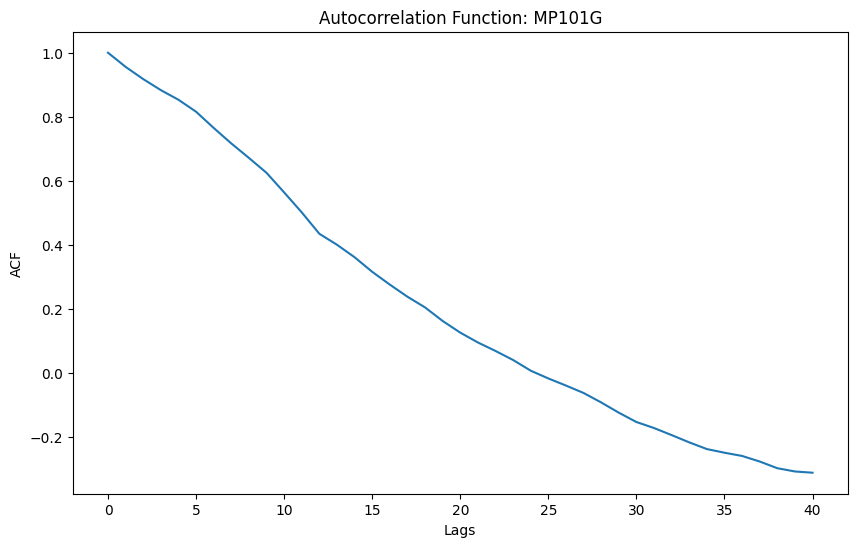

ACF for MP101G:
[ 1.          0.95577383  0.91758905  0.88317044  0.85308878  0.81567941
  0.76505931  0.71661443  0.67137292  0.62483267  0.56364448  0.50127222
  0.43439046  0.40015627  0.36113301  0.31559486  0.27566739  0.2378104
  0.20436813  0.16202226  0.12559858  0.09488668  0.06836059  0.04008964
  0.00670869 -0.01753161 -0.03969721 -0.06286192 -0.09246555 -0.12441522
 -0.15360197 -0.17238976 -0.19443556 -0.21714616 -0.23810473 -0.24948513
 -0.25962561 -0.27699058 -0.29788919 -0.30806518 -0.31198867]


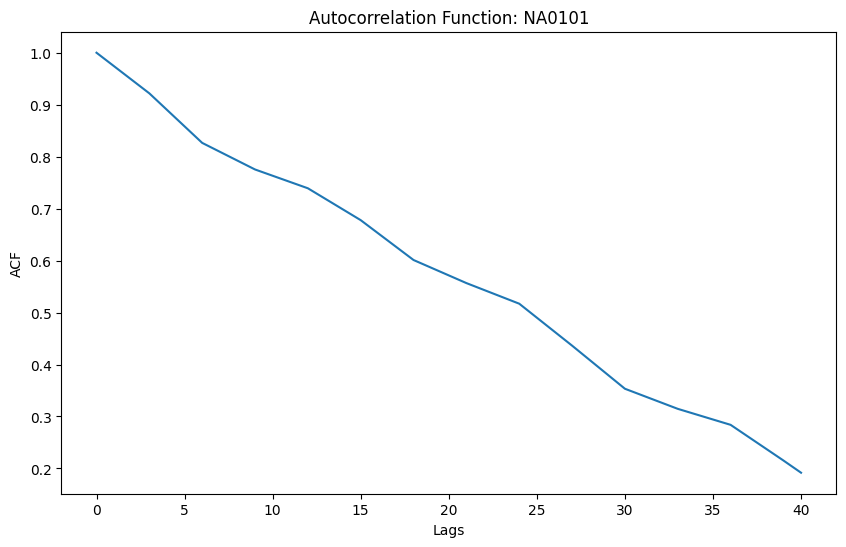

ACF for NA0101:
[1.         0.97393555 0.9478711  0.92180665 0.89003366 0.85826068
 0.8264877  0.8094346  0.79238151 0.77532841 0.76326519 0.75120197
 0.73913875 0.71868929 0.69823984 0.67779038 0.65222358 0.62665678
 0.60108998 0.58629169 0.5714934  0.55669511 0.54347564 0.53025618
 0.51703671 0.49013788 0.46323904 0.43634021 0.4086831  0.381026
 0.3533689  0.34048013 0.32759136 0.3147026  0.30444294 0.29418327
 0.28392361 0.2610381  0.23815259 0.21526707 0.19176849]


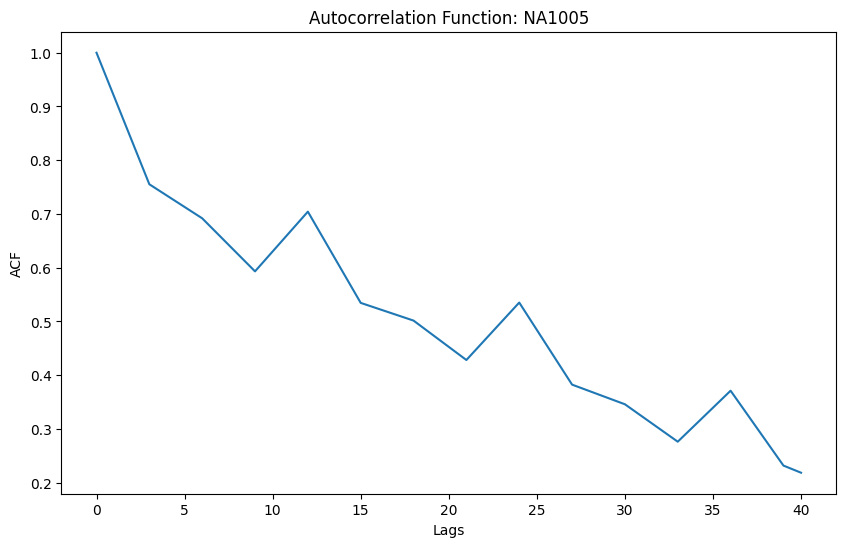

ACF for NA1005:
[1.         0.91841698 0.83683395 0.75525093 0.73414971 0.71304848
 0.69194726 0.65904819 0.62614912 0.59325004 0.63027224 0.66729444
 0.70431663 0.64774295 0.59116927 0.53459559 0.52361163 0.51262767
 0.50164371 0.47720361 0.4527635  0.4283234  0.46395262 0.49958184
 0.53521107 0.48431477 0.43341848 0.38252218 0.37033711 0.35815204
 0.34596697 0.3227604  0.29955383 0.27634726 0.30796874 0.33959022
 0.3712117  0.3247822  0.27835271 0.23192321 0.2186303 ]


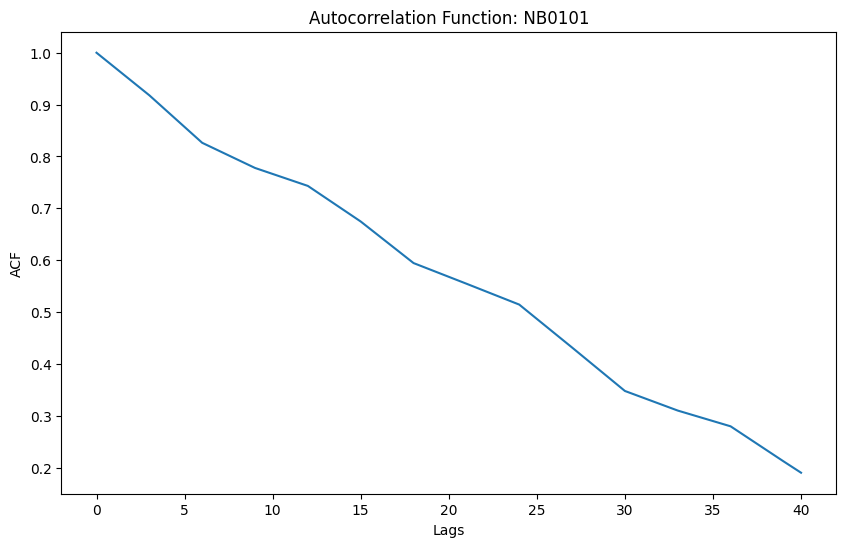

ACF for NB0101:
[1.         0.97262073 0.94524146 0.91786219 0.88732912 0.85679604
 0.82626297 0.81009335 0.79392374 0.77775413 0.76620619 0.75465824
 0.74311029 0.7202323  0.69735431 0.67447632 0.64775398 0.62103164
 0.59430929 0.58105254 0.56779579 0.55453903 0.54110808 0.52767714
 0.51424619 0.48664411 0.45904203 0.43143995 0.40350256 0.37556518
 0.34762779 0.33503234 0.32243689 0.30984145 0.29971576 0.28959007
 0.27946438 0.25697757 0.23449075 0.21200393 0.18996087]


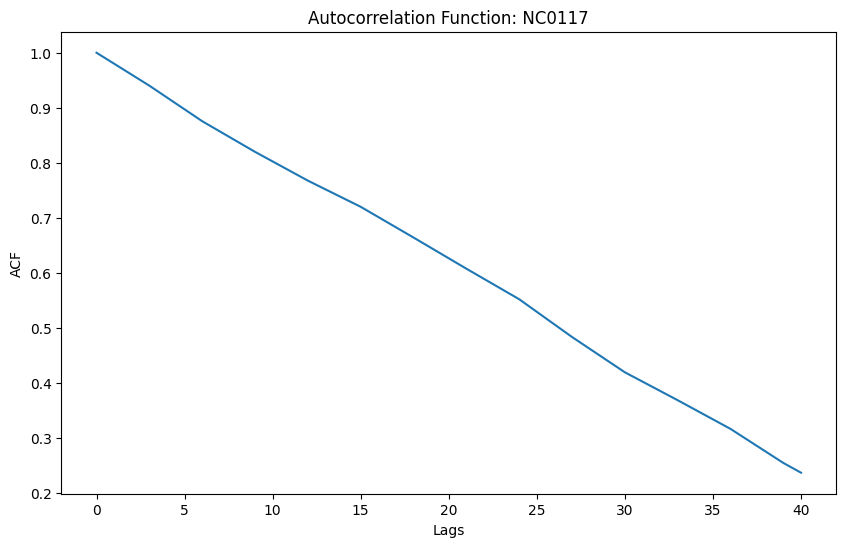

ACF for NC0117:
[1.         0.98004143 0.96008286 0.94012429 0.91859255 0.89706081
 0.87552908 0.85694795 0.83836683 0.81978571 0.80234287 0.78490003
 0.7674572  0.75159434 0.73573149 0.71986864 0.70123244 0.68259625
 0.66396006 0.6450901  0.62622014 0.60735018 0.58882897 0.57030776
 0.55178655 0.52890214 0.50601772 0.4831333  0.46173896 0.44034461
 0.41895026 0.40202842 0.38510659 0.36818475 0.35079676 0.33340877
 0.31602078 0.29538026 0.27473973 0.25409921 0.23643639]


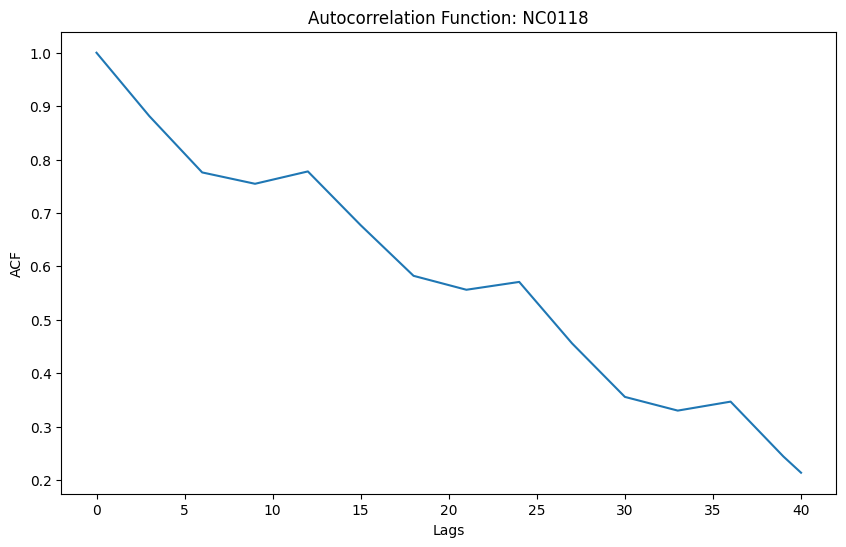

ACF for NC0118:
[1.         0.96043602 0.92087205 0.88130807 0.8461653  0.81102253
 0.77587975 0.76879439 0.76170902 0.75462365 0.76233499 0.77004632
 0.77775766 0.74418409 0.71061052 0.67703696 0.64546061 0.61388427
 0.58230792 0.57360961 0.5649113  0.55621299 0.56110516 0.56599732
 0.57088949 0.53251897 0.49414845 0.45577792 0.42238507 0.38899223
 0.35559938 0.34705292 0.33850646 0.32996    0.33555702 0.34115405
 0.34675107 0.31249622 0.27824137 0.24398652 0.21366037]


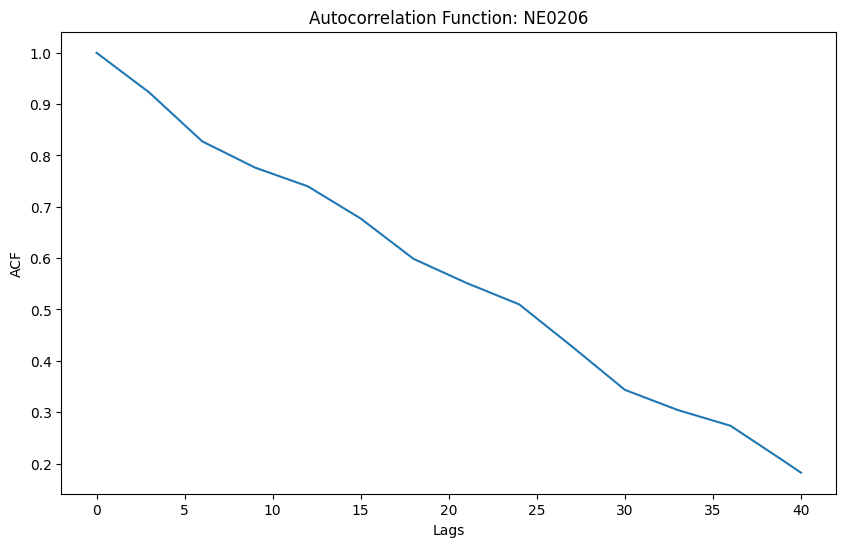

ACF for NE0206:
[1.         0.9741416  0.94828319 0.92242479 0.89076908 0.85911336
 0.82745765 0.81040971 0.79336177 0.77631383 0.76413137 0.75194891
 0.73976645 0.71887621 0.69798597 0.67709573 0.65091419 0.62473265
 0.59855111 0.58293135 0.56731158 0.55169182 0.53776672 0.52384163
 0.50991654 0.48254246 0.45516837 0.42779429 0.39966879 0.37154328
 0.34341778 0.3303571  0.31729642 0.30423574 0.29398139 0.28372704
 0.2734727  0.25075339 0.22803407 0.20531476 0.18210086]


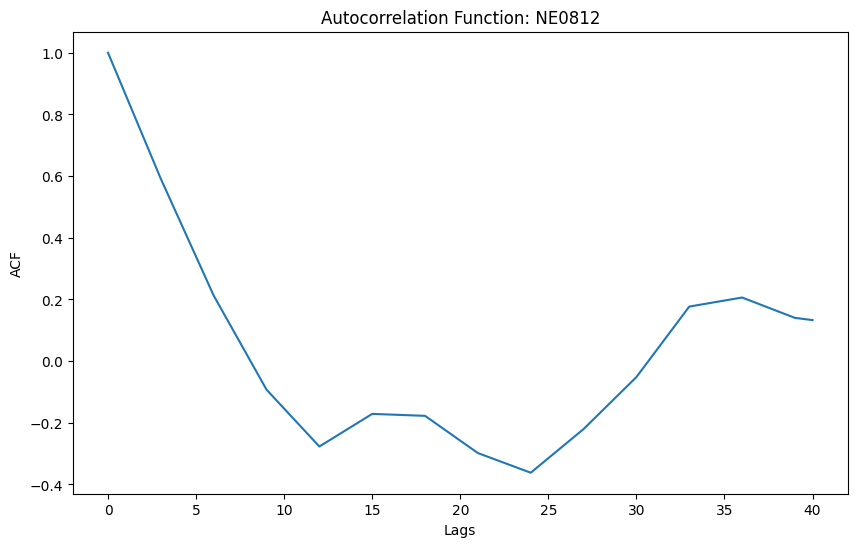

ACF for NE0812:
[ 1.          0.86364258  0.72728515  0.59092773  0.46475182  0.33857592
  0.21240002  0.11068705  0.00897407 -0.0927389  -0.15421281 -0.21568672
 -0.27716062 -0.2418928  -0.20662497 -0.17135714 -0.17346501 -0.17557287
 -0.17768073 -0.2179205  -0.25816028 -0.29840005 -0.3196526  -0.34090515
 -0.36215771 -0.31495973 -0.26776176 -0.22056378 -0.16435657 -0.10814936
 -0.05194214  0.0242582   0.10045855  0.1766589   0.18646836  0.19627783
  0.2060873   0.18407289  0.16205849  0.14004409  0.13283114]


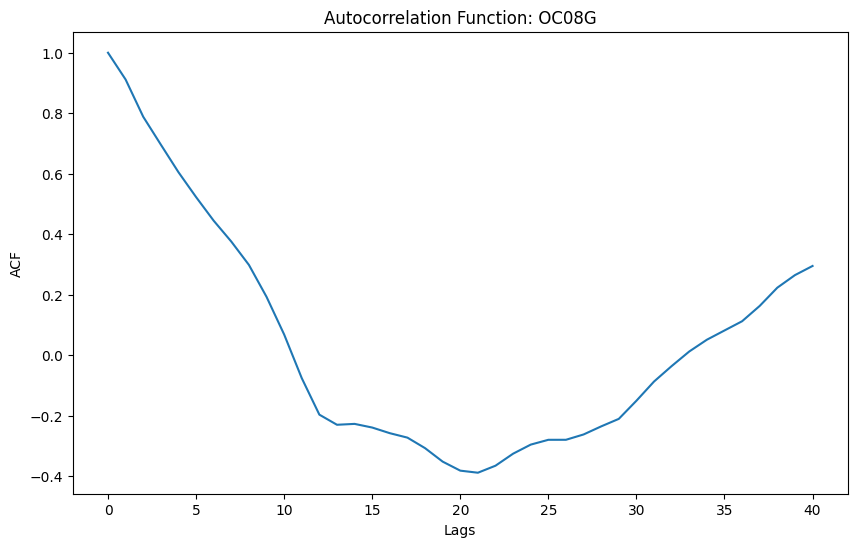

ACF for OC08G:
[ 1.          0.91137995  0.78829579  0.69617264  0.60508863  0.52284544
  0.44474338  0.37577893  0.2986507   0.19310821  0.06866733 -0.07562666
 -0.19635822 -0.22978774 -0.22686651 -0.23893978 -0.25760887 -0.27229882
 -0.30703853 -0.35159329 -0.38142829 -0.38828086 -0.36508244 -0.32532653
 -0.29535996 -0.27947647 -0.27942415 -0.26182352 -0.23510742 -0.2102828
 -0.15036234 -0.0868607  -0.03583549  0.01243104  0.05133154  0.08190267
  0.11241721  0.16310024  0.22337143  0.26487004  0.29513173]


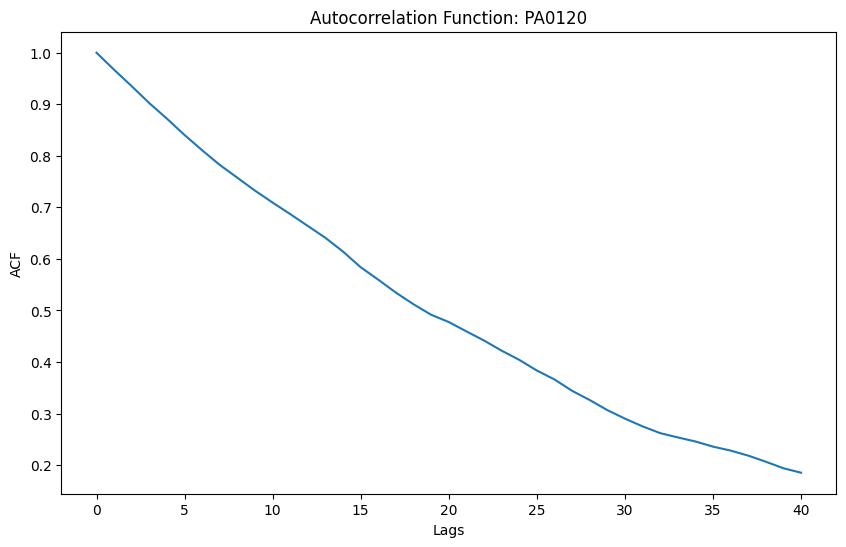

ACF for PA0120:
[1.         0.96697821 0.9350021  0.90213144 0.87202429 0.84032477
 0.81069822 0.78231556 0.75739933 0.73240502 0.70926012 0.68688858
 0.66388851 0.64084512 0.61410643 0.5838249  0.55964985 0.53459433
 0.51198722 0.49166005 0.47759263 0.45942288 0.44174069 0.42206899
 0.40421061 0.38350005 0.36622178 0.34417896 0.32629874 0.30679221
 0.29024948 0.27521083 0.26210559 0.25376015 0.24591469 0.23586955
 0.22823884 0.21843966 0.20659557 0.19394149 0.18526148]


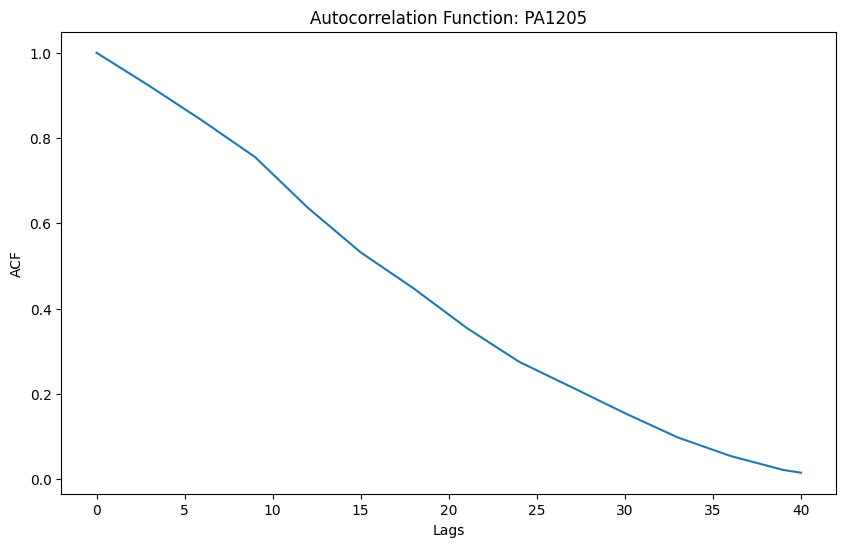

ACF for PA1205:
[1.         0.97404532 0.94809064 0.92213595 0.89506435 0.86799275
 0.84092115 0.81237389 0.78382664 0.75527939 0.7156169  0.6759544
 0.63629191 0.60143899 0.56658608 0.53173316 0.50358924 0.47544531
 0.44730138 0.41653236 0.38576333 0.35499431 0.32829239 0.30159046
 0.27488854 0.2549366  0.23498466 0.21503271 0.19483378 0.17463485
 0.15443592 0.13549061 0.1165453  0.09759999 0.08306565 0.0685313
 0.05399695 0.04308478 0.03217261 0.02126044 0.0148462 ]


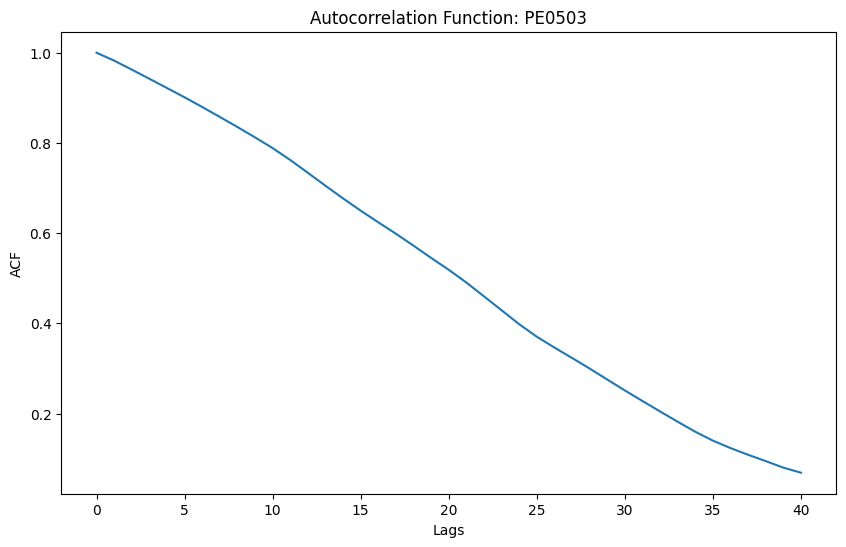

ACF for PE0503:
[1.         0.98246577 0.96258817 0.94232506 0.92170485 0.90118378
 0.87965475 0.85764277 0.83532621 0.81235505 0.78851414 0.76219717
 0.73379997 0.7050766  0.67691309 0.64986297 0.62403504 0.59864452
 0.57222528 0.54507902 0.51872528 0.49049079 0.4598617  0.42898242
 0.3981168  0.37033507 0.34633158 0.32329803 0.29984453 0.27541723
 0.25125618 0.2278249  0.20465364 0.18184132 0.15966841 0.13993128
 0.12349908 0.10861214 0.09458608 0.08013084 0.06893494]


c:\Users\Tony\anaconda3\envs\dl\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25910 (\N{CJK UNIFIED IDEOGRAPH-6536}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Tony\anaconda3\envs\dl\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 30436 (\N{CJK UNIFIED IDEOGRAPH-76E4}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


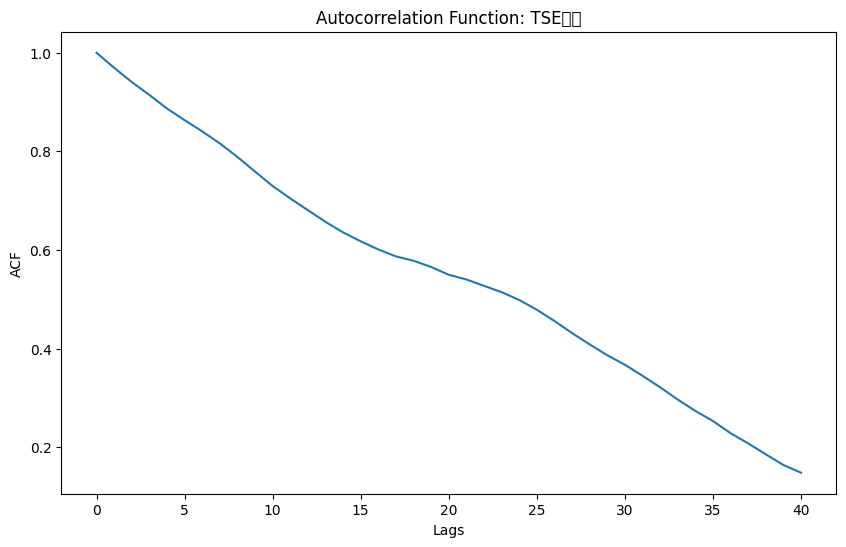

ACF for TSE收盤:
[1.         0.96944894 0.94068255 0.91440191 0.88685871 0.86333191
 0.84053007 0.81626142 0.78872397 0.75907125 0.72970747 0.70462866
 0.68085097 0.6571003  0.63563692 0.61763421 0.60109047 0.58706353
 0.57819933 0.56567015 0.54976394 0.54025298 0.52735563 0.51456818
 0.49865697 0.47890083 0.45609499 0.43158148 0.40857952 0.38663076
 0.36740246 0.34496521 0.32171593 0.2968135  0.2737658  0.25323147
 0.228579   0.20782524 0.18575646 0.16409538 0.14847618]


c:\Users\Tony\anaconda3\envs\dl\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 27700 (\N{CJK UNIFIED IDEOGRAPH-6C34}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Tony\anaconda3\envs\dl\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 27877 (\N{CJK UNIFIED IDEOGRAPH-6CE5}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


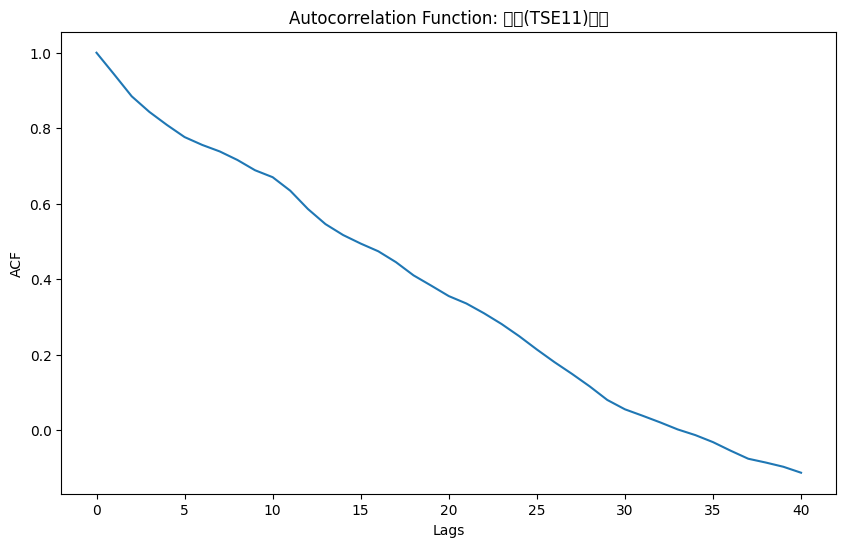

ACF for 水泥(TSE11)收盤:
[ 1.          0.94267167  0.88446844  0.84323698  0.80856948  0.77651929
  0.75572653  0.73836824  0.71582696  0.68862976  0.67021642  0.63439412
  0.58604936  0.54587352  0.51698918  0.49430283  0.47384688  0.44511648
  0.41007969  0.3829666   0.35519058  0.33553923  0.30968624  0.28112496
  0.24888181  0.21368497  0.18019237  0.14890567  0.11594531  0.07995755
  0.05519983  0.03821883  0.02057653  0.00182649 -0.01318761 -0.03174131
 -0.0544277  -0.07575143 -0.08588534 -0.09711105 -0.11283692]


c:\Users\Tony\anaconda3\envs\dl\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24314 (\N{CJK UNIFIED IDEOGRAPH-5EFA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Tony\anaconda3\envs\dl\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26448 (\N{CJK UNIFIED IDEOGRAPH-6750}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Tony\anaconda3\envs\dl\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 29151 (\N{CJK UNIFIED IDEOGRAPH-71DF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Tony\anaconda3\envs\dl\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 36896 (\N{CJK UNIFIED IDEOGRAPH-9020}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


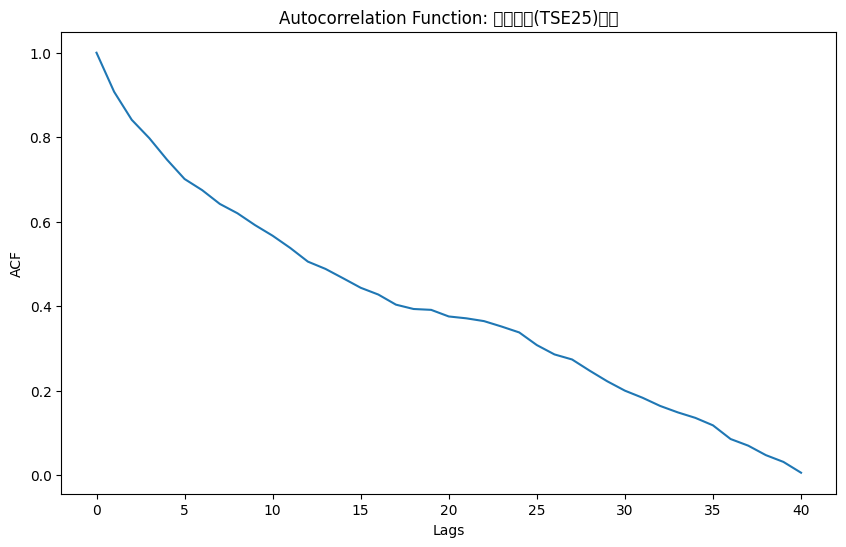

ACF for 建材營造(TSE25)收盤:
[1.         0.90751148 0.84114251 0.79759962 0.74684447 0.70096589
 0.67455023 0.64196474 0.61986603 0.59176856 0.56661362 0.53764141
 0.50532487 0.48806717 0.46592674 0.4433721  0.42733547 0.40341277
 0.39313183 0.39108754 0.37543918 0.37101898 0.36442909 0.35155102
 0.33761896 0.30765217 0.28556032 0.27359498 0.24703145 0.22186638
 0.19972758 0.1829624  0.16357084 0.14834515 0.13529336 0.11759032
 0.08521012 0.0695272  0.04710696 0.03100706 0.00541256]


c:\Users\Tony\anaconda3\envs\dl\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 33322 (\N{CJK UNIFIED IDEOGRAPH-822A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Tony\anaconda3\envs\dl\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 36939 (\N{CJK UNIFIED IDEOGRAPH-904B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Tony\anaconda3\envs\dl\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26989 (\N{CJK UNIFIED IDEOGRAPH-696D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


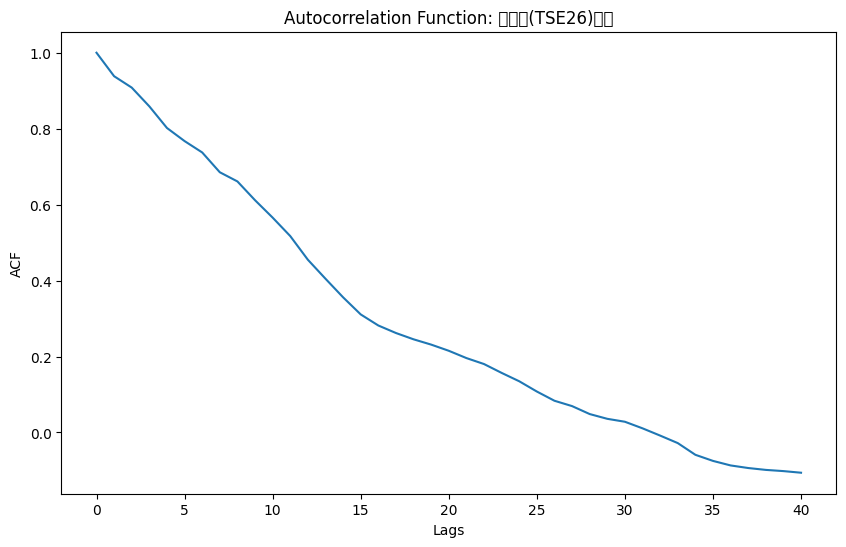

ACF for 航運業(TSE26)收盤:
[ 1.          0.93813287  0.90815233  0.85872872  0.80181771  0.76732537
  0.73739718  0.68525259  0.66109268  0.61161704  0.56579967  0.5171613
  0.45486386  0.40486114  0.3559224   0.3109029   0.28171776  0.26194397
  0.2453484   0.23139398  0.21514112  0.19595786  0.18022837  0.15693448
  0.13486345  0.10783449  0.08355226  0.06945822  0.04852755  0.03598516
  0.02826003  0.01092547 -0.00817995 -0.02791511 -0.05875092 -0.07482626
 -0.08676951 -0.09358723 -0.09851568 -0.1016884  -0.10595311]


c:\Users\Tony\anaconda3\envs\dl\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 37628 (\N{CJK UNIFIED IDEOGRAPH-92FC}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Tony\anaconda3\envs\dl\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 37941 (\N{CJK UNIFIED IDEOGRAPH-9435}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


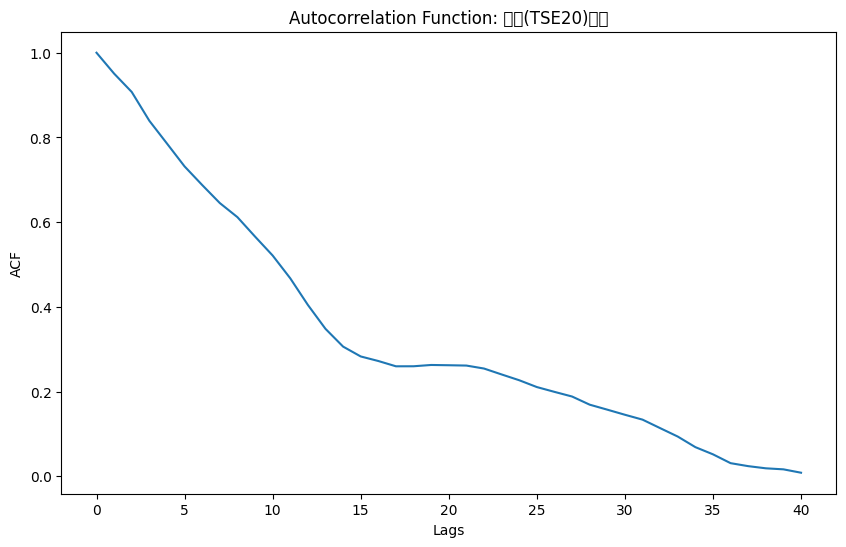

ACF for 鋼鐵(TSE20)收盤:
[1.         0.95067152 0.90735097 0.83934306 0.78562533 0.73158842
 0.6876536  0.64511034 0.61180439 0.56595884 0.52125186 0.46742214
 0.40458972 0.34813963 0.30617681 0.28292262 0.27216765 0.25967499
 0.25976249 0.26281285 0.26217929 0.26141146 0.25439743 0.24045038
 0.22675573 0.21067056 0.19931817 0.18832752 0.16908654 0.15729687
 0.1452745  0.1337659  0.11370354 0.09379514 0.06883195 0.05184336
 0.03098071 0.02395828 0.0188386  0.01640348 0.00842736]


c:\Users\Tony\anaconda3\envs\dl\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20523 (\N{CJK UNIFIED IDEOGRAPH-502B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Tony\anaconda3\envs\dl\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25958 (\N{CJK UNIFIED IDEOGRAPH-6566}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Tony\anaconda3\envs\dl\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 37569 (\N{CJK UNIFIED IDEOGRAPH-92C1}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Tony\anaconda3\envs\dl\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 29694 (\N{CJK UNIFIED IDEOGRAPH-73FE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Tony\anaconda3\envs\dl\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 36008 (\N{CJK UNIFIED IDEOGRAPH-8CA

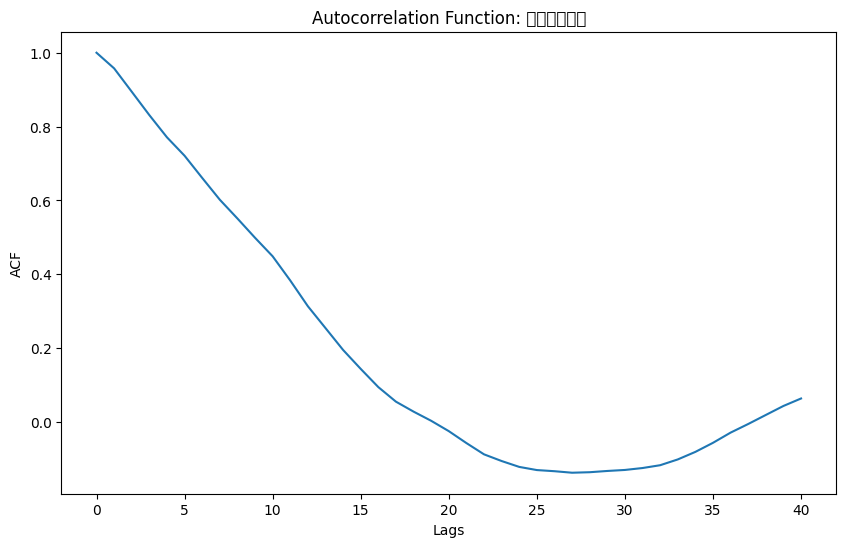

ACF for 倫敦鋁現貨價:
[ 1.          0.95764651  0.89444929  0.83105446  0.77091522  0.72099047
  0.6609631   0.60192591  0.55107303  0.4988382   0.44866301  0.38312479
  0.31342208  0.25428766  0.19501738  0.14375525  0.09440145  0.05495959
  0.02801734  0.00315441 -0.02484977 -0.05714276 -0.08768336 -0.10579547
 -0.12173091 -0.1302806  -0.1333801  -0.13747959 -0.13612462 -0.13271693
 -0.12998135 -0.12476869 -0.11715366 -0.10151049 -0.08105746 -0.056483
 -0.02885585 -0.00552491  0.01895383  0.04332843  0.06357785]


c:\Users\Tony\anaconda3\envs\dl\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 39640 (\N{CJK UNIFIED IDEOGRAPH-9AD8}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Tony\anaconda3\envs\dl\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 32026 (\N{CJK UNIFIED IDEOGRAPH-7D1A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Tony\anaconda3\envs\dl\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 37509 (\N{CJK UNIFIED IDEOGRAPH-9285}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Tony\anaconda3\envs\dl\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26997 (\N{CJK UNIFIED IDEOGRAPH-6975}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


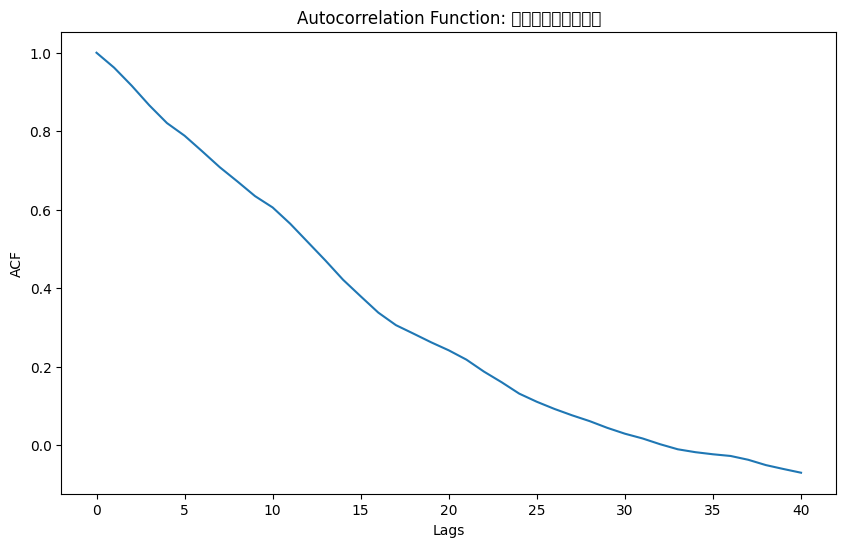

ACF for 倫敦高級銅極現貨價:
[ 1.          0.96195408  0.91593879  0.86597525  0.82085073  0.78865672
  0.74895152  0.70832314  0.67213506  0.63480345  0.6059467   0.56437411
  0.51753546  0.47069752  0.4217208   0.37957888  0.33808941  0.30618477
  0.28449694  0.26243888  0.24203077  0.21836023  0.18778581  0.16081584
  0.13175975  0.1110189   0.09279505  0.07655976  0.06172365  0.04461949
  0.02970142  0.01764771  0.00289531 -0.00995981 -0.01733941 -0.02268292
 -0.02698956 -0.03665717 -0.05019411 -0.06016843 -0.06965378]


c:\Users\Tony\anaconda3\envs\dl\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24052 (\N{CJK UNIFIED IDEOGRAPH-5DF4}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Tony\anaconda3\envs\dl\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25343 (\N{CJK UNIFIED IDEOGRAPH-62FF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Tony\anaconda3\envs\dl\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 39340 (\N{CJK UNIFIED IDEOGRAPH-99AC}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Tony\anaconda3\envs\dl\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 22411 (\N{CJK UNIFIED IDEOGRAPH-578B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Tony\anaconda3\envs\dl\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 27331 (\N{CJK UNIFIED IDEOGRAPH-6AC

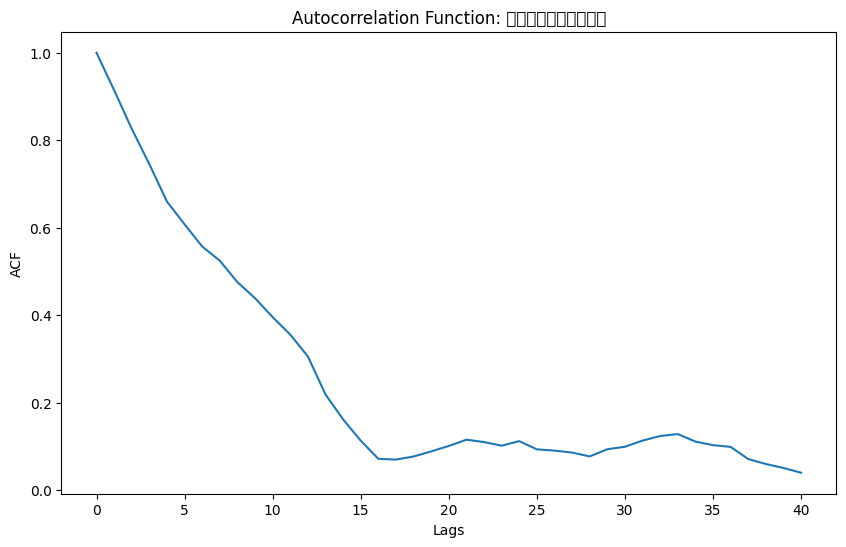

ACF for 巴拿馬型貨櫃運費指數:
[1.         0.91436601 0.82603022 0.74522576 0.65961435 0.6077333
 0.5569271  0.52445333 0.47545554 0.43867893 0.39546749 0.35551424
 0.30558684 0.21871787 0.16155505 0.11299237 0.07143664 0.06970278
 0.07665607 0.08839766 0.10080756 0.11512678 0.10976227 0.10148221
 0.11177039 0.09311367 0.09019337 0.08568796 0.07696149 0.09330548
 0.0990006  0.11311257 0.12351706 0.1280694  0.11086424 0.10263568
 0.09873381 0.07095242 0.05956821 0.05048896 0.03963249]


c:\Users\Tony\anaconda3\envs\dl\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26460 (\N{CJK UNIFIED IDEOGRAPH-675C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Tony\anaconda3\envs\dl\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25308 (\N{CJK UNIFIED IDEOGRAPH-62DC}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Tony\anaconda3\envs\dl\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 36629 (\N{CJK UNIFIED IDEOGRAPH-8F15}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Tony\anaconda3\envs\dl\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21407 (\N{CJK UNIFIED IDEOGRAPH-539F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Tony\anaconda3\envs\dl\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 27833 (\N{CJK UNIFIED IDEOGRAPH-6CB

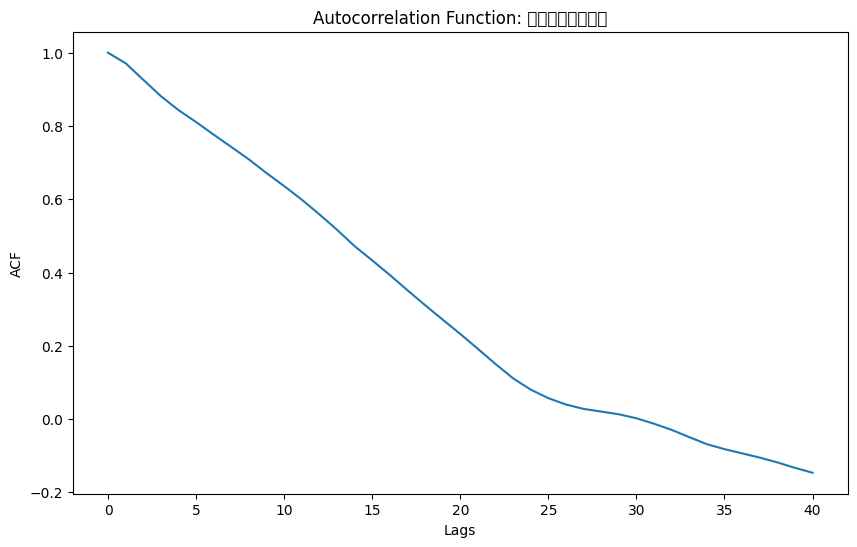

ACF for 杜拜輕原油現貨價:
[ 1.          0.97133443  0.92621555  0.88157298  0.84345964  0.8107924
  0.77637705  0.74276249  0.70878875  0.6714355   0.63603613  0.5989882
  0.55889539  0.51683093  0.47205037  0.43315023  0.39328991  0.35171423
  0.31100908  0.27140957  0.232357    0.19160709  0.15033121  0.11117204
  0.08036538  0.05708461  0.03968582  0.02775604  0.02047216  0.01313579
  0.00216719 -0.01272515 -0.02946907 -0.04933741 -0.06855383 -0.08206417
 -0.09365366 -0.10518687 -0.11831856 -0.13316212 -0.1464622 ]


c:\Users\Tony\anaconda3\envs\dl\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21271 (\N{CJK UNIFIED IDEOGRAPH-5317}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Tony\anaconda3\envs\dl\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21312 (\N{CJK UNIFIED IDEOGRAPH-5340}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Tony\anaconda3\envs\dl\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21488 (\N{CJK UNIFIED IDEOGRAPH-53F0}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


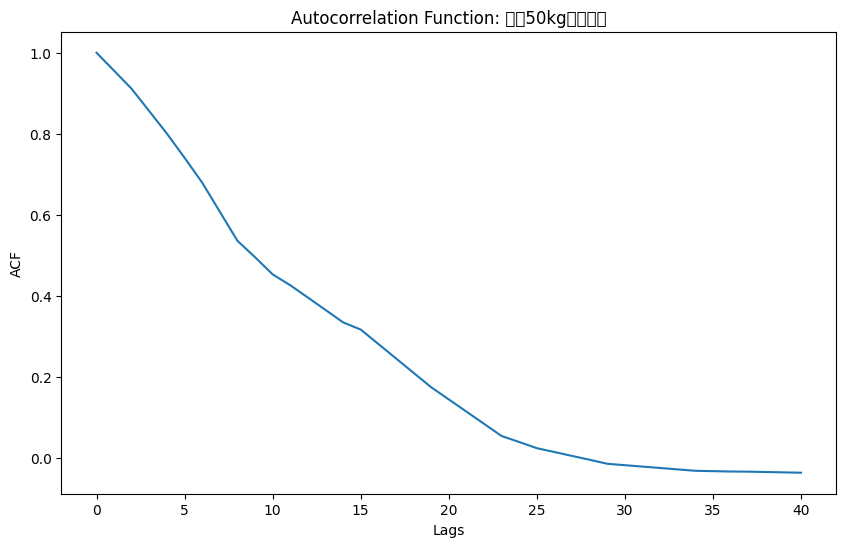

ACF for 水泥50kg北區台泥:
[ 1.          0.95555848  0.91074953  0.85557998  0.80041043  0.74096125
  0.67967796  0.6080013   0.53632465  0.49582807  0.45349738  0.42668509
  0.39631168  0.36582911  0.33508724  0.31742988  0.28188661  0.24634335
  0.21072148  0.17517822  0.14513732  0.11509643  0.08505553  0.05483122
  0.04008336  0.0248889   0.0154294   0.00578648 -0.00367302 -0.01357796
 -0.01703455 -0.02049115 -0.02394775 -0.02740435 -0.03086095 -0.03174487
 -0.0326288  -0.03296249 -0.03384641 -0.03473034 -0.03561426]


c:\Users\Tony\anaconda3\envs\dl\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 28961 (\N{CJK UNIFIED IDEOGRAPH-7121}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Tony\anaconda3\envs\dl\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 37467 (\N{CJK UNIFIED IDEOGRAPH-925B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Tony\anaconda3\envs\dl\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 27773 (\N{CJK UNIFIED IDEOGRAPH-6C7D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


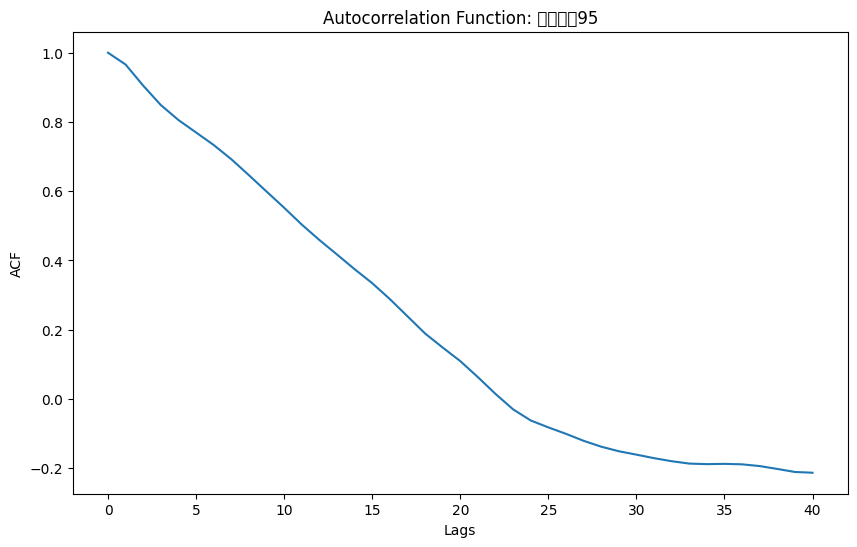

ACF for 無鉛汽油95:
[ 1.          0.96584914  0.90478216  0.84880585  0.80561073  0.76962184
  0.73346389  0.69245014  0.64625855  0.5991039   0.55222453  0.50364817
  0.4591418   0.41719341  0.37479005  0.33438542  0.288496    0.23884271
  0.18911334  0.14848798  0.1092858   0.06297568  0.01450297 -0.03011163
 -0.0621868  -0.08213726 -0.10075306 -0.12092157 -0.13788332 -0.15107496
 -0.16088541 -0.17103416 -0.17986643 -0.18673469 -0.18831437 -0.1874964
 -0.18889424 -0.19390828 -0.20219487 -0.21096462 -0.2131117 ]


c:\Users\Tony\anaconda3\envs\dl\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 31481 (\N{CJK UNIFIED IDEOGRAPH-7AF9}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Tony\anaconda3\envs\dl\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 31680 (\N{CJK UNIFIED IDEOGRAPH-7BC0}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Tony\anaconda3\envs\dl\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 31563 (\N{CJK UNIFIED IDEOGRAPH-7B4B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Tony\anaconda3\envs\dl\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21335 (\N{CJK UNIFIED IDEOGRAPH-5357}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


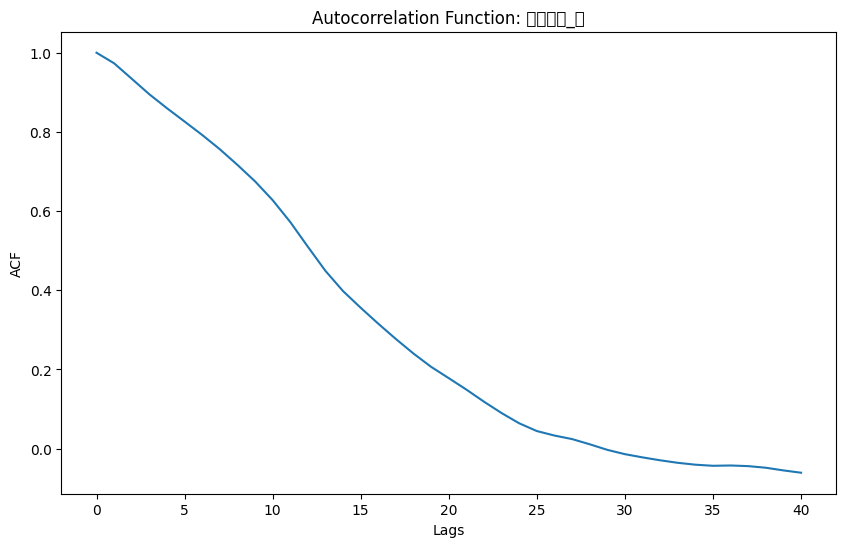

ACF for 竹節鋼筋_南:
[ 1.          0.97329144  0.93422034  0.89504444  0.85981425  0.82621731
  0.79229915  0.7562806   0.71676064  0.67518564  0.62769169  0.57245347
  0.50996021  0.44893322  0.39785468  0.35581475  0.31551922  0.27684152
  0.24011574  0.20657481  0.17806872  0.14918035  0.11863245  0.08987516
  0.06404107  0.04449246  0.03316234  0.02423166  0.01113155 -0.00297018
 -0.01387847 -0.02199717 -0.0293446  -0.03569754 -0.04045657 -0.04323398
 -0.04245578 -0.04407987 -0.04813546 -0.05490079 -0.06073545]


c:\Users\Tony\anaconda3\envs\dl\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 38928 (\N{CJK UNIFIED IDEOGRAPH-9810}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Tony\anaconda3\envs\dl\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25292 (\N{CJK UNIFIED IDEOGRAPH-62CC}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Tony\anaconda3\envs\dl\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 28151 (\N{CJK UNIFIED IDEOGRAPH-6DF7}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Tony\anaconda3\envs\dl\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20957 (\N{CJK UNIFIED IDEOGRAPH-51DD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Tony\anaconda3\envs\dl\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 22303 (\N{CJK UNIFIED IDEOGRAPH-571

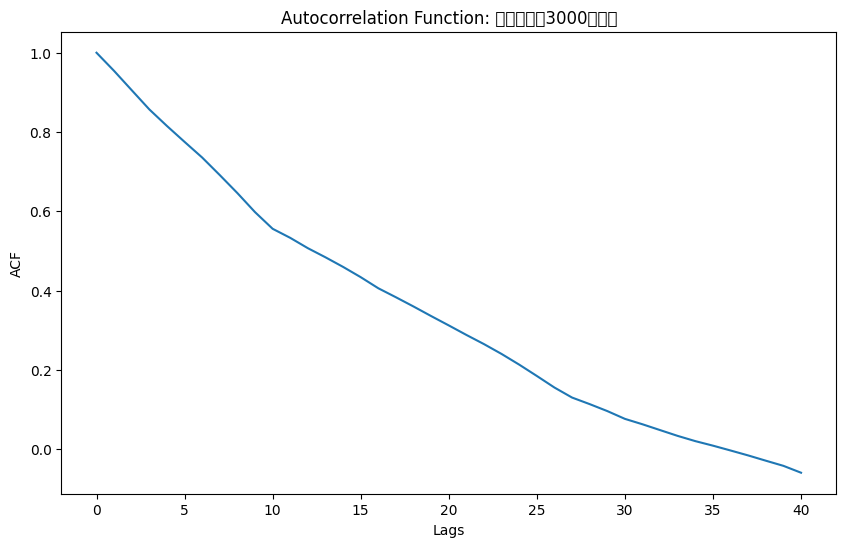

ACF for 預拌混凝土3000磅台北:
[ 1.          0.9540945   0.9054581   0.85701817  0.81526185  0.77519155
  0.73570166  0.69142351  0.6460076   0.59804985  0.55605903  0.53316796
  0.50712276  0.48415366  0.45993741  0.43408278  0.40606531  0.38339492
  0.36007164  0.33594811  0.31240777  0.28842342  0.26524407  0.24038284
  0.21348093  0.18493125  0.15575739  0.13049218  0.11395468  0.09643587
  0.07677832  0.06310734  0.04840593  0.03378205  0.0206177   0.00921508
 -0.00298845 -0.0154464  -0.02868542 -0.04168237 -0.05900966]


In [7]:
import pandas as pd
import numpy as np
import statsmodels.tsa.stattools as smt
import matplotlib.pyplot as plt

# 假設第一列是日期，將其設為索引
df.set_index(df.columns[0], inplace=True)

# 確保只處理數值型列
numerical_columns = df.select_dtypes(include=[np.number]).columns

# 初始化一個字典來存儲每一列的 CCF 結果
acf_results = {}

# 使用第一個數值列作為基準序列
base_series = df[numerical_columns[0]]

# 使用每個數值列作為自相關檢定的對象
for column in numerical_columns:
    series = df[column]
    acf_output = smt.acf(series, nlags=40, fft=True)  # 設定檢定的滯後數

    acf_results[column] = acf_output

    # 畫圖顯示自相關函數
    plt.figure(figsize=(10, 6))
    plt.plot(acf_output)
    plt.title(f'Autocorrelation Function: {column}')
    plt.xlabel('Lags')
    plt.ylabel('ACF')
    plt.show()

    # 輸出自相關函數結果
    print(f'ACF for {column}:')
    print(acf_output)

{'acfk': [array([ 1.00000000e+00, -1.42994842e-01, -1.57543119e-01,  8.85275454e-02,
       -1.17537152e-01,  1.04054408e-01,  7.74782397e-03, -3.00954884e-03,
       -2.03401192e-01,  4.11979060e-02, -1.43123972e-04, -2.35046030e-01,
        3.76862221e-02,  1.15659930e-01,  3.34480661e-02, -1.18143929e-01,
        4.86823067e-02, -1.26313885e-01,  4.88933280e-02,  2.86792209e-01,
       -8.31475784e-02, -1.00913393e-02,  3.31227380e-02, -9.53753976e-02,
       -4.51217157e-02,  5.00521939e-02, -1.02074435e-02, -4.68034397e-02,
       -3.20774980e-02,  3.68697650e-04, -5.00336086e-03,  2.51571912e-02,
        2.91770763e-03,  7.65232148e-03]), array([ 1.00000000e+00, -3.78295801e-02,  1.96633096e-01,  4.47895988e-02,
        1.62997868e-01, -3.85684156e-02,  3.15539486e-02,  1.59599787e-01,
        5.04802206e-02, -1.59438735e-01,  9.48592614e-02,  9.42511163e-02,
       -2.32885143e-01, -9.26151501e-02, -2.44464655e-01, -7.88440607e-02,
       -1.16592091e-01, -3.06259460e-02,  6.271

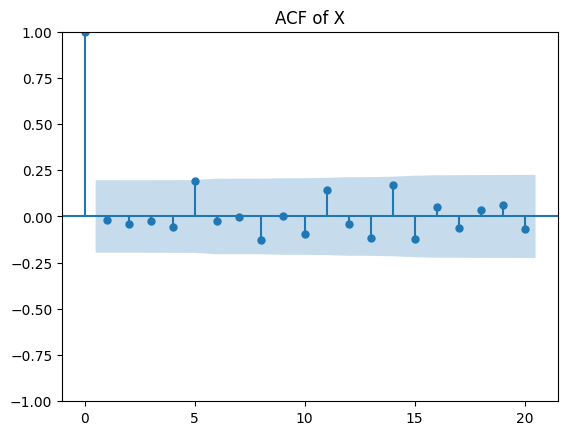

In [ ]:
# pip install statsmodels
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
import matplotlib.pyplot as plt

# 生成示例數據
np.random.seed(42)
n = 100
X = np.random.randn(n)

def acf_test(residuals, ids, type='correlation', ci=0.95):
    # 檢查 'type' 參數
    if type not in ['correlation', 'covariance', 'partial']:
        raise ValueError("type must be 'correlation', 'covariance', or 'partial'")

    # 獲取唯一個體標識
    unique_ids = np.unique(ids)

    # 計算每個個體的 ACF
    acfk = [acf(residuals[ids == id], nlags=40, fft=False) for id in unique_ids]

    # 計算置信區間的閾值
    threshold = [np.sqrt(2) * np.sqrt(1 / len(residuals[ids == id])) for id in unique_ids]

    # 找出自相關不顯著的滯後期
    lag = [np.argmax(acf_vals < thresh) if np.any(acf_vals < thresh) else len(acf_vals)
           for acf_vals, thresh in zip(acfk, threshold)]

    # 返回結果字典
    return {'acfk': acfk, 'threshold': threshold, 'lag': lag}

# 示例數據
np.random.seed(42)
n = 100
residuals = np.random.randn(n)
ids = np.random.choice(['A', 'B', 'C'], n)

# 調用函數
result = acf_test(residuals, ids)
print(result)

# 繪製 ACF
plot_acf(X, lags=20)
plt.title("ACF of X")
plt.show()

In [ ]:
'''
!pip install statsmodels

import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# 生成示例數據
np.random.seed(42)
n = 100
X = np.random.randn(n)
Y = np.random.randn(n)

# 計算 ACF
acf_values = sm.tsa.acf(X, nlags=20)
acf_lags = np.arange(len(acf_values))

# 計算 CCF
ccf_values = sm.tsa.ccf(X, Y, adjusted=False)[:21]
ccf_lags = np.arange(len(ccf_values))

# 創建 ACF 表格
acf_table = pd.DataFrame({'Lag': acf_lags, 'ACF': acf_values})

# 創建 CCF 表格
ccf_table = pd.DataFrame({'Lag': ccf_lags, 'CCF': ccf_values})

import ace_tools as tools; tools.display_dataframe_to_user(name="ACF Table", dataframe=acf_table)
tools.display_dataframe_to_user(name="CCF Table", dataframe=ccf_table)

# 繪製 ACF
plot_acf(X, lags=20)
plt.title("ACF of X")
plt.show()

# 手動繪製 CCF
plt.stem(ccf_lags, ccf_values, use_line_collection=True)
plt.title("CCF between X and Y")
plt.xlabel("Lag")
plt.ylabel("CCF")
plt.show()

'''

          MB65      MC31     MC31G      MC36     MC36G      MO30    MP101G  \
Lags                                                                         
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     0.970063  0.979020  0.979993  0.981449  0.962635  0.983575  0.955774   
2     0.946989  0.958150  0.952481  0.962474  0.918954  0.962750  0.917589   
3     0.923915  0.937074  0.915959  0.943359  0.873795  0.939354  0.883170   
4     0.888417  0.916249  0.878430  0.923907  0.826393  0.908340  0.853089   
5     0.852131  0.895939  0.838717  0.903722  0.772495  0.875060  0.815679   
6     0.815844  0.875986  0.796986  0.882927  0.718476  0.839510  0.765059   
7     0.770643  0.856270  0.756139  0.861430  0.668010  0.798240  0.716614   
8     0.724751  0.836786  0.716975  0.839690  0.618629  0.754657  0.671373   
9     0.678859  0.817480  0.680468  0.817773  0.574272  0.709138  0.624833   
10    0.627280  0.798200  0.644741  0.795387  0.530665  0.660222

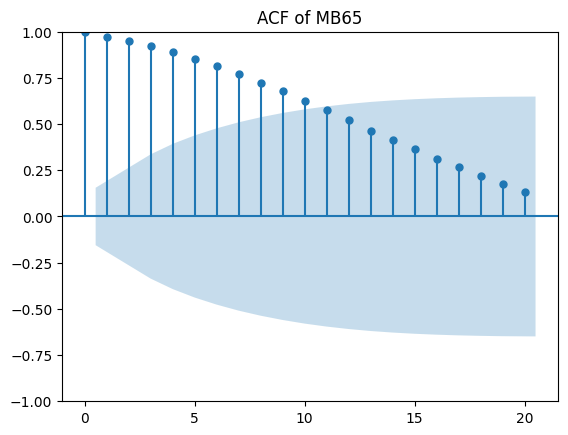

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.tsa.stattools as smt
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf as sm_plot_acf

def calculate_acf(df, nlags=40):
    # 假設第一列是日期，將其設為索引
    df.set_index(df.columns[0], inplace=True)

    # 確保只處理數值型列
    numerical_columns = df.select_dtypes(include=[np.number]).columns

    # 初始化一個字典來存儲每一列的 ACF 結果
    acf_results = {}
    n_observations = {}

    # 使用每個數值列作為自相關檢定的對象
    for column in numerical_columns:
        series = df[column]
        acf_output = smt.acf(series, nlags=nlags, fft=True)  # 設定檢定的滯後數
        acf_results[column] = acf_output
        n_observations[column] = len(series)  # 計算觀測值的個數

    # 將 ACF 結果轉換成 DataFrame
    acf_df = pd.DataFrame(acf_results)
    acf_df.index.name = 'Lags'

    # 顯示 ACF 結果的表格
    print(acf_df)

    return acf_df, n_observations

def plot_acf_series(df, column, lags=20):
    # 假設第一列是日期，將其設為索引
    df.set_index(df.columns[0], inplace=True)

    # 繪製指定列的 ACF
    series = df[column]
    sm_plot_acf(series, lags=lags)
    plt.title(f"ACF of {column}")
    plt.show()

# 使用函數計算 ACF 結果
acf_df, n_observations = calculate_acf(df.copy())

# 計算並顯示信賴區間
for column, n in n_observations.items():
    confidence_interval = 1.96 / np.sqrt(n)
    print(f'Confidence interval for {column}: ±{confidence_interval:.3f}')

# 繪製 ACF
plot_acf_series(df.copy(), column=df.columns[1], lags=20)  # 指定要繪製的列和滯後數

          LA07    MA1501      MB65      MC31     MC31G      MC36     MC36G  \
Lags                                                                         
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     0.899732  0.976225  0.970063  0.979020  0.979993  0.981449  0.962635   
2     0.755278  0.947825  0.946989  0.958150  0.952481  0.962474  0.918954   
3     0.644810  0.918250  0.923915  0.937074  0.915959  0.943359  0.873795   
4     0.573550  0.879490  0.888417  0.916249  0.878430  0.923907  0.826393   
5     0.519634  0.842313  0.852131  0.895939  0.838717  0.903722  0.772495   
6     0.488518  0.797026  0.815844  0.875986  0.796986  0.882927  0.718476   
7     0.466240  0.745248  0.770643  0.856270  0.756139  0.861430  0.668010   
8     0.458509  0.694197  0.724751  0.836786  0.716975  0.839690  0.618629   
9     0.465418  0.638854  0.678859  0.817480  0.680468  0.817773  0.574272   
10    0.478731  0.582954  0.627280  0.798200  0.644741  0.795387

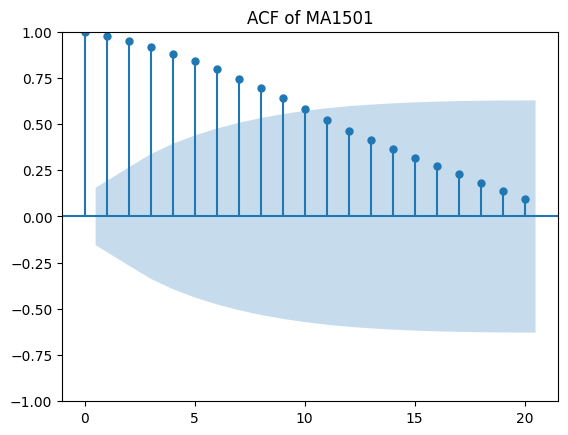

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.tsa.stattools as smt
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf as sm_plot_acf

def calculate_acf(df, encoding='MacRoman', nlags=40):

    # 假設第一列是日期，將其設為索引
    df.set_index(df.columns[0], inplace=True)

    # 確保只處理數值型列
    numerical_columns = df.select_dtypes(include=[np.number]).columns

    # 初始化一個字典來存儲每一列的 ACF 結果
    acf_results = {}

    # 使用每個數值列作為自相關檢定的對象
    for column in numerical_columns:
        series = df[column]
        acf_output = smt.acf(series, nlags=nlags, fft=True)  # 設定檢定的滯後數

        acf_results[column] = acf_output

        # # 每個變數
        # # 畫圖顯示自相關函數
        # plt.figure(figsize=(10, 6))
        # plt.plot(acf_output)
        # plt.title(f'Autocorrelation Function: {column}')
        # plt.xlabel('Lags')
        # plt.ylabel('ACF')
        # plt.show()

    # 將 ACF 結果轉換成 DataFrame
    acf_df = pd.DataFrame(acf_results)
    acf_df.index.name = 'Lags'

    # 顯示 ACF 結果的表格
    print(acf_df)
    return acf_df

def plot_acf_series(df, column, lags=20):
    # 假設第一列是日期，將其設為索引
    df.set_index(df.columns[0], inplace=True)

    # 繪製指定列的 ACF
    series = df[column]
    sm_plot_acf(series, lags=lags)
    plt.title(f"ACF of {column}")
    plt.show()

# 使用函數計算 ACF 結果
acf_df = calculate_acf(df)

# 繪製 ACF
plot_acf_series(df, column=df.columns[1], lags=20)  # 指定要繪製的列和滯後數

# 使用時間序列模型挑選特徵

## 從『預測 y』修改為『篩選特徵』

> #　修改 鄒慶士老師 的 『PM2.5_Time_Series_Forecasting_by_MLP_and_1D_ConvolutionNN.py』

> 使用1D卷積神經網路來處理時間序列數據並進行預測。

> 特徵篩選過程即是通過卷積層提取局部特徵，然後通過池化層進行降維，最終通過全連接層生成預測結果。

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Input, Dropout, Flatten, ZeroPadding1D, Conv1D, AveragePooling1D
from keras.optimizers import Adam
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import mean_absolute_error
import os

# 讀取數據
df = pd.read_csv('/mnt/data/PRSA_data_2010.1.1-2014.12.31.csv')

# 創建datetime列
df['datetime'] = df[['year', 'month', 'day', 'hour']].apply(lambda row: datetime.datetime(year=row['year'], month=row['month'], day=row['day'], hour=row['hour']), axis=1)
df.sort_values(by='datetime', ascending=True, inplace=True)

# 正規化pm2.5和PRES
scaler_pm25 = MinMaxScaler(feature_range=(0, 1))
df['scaled_pm2.5'] = scaler_pm25.fit_transform(df[['pm2.5']])

scaler_pres = MinMaxScaler(feature_range=(0, 1))
df['scaled_PRES'] = scaler_pres.fit_transform(df[['PRES']])

# 訓練集和驗證集的分割
split_date = datetime.datetime(year=2014, month=1, day=1, hour=0)
df_train = df.loc[df['datetime'] < split_date]
df_val = df.loc[df['datetime'] >= split_date]

# 定義makeXy函數
def makeXy(ts, nb_timesteps):
    X, y = [], []
    for i in range(nb_timesteps, ts.shape[0]):
        X.append(list(ts.loc[i-nb_timesteps:i-1]))
        y.append(ts.loc[i])
    return np.array(X), np.array(y)

# 準備訓練和驗證數據
X_train, y_train = makeXy(df_train['scaled_pm2.5'], 7)
X_val, y_val = makeXy(df_val['scaled_pm2.5'], 7)
X_train, X_val = X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), X_val.reshape((X_val.shape[0], X_val.shape[1], 1))

X_train_press, y_train_press = makeXy(df_train['scaled_PRES'], 7)
X_val_press, y_val_press = makeXy(df_val['scaled_PRES'], 7)
X_train_press, X_val_press = X_train_press.reshape((X_train_press.shape[0], X_train_press.shape[1], 1)), X_val_press.reshape((X_val_press.shape[0], X_val_press.shape[1], 1))

# 定義模型結構
def create_model():
    input_layer = Input(shape=(7, 1), dtype='float32')
    zeropadding_layer = ZeroPadding1D(padding=1)(input_layer)
    conv1D_layer1 = Conv1D(64, 3, strides=1, use_bias=True)(zeropadding_layer)
    conv1D_layer2 = Conv1D(32, 3, strides=1, use_bias=True)(conv1D_layer1)
    avgpooling_layer = AveragePooling1D(pool_size=3, strides=1)(conv1D_layer2)
    flatten_layer = Flatten()(avgpooling_layer)
    dropout_layer = Dropout(0.2)(flatten_layer)
    output_layer = Dense(1, activation='linear')(dropout_layer)

    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(loss='mean_absolute_error', optimizer=Adam())
    return model

# 訓練模型PM2.5
conv1d_model_pm25 = create_model()
save_weights_at_pm25 = os.path.join('data', 'PRSA_data_PM2.5_1DConv_weights.{epoch:02d}-{val_loss:.4f}.hdf5')
save_best_pm25 = ModelCheckpoint(save_weights_at_pm25, monitor='val_loss', verbose=0, save_best_only=True, mode='min', period=1)

conv1d_model_pm25.fit(x=X_train, y=y_train, batch_size=16, epochs=20, verbose=1, callbacks=[save_best_pm25], validation_data=(X_val, y_val), shuffle=True)

# 預測PM2.5
preds_pm25 = conv1d_model_pm25.predict(X_val)
pred_pm25 = scaler_pm25.inverse_transform(preds_pm25).squeeze()
mae_pm25 = mean_absolute_error(df_val['pm2.5'].iloc[7:], pred_pm25)
print('MAE for the validation set (PM2.5):', round(mae_pm25, 4))

# 繪製PM2.5的實際值與預測值
plt.figure(figsize=(5.5, 5.5))
plt.plot(range(50), df_val['pm2.5'].iloc[7:57], linestyle='-', marker='*', color='r')
plt.plot(range(50), pred_pm25[:50], linestyle='-', marker='.', color='b')
plt.legend(['Actual','Predicted'], loc=2)
plt.title('Actual vs Predicted pm2.5 under Conv1D')
plt.ylabel('pm2.5')
plt.xlabel('Index')
plt.show()

# 訓練模型PRES
conv1d_model_pres = create_model()
save_weights_at_pres = os.path.join('data', 'PRSA_data_PESS_1DConv_weights.{epoch:02d}-{val_loss:.4f}.hdf5')
save_best_pres = ModelCheckpoint(save_weights_at_pres, monitor='val_loss', verbose=0, save_best_only=True, mode='min', period=1)

conv1d_model_pres.fit(x=X_train_press, y=y_train_press, batch_size=16, epochs=20, verbose=1, callbacks=[save_best_pres], validation_data=(X_val_press, y_val_press), shuffle=True)

# 預測PRES
preds_pres = conv1d_model_pres.predict(X_val_press)
pred_pres = scaler_pres.inverse_transform(preds_pres).squeeze()
mae_pres = mean_absolute_error(df_val['PRES'].iloc[7:], pred_pres)
print('MAE for the validation set (PRES):', round(mae_pres, 4))

# 繪製PRES的實際值與預測值
plt.figure(figsize=(5.5, 5.5))
plt.plot(range(50), df_val['PRES'].iloc[7:57], linestyle='-', marker='*', color='r')
plt.plot(range(50), pred_pres[:50], linestyle='-', marker='.', color='b')
plt.legend(['Actual','Predicted'], loc=2)
plt.title('Actual vs Predicted pressure under Conv1D')
plt.ylabel('pressure')
plt.xlabel('Index')
plt.show()

> 要怎麼樣才可以知道【 由CNN時間序列預測 】所挑選出來的特徵 ?

- 要知道由CNN時間序列預測所挑選出來的特徵，可以通過觀察卷積層的輸出來了解。卷積層的輸出代表了特徵提取的結果，這些特徵是由卷積核在輸入數據上滑動計算所得。具體步驟如下：

- 提取卷積層的輸出：在訓練模型後，通過中間層獲取卷積層的輸出，這些輸出即為特徵。

- 觀察特徵圖：將卷積層的輸出可視化，以便理解哪些部分或模式對預測最有影響。

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Input, Dropout, Flatten, ZeroPadding1D, Conv1D, AveragePooling1D
from keras.optimizers import Adam
from keras.models import Model
from keras.models import Model
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
from keras import backend as K
import os

# 讀取數據
df = pd.read_csv('/mnt/data/PRSA_data_2010.1.1-2014.12.31.csv')

# 創建datetime列
df['datetime'] = df[['year', 'month', 'day', 'hour']].apply(lambda row: datetime.datetime(year=row['year'], month=row['month'], day=row['day'], hour=row['hour']), axis=1)
df.sort_values(by='datetime', ascending=True, inplace=True)

# 正規化pm2.5和PRES
scaler_pm25 = MinMaxScaler(feature_range=(0, 1))
df['scaled_pm2.5'] = scaler_pm25.fit_transform(df[['pm2.5']])

scaler_pres = MinMaxScaler(feature_range=(0, 1))
df['scaled_PRES'] = scaler_pres.fit_transform(df[['PRES']])

# 訓練集和驗證集的分割
split_date = datetime.datetime(year=2014, month=1, day=1, hour=0)
df_train = df.loc[df['datetime'] < split_date]
df_val = df.loc[df['datetime'] >= split_date]

# 定義makeXy函數
def makeXy(ts, nb_timesteps):
    X, y = [], []
    for i in range(nb_timesteps, ts.shape[0]):
        X.append(list(ts.loc[i-nb_timesteps:i-1]))
        y.append(ts.loc[i])
    return np.array(X), np.array(y)

# 準備訓練和驗證數據
X_train, y_train = makeXy(df_train['scaled_pm2.5'], 7)
X_val, y_val = makeXy(df_val['scaled_pm2.5'], 7)
X_train, X_val = X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), X_val.reshape((X_val.shape[0], X_val.shape[1], 1))

# 定義模型結構
def create_model():
    input_layer = Input(shape=(7, 1), dtype='float32')
    zeropadding_layer = ZeroPadding1D(padding=1)(input_layer)
    conv1D_layer1 = Conv1D(64, 3, strides=1, use_bias=True)(zeropadding_layer)
    conv1D_layer2 = Conv1D(32, 3, strides=1, use_bias=True)(conv1D_layer1)
    avgpooling_layer = AveragePooling1D(pool_size=3, strides=1)(conv1D_layer2)
    flatten_layer = Flatten()(avgpooling_layer)
    dropout_layer = Dropout(0.2)(flatten_layer)
    output_layer = Dense(1, activation='linear')(dropout_layer)

    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(loss='mean_absolute_error', optimizer=Adam())
    return model

# 訓練模型PM2.5
conv1d_model_pm25 = create_model()
save_weights_at_pm25 = os.path.join('data', 'PRSA_data_PM2.5_1DConv_weights.{epoch:02d}-{val_loss:.4f}.hdf5')
save_best_pm25 = ModelCheckpoint(save_weights_at_pm25, monitor='val_loss', verbose=0, save_best_only=True, mode='min', period=1)

conv1d_model_pm25.fit(x=X_train, y=y_train, batch_size=16, epochs=20, verbose=1, callbacks=[save_best_pm25], validation_data=(X_val, y_val), shuffle=True)

# 提取中間層輸出
intermediate_layer_model = Model(inputs=conv1d_model_pm25.input, outputs=conv1d_model_pm25.get_layer('conv1d').output)
intermediate_output = intermediate_layer_model.predict(X_val)

# 可視化卷積層的輸出
def plot_feature_maps(feature_maps):
    square = int(np.sqrt(feature_maps.shape[-1]))
    fig, axs = plt.subplots(square, square, figsize=(12, 12))
    fig.subplots_adjust(hspace=0.1, wspace=0.1)
    for i in range(square):
        for j in range(square):
            axs[i, j].imshow(feature_maps[:, :, i * square + j], cmap='viridis')
            axs[i, j].axis('off')
    plt.show()

plot_feature_maps(intermediate_output)

# 預測PM2.5
preds_pm25 = conv1d_model_pm25.predict(X_val)
pred_pm25 = scaler_pm25.inverse_transform(preds_pm25).squeeze()
mae_pm25 = mean_absolute_error(df_val['pm2.5'].iloc[7:], pred_pm25)
print('MAE for the validation set (PM2.5):', round(mae_pm25, 4))

# 繪製PM2.5的實際值與預測值
plt.figure(figsize=(5.5, 5.5))
plt.plot(range(50), df_val['pm2.5'].iloc[7:57], linestyle='-', marker='*', color='r')
plt.plot(range(50), pred_pm25[:50], linestyle='-', marker='.', color='b')
plt.legend(['Actual','Predicted'], loc=2)
plt.title('Actual vs Predicted pm2.5 under Conv1D')
plt.ylabel('pm2.5')
plt.xlabel('Index')
plt.show()


# 使用時間序列模型預測 y - 01理解

## ETL

### 缺失值

In [ ]:
#　改鄒慶士老師的PM2.5-time-series-code
plt.figure(figsize=(11, 11))
g = sns.lineplot(x=df["datetime"], y=df['pm2.5'])
g.set_title('Time series of pm2.5')
g.set_xlabel('Index')
g.set_ylabel('pm2.5 readings')

### 離群值

> 資料前處理與視覺化

In [ ]:
# class datetime.datetime_A combination of a date and a time. Attributes: year, month, day, hour, minute, second, microsecond, and tzinfo.
df['datetime'] = df[['year', 'month', 'day', 'hour']].apply(lambda row: datetime.datetime(year=row['year'], month=row['month'], day=row['day'], hour=row['hour']), axis='columns')

print(df.dtypes['datetime']) # datetime: datetime64[ns]

df.sort_values(by='datetime', ascending=True, inplace=True)


# - 視覺化檢視pm2.5的離群值
# A box plot for pm2.5 is plotted to check the presence of outliers
plt.figure(figsize=(5.5, 5.5))
g = sns.boxplot(df['pm2.5'], width=0.3)
g.set_title('Box plot of pm2.5')

> 假設有離群值，故以MAE為人工神經網路權重訓練之優化準則(較不易受離群值的影響)

In [ ]:
# - 視覺化檢視 Pressure

# Let us draw a box plot to visualize the central tendency and dispersion of PRES
plt.figure(figsize=(5.5, 5.5))
g = sns.boxplot(df['PRES'], width=0.3)
g.set_title('Box plot of Air Pressure')

> 檢視整個資料期間的pm2.5時間序列，重點在是否有趨勢、季節性等等特徵

* **[發現]** 沒有長期趨勢

In [ ]:
plt.figure(figsize=(11, 11))
g = sns.lineplot(x=df["datetime"], y=df['pm2.5'])
g.set_title('Time series of pm2.5')
g.set_xlabel('Index')
g.set_ylabel('pm2.5 readings')

> 小節 :

> 從視覺化發現，XXX

In [ ]:
# - 檢視整個資料期間的PRES時間序列

plt.figure(figsize=(11, 11))
g = sns.lineplot(x=df['datetime'], y=df['PRES'])
g.set_title('Time series of Air Pressure')
g.set_xlabel('Index')
g.set_ylabel('Air Pressure readings in hPa')

## 資料轉換

> 資料轉換

 - 最陡坡降演算法當變數在 [-1, 1] ，或是 [-3, 3] 時表現比較好 ( 收斂較快！)

 - 以 MinMaxScaler 將 pm2.5 和 PRES 轉換到[0,1]之間

In [ ]:
df['pm2.5'].head()

from sklearn.preprocessing import MinMaxScaler
scaler_pm25 = MinMaxScaler(feature_range=(0, 1))
df['scaled_pm2.5'] = scaler_pm25.fit_transform(np.array(df['pm2.5']).reshape(-1, 1)) # Why reshape?

In [ ]:
# - 為何要reshape?類似R語言之drop引數設為TRUE或是FALSE。

np.array(df['pm2.5']).shape

np.array(df['pm2.5']).reshape(-1, 1).shape

df['PRES'].head()

scaler_pres = MinMaxScaler(feature_range=(0, 1))
df['scaled_PRES'] = scaler_pres.fit_transform(np.array(df['PRES']).reshape(-1, 1))

df['scaled_PRES'].head()

## 資料切分

> 資料切分

 - 依訓練集計算損失函數，以最陡坡降演算法進行誤差倒傳遞與權重更新

 - 核驗集用來評估模型與決定最佳訓練代數 (epoch) ，增加代數可進一步降低損失函值，但可能招致過度配適風險

 - 前端 Keras  +  後端 TensorFlow

In [ ]:
split_date = datetime.datetime(year=2014, month=1, day=1, hour=0)
df_train = df.loc[df['datetime']<split_date]
df_val = df.loc[df['datetime']>=split_date]
print('Shape of train:', df_train.shape)
print('Shape of validation:', df_val.shape)

> 產生訓練集與核驗集的X與y

 - 用過去七天的觀測值來預測下一天的 pm2.5 值，亦即是 AR(7) 模型

 - makeXy(.) 函數依傳入的原始時間序列，以及所需的歷史觀測值天數 (ex. 7天) ，生成 X 與 y

In [ ]:
def makeXy(ts, nb_timesteps):
    """
    Input:
           ts: original time series (Pandas Series)
           nb_timesteps: number of time steps in the regressors (predictors)
    Output:
           X: 2-D array of regressors
           y: 1-D array of target
    """
    X = []
    y = []
    for i in range(nb_timesteps, ts.shape[0]): # start = 7 ~ stop = 33095(從nb_timesteps開始到最後一筆資料)
        X.append(list(ts.loc[i-nb_timesteps:i-1])) # 0~6, 1~7, 2~8, ...(往前倒推7筆數據為自變數)
        y.append(ts.loc[i]) # 7, 8, 9, ...(第i個為因變數)
    X, y = np.array(X), np.array(y)
    return X, y

X_train, y_train = makeXy(df_train['scaled_pm2.5'], 7)
print('Shape of train arrays:', X_train.shape, y_train.shape)

X_train_press, y_train_press = makeXy(df_train['scaled_PRES'], 7)
print('Shape of train arrays:', X_train_press.shape, y_train_press.shape)

X_val, y_val = makeXy(df_val['scaled_pm2.5'], 7)
print('Shape of validation arrays:', X_val.shape, y_val.shape)

X_val_press, y_val_press = makeXy(df_val['scaled_PRES'], 7)
print('Shape of validation arrays:', X_val_press.shape, y_val_press.shape)
# 注意！y_val與y_val_press擷取scaled後的變數

## 1D卷積類神經網路 (Convolution Neural Neworks)　維數

> 1D卷積類神經網路 (Convolution Neural Neworks)

 - 卷積層投入的資料維度為3D，其維數為 (樣本數, 延遲期數, 每期屬性數)

 - 本例為 (33089 或 8654, 7, 1)

 - 每期屬性數為 1 ，因此為 1D 卷積層

In [ ]:
#X_train and X_val are reshaped to 3D arrays
X_train, X_val = X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
print('Shape of arrays after reshaping:', X_train.shape, X_val.shape)

#X_train_press and X_val_press are reshaped to 3D arrays
X_train_press, X_val_press = X_train_press.reshape((X_train_press.shape[0], X_train_press.shape[1], 1)), X_val_press.reshape((X_val_press.shape[0], X_val_press.shape[1], 1))
print('Shape of arrays after reshaping:', X_train_press.shape, X_val_press.shape)

## Keras API 定義 1D-CNN

> Keras API 定義 1D-CNN

 - 定義下一層時，再宣告其投入層

In [ ]:
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import ZeroPadding1D
from keras.layers.convolutional import Conv1D
from keras.layers.pooling import AveragePooling1D
from keras.optimizers import SGD
from keras.models import Model
from keras.models import load_model
from keras.callbacks import ModelCheckpoint


## 模型配適

> **投入層**

In [ ]:
# - 投入層
# Define input layer which has shape (None, 7) and of type float32. None indicates the number of instances
input_layer = Input(shape=(7,1), dtype='float32')
input_layer

> **合併層 ( Pooling layer )**

In [ ]:
# - 0補綴層：前後填補0，使得卷積層運算出來的結果與原時間序列長度一樣
# - 卷積層與跨度(stride)
# - 合併層(Pooling layer, 又稱降低取樣層downsampling layer)：提取卷積層運算出來的結果

# Add zero padding
zeropadding_layer = ZeroPadding1D(padding=1)(input_layer)

# - (輸出屬性數, 1D卷積時窗長度, 平移跨度, 是否使用截距項)
# Add 1D convolution layers
conv1D_layer1 = Conv1D(64, 3, strides=1, use_bias=True)(zeropadding_layer)
conv1D_layer2 = Conv1D(32, 3, strides=1, use_bias=True)(conv1D_layer1)


# - 合併層以平均合併，而非以最大值合併
# Add AveragePooling1D layer
avgpooling_layer = AveragePooling1D(pool_size=3, strides=1)(conv1D_layer2)


# - 合併後產生3D輸出，因此需要扁平化層(樣本數, 延遲期數*每期屬性數)
#Add Flatten layer
flatten_layer = Flatten()(avgpooling_layer)

> **丟棄層 (dropout layer)**

In [ ]:
# - 丟棄層(dropout layer)：因深度類經網路容易過度配適訓練集，導致驗證或測試集績效不彰。因此，在輸出層前加入一丟棄層，隨機將p百分比的投入值設為0，獲得拔靴整合或裝袋型系集模型的過度配適矯正效果

dropout_layer = Dropout(0.2)(flatten_layer)

#Finally the output layer gives prediction for the next day's air pressure.
output_layer = Dense(1, activation='linear')(dropout_layer)

> 打包投入層、隱藏層與輸出層為模型

> 以 MAE 為優化準則

> adam 優化算法

In [ ]:
conv1d_model = Model(inputs=input_layer, outputs=output_layer) # Model(inputs, outputs)
conv1d_model.compile(loss='mean_absolute_error', optimizer='adam') # SGD(lr=0.001, decay=1e-5))
conv1d_model.summary()

> 模型配適

> 以核驗集追蹤損失函數，並儲存各 epoch 的最小損失值結果

In [ ]:
### > PM2.5 Conv1D
save_weights_at = os.path.join('data', 'PRSA_data_PM2.5_1DConv_weights.{epoch:02d}-{val_loss:.4f}.hdf5')
save_best = ModelCheckpoint(save_weights_at, monitor='val_loss', verbose=0,
                            save_best_only=True, save_weights_only=False, mode='min',
                            period=1)
conv1d_model.fit(x=X_train, y=y_train, batch_size=16, epochs=20,
             verbose=1, callbacks=[save_best], validation_data=(X_val, y_val),
             shuffle=True)



help(ModelCheckpoint)

X_train
y_train

# - 以儲存的最佳模型進行預測，因預測值已標準化，故須逆轉換回原始pm2.5
preds = conv1d_model.predict(X_val.reshape((8654,7,1)))
pred_pm25 = scaler_pm25.inverse_transform(preds)
pred_pm25 = np.squeeze(pred_pm25)


In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(df_val['pm2.5'].loc[7:], pred_pm25)
print('MAE for the validation set:', round(mae, 4))


#Let's plot the first 50 actual and predicted values of pm2.5.
plt.figure(figsize=(5.5, 5.5))
plt.plot(range(50), df_val['pm2.5'].loc[7:56], linestyle='-', marker='*', color='r')
plt.plot(range(50), pred_pm25[:50], linestyle='-', marker='.', color='b')
plt.legend(['Actual','Predicted'], loc=2)
plt.title('Actual vs Predicted pm2.5 under Conv1D')
plt.ylabel('pm2.5')
plt.xlabel('Index')

### > PRESS Conv1D(模型相同，但傳入不同的資料集)
save_weights_at = os.path.join('data', 'PRSA_data_PESS_1DConv_weights.{epoch:02d}-{val_loss:.4f}.hdf5')
save_best = ModelCheckpoint(save_weights_at, monitor='val_loss', verbose=0,
                            save_best_only=True, save_weights_only=False, mode='min',
                            period=1)
conv1d_model.fit(x=X_train_press, y=y_train_press, batch_size=16, epochs=20,
             verbose=1, callbacks=[save_best], validation_data=(X_val_press, y_val_press),
             shuffle=True)

help(ModelCheckpoint)

X_train
y_train


# - 以儲存的最佳模型進行預測，因預測值已標準化，故須逆轉換回原始pm2.5
preds = conv1d_model.predict(X_val_press.reshape((8654,7,1)))
pred_PRES = scaler_pres.inverse_transform(preds)
pred_PRES = np.squeeze(pred_PRES)


from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(df_val['PRES'].loc[7:], pred_PRES)
print('MAE for the validation set:', round(mae, 4))


#Let's plot the first 50 actual and predicted values of pressure.
plt.figure(figsize=(5.5, 5.5))
plt.plot(range(50), df_val['PRES'].loc[7:56], linestyle='-', marker='*', color='r')
plt.plot(range(50), pred_PRES[:50], linestyle='-', marker='.', color='b')
plt.legend(['Actual','Predicted'], loc=2)
plt.title('Actual vs Predicted pressure under Conv1D')
plt.ylabel('pressure')
plt.xlabel('Index')

# 使用時間序列模型預測 y - 02實作

* https://github.com/JeCase/LoadElectricity_Forecasting_CNN-BiLSTM-Attention/blob/main/Forecasting_CNN-BiLSTM.ipynb

## step 1. 安裝套件

In [26]:
# !pip install tensorflow-probability
# !pip install tensorflow-probability[tf] 
# # !pip install joblib
# !pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [27]:
import numpy as np
import joblib
import pandas as pd
import datetime
import tensorflow as tf
import os
import random
import timeit
import seaborn as sns
import datetime
import matplotlib.pyplot as plt

import tensorflow_probability as tfp
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, MaxPooling1D, Bidirectional, Dropout, Flatten
from tensorflow.keras import backend as K
from tensorflow.keras.metrics import RootMeanSquaredError

# tf.compat.v1.losses.sparse_softmax_cross_entropy
# tf.compat.v1.logging.TaskLevelStatusMessage
# tf.compat.v1.control_flow_v2_enabled

## Step 2. 載入資料

> 使用 VScode

In [28]:
import pandas as pd

# 使用相對路徑載入資料
df = pd.read_csv('../../all_data/df_monthly_bfill.csv', encoding='utf-8')

In [29]:
# 顯示資料前幾行
df.head(3)

date  EA1101  EB0312  EB0911   EB18   EB21   EB22     EC06    EC07  \
0  2011-01-31    34.0    28.8  1.0978  86.78  95.85  89.85  19.6966  2.4085   
1  2011-02-28    34.0    28.8  1.3261  85.89  96.75  89.80  15.6473  2.4130   
2  2011-03-31    31.0    28.8  1.3950  83.66  96.60  88.00   9.6368  2.6450   

   LA07  ...  航運業(TSE26)收盤  鋼鐵(TSE20)收盤    倫敦鋁現貨價  倫敦高級銅極現貨價  巴拿馬型貨櫃運費指數  \
0  4.64  ...        123.49       120.70  2450.300   9560.900      1738.2   
1  4.69  ...        108.61       117.89  2513.250   9853.125      1696.0   
2  4.48  ...        103.48       122.54  2548.875   9564.625      2071.5   

   杜拜輕原油現貨價  水泥50kg北區台泥  無鉛汽油95   竹節鋼筋_南  預拌混凝土3000磅台北  
0   91.6700       151.5  31.600  21260.0        1815.0  
1   99.7525       151.5  31.575  21250.0        1890.0  
2  109.1775       151.5  32.675  21525.0        1890.0  

[3 rows x 42 columns]

In [30]:
df.columns

Index(['date', 'EA1101', 'EB0312', 'EB0911', 'EB18', 'EB21', 'EB22', 'EC06',
       'EC07', 'LA07', 'MA1501', 'MB65', 'MC31', 'MC31G', 'MC36', 'MC36G',
       'MO30', 'MP101G', 'NA0101', 'NA1005', 'NB0101', 'NC0117', 'NC0118',
       'NE0206', 'NE0812', 'OC08G', 'PA0120', 'PA1205', 'PE0503', 'TSE收盤',
       '水泥(TSE11)收盤', '建材營造(TSE25)收盤', '航運業(TSE26)收盤', '鋼鐵(TSE20)收盤', '倫敦鋁現貨價',
       '倫敦高級銅極現貨價', '巴拿馬型貨櫃運費指數', '杜拜輕原油現貨價', '水泥50kg北區台泥', '無鉛汽油95', '竹節鋼筋_南',
       '預拌混凝土3000磅台北'],
      dtype='object')

In [ ]:
len(df.columns)

42

> 測試 : 切成單變量

In [ ]:
df_test = df.iloc[:, :2]

In [ ]:
# 提取 '倫敦高級銅極現貨價' 和 'date' 欄位
df_test = df[['date', '倫敦高級銅極現貨價']]

In [ ]:
df_test

date  倫敦高級銅極現貨價
0    2011-01-31   9560.900
1    2011-02-28   9853.125
2    2011-03-31   9564.625
3    2011-04-30   9524.800
4    2011-05-31   8945.125
..          ...        ...
155  2023-12-31   8450.000
156  2024-01-31   8339.375
157  2024-02-29   8314.000
158  2024-03-31   8664.600
159  2024-04-30   9554.500

[160 rows x 2 columns]

> 使用 colab

In [ ]:
# #loading the dataset
# from google.colab import files

# uploaded = files.upload()

In [ ]:
# import io
# import pandas as pd
# import chardet

# # 使用 chardet 檢測檔案編碼
# result = chardet.detect(uploaded_file)
# encoding = result['encoding']
# print(f"Detected encoding: {encoding}")

# # 使用檢測到的編碼讀取 CSV 檔案
# df = pd.read_csv(io.BytesIO(uploaded['df_monthly_b_fill.csv']), encoding=encoding)

# # 顯示前五行數據
# df.head()

## step3.  Split the data into training, validation, and test sets

In [3]:
# 取得資料的總筆數
n = len(df)

# 設定訓練資料集的筆數為總筆數的80%
n_train = int(0.7 * n)
# 設定驗證資料集的筆數為總筆數的10%
n_val = int(0.15 * n)
# 設定測試資料集的筆數為剩餘的筆數（總筆數減去訓練和驗證資料集的筆數）
n_test = n - n_train - n_val

# 將資料前80%的資料作為訓練資料集，並移除 'date' 欄位，只保留數值部分
train_data = df[:n_train].drop(columns=['date']).values
# 將資料前80%的資料作為訓練資料集，只保留 'date' 欄位，移除其他欄位
train_date = df[:n_train][['date']]

# 將資料第80%到90%的資料作為驗證資料集，並移除 'date' 欄位，只保留數值部分
val_data = df[n_train:n_train + n_val].drop(columns=['date']).values
# 將資料第80%到90%的資料作為驗證資料集，只保留 'date' 欄位，移除其他欄位
val_date = df[n_train:n_train + n_val][['date']]

# 將資料最後10%的資料作為測試資料集，並移除 'date' 欄位，只保留數值部分
test_data = df[-n_test:].drop(columns=['date']).values
# 將資料最後10%的資料作為測試資料集，只保留 'date' 欄位，移除其他欄位
test_date = df[-n_test:][['date']]


In [6]:
train_data.shape

(112, 41)

In [33]:
print('Train Set      : ',len(train_data))
print('Validation Set : ',len(val_data))
print('Test Set       : ',len(test_data))

Train Set      :  112
Validation Set :  24
Test Set       :  24


## Step 4. 資料正則化

In [36]:
# !pip install scikit-learn

     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.6 kB 435.7 kB/s eta 0:00:01
     -------------------------------------- 60.6/60.6 kB 535.5 kB/s eta 0:00:00
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.0 MB 1.6 MB/s eta 0:00:07
    --------------------------------------- 0.2/11.0 MB 3.0 MB/s eta 0:00:04
   - -------------------------------------- 0.5/11.0 MB 3.6 MB/s eta 0:00:03
   --- ------------------------------------ 0.9/11.0 MB 5.2 MB/s eta 0:00:02
   --- ------------------------------------ 1.0/11.0 MB 5.2 MB/s eta 0:00:02
   ----- ---------------------------------- 1.4/11.0 MB 5.2 MB/s eta 0:00:02
   --------- ------------------------------ 2.5/11.0 MB 7.9 MB/s eta 0:00:02
   ---------- ----

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
val_data   = scaler.transform(val_data)
test_data  = scaler.transform(test_data) # 他全部資料都拿進去標準化了(所以最後target y要還原)

## step 5. 

In [38]:
# Step 5
# Take day for predict from data test

one_day_date = test_date.head(1)
one_day_data = test_data[:1]

three_day_date = test_date.head(3)
three_day_data = test_data[:3]

five_day_date = test_date.head(5)
five_day_data = test_data[:5]

In [39]:
three_day_date

date
136  2022-05-31
137  2022-06-30
138  2022-07-31

In [ ]:
one_day_date

date
144  2023-01-31

## step 6. Create a windowed dataset for training

In [40]:
window_size = 15 # use 1 from interval one month of data for each window
def create_window_dataset(data, window_size):
    X = []
    y = []
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i])
        y.append(data[i])
    return np.array(X), np.array(y)

> 將訓練資料集反轉換回原始比例

In [41]:
# 使用之前訓練好的標準化器 (scaler) 將數值資料恢復到標準化之前的值
original_data = scaler.inverse_transform(train_data)
original_data

array([[ 3.4000e+01,  2.8800e+01,  1.0978e+00, ...,  3.1600e+01,
         2.1260e+04,  1.8150e+03],
       [ 3.4000e+01,  2.8800e+01,  1.3261e+00, ...,  3.1575e+01,
         2.1250e+04,  1.8900e+03],
       [ 3.1000e+01,  2.8800e+01,  1.3950e+00, ...,  3.2675e+01,
         2.1525e+04,  1.8900e+03],
       ...,
       [ 2.4000e+01,  3.6800e+01, -2.0380e-01, ...,  2.7100e+01,
         1.5420e+04,  1.9050e+03],
       [ 2.0000e+01,  2.8700e+01, -2.0500e-02, ...,  2.3525e+01,
         1.5175e+04,  2.0250e+03],
       [ 1.9000e+01,  2.5700e+01, -9.6690e-01, ...,  1.9100e+01,
         1.4575e+04,  2.0250e+03]])

In [42]:
original_data.shape

(112, 41)

## step 7. 使用滑動窗口的方法創建數據集

> window_size 為窗口大小

In [43]:
# step 7.
# 使用滑動窗口的方法從【訓練資料集】創建輸入和輸出數據集，window_size 為窗口大小
X_train, y_train = create_window_dataset(train_data, window_size)

# 使用滑動窗口的方法從【驗證資料集】創建輸入和輸出數據集，window_size 為窗口大小
X_val, y_val = create_window_dataset(val_data, window_size)

# 使用滑動窗口的方法從【測試資料集】創建輸入和輸出數據集，window_size 為窗口大小
X_test, y_test = create_window_dataset(test_data, window_size)

In [44]:
X_train.shape

(97, 15, 41)

In [45]:
X_test.shape

(9, 15, 41)

In [46]:
y_val

array([[ 3.84644413e+00,  9.74955417e-01,  1.54434469e+00,
        -1.33165466e+00, -4.81303778e+00,  1.42998273e+00,
         3.15631350e+00, -3.85778439e+00,  1.13151454e+00,
         3.41645156e+00, -2.72003661e+00,  3.47445042e+00,
         4.78295662e+00,  5.08640241e+00,  1.67268143e+00,
        -2.98276264e+00,  3.91719664e+00,  2.87457697e+00,
         1.65752713e+00,  2.86839702e+00,  2.80979964e+00,
         2.86168403e+00,  3.04009080e+00,  8.30795464e-01,
         1.89110325e+00,  2.34608029e+00,  2.93111007e+00,
         8.25140638e+00,  6.43744437e+00,  2.98816359e+00,
         2.77978786e+00,  1.57169027e+01,  9.01641629e+00,
         2.72693312e+00,  2.14380420e+00,  5.91182150e+00,
        -3.00396873e-01,  2.40443958e+00,  1.99216898e-02,
         2.31085150e+00,  1.21207408e+00],
       [ 3.62864749e+00,  5.34744783e-01,  1.83319020e+00,
        -1.55697917e+00, -5.30630523e+00,  1.29467600e+00,
         2.82929772e+00, -3.50051207e+00,  1.84563225e-02,
         3.63

In [47]:
y_test

array([[-1.38067509e+00, -4.82293578e-01,  1.75479249e+00,
        -3.04758742e+00, -5.29279105e+00,  1.14500635e-01,
         5.46069533e-01,  1.01578657e+00, -1.57162685e+00,
         1.68746425e+00,  2.37203358e+00,  5.22118602e+00,
         7.80739331e-01,  7.70814147e+00,  5.46334826e-02,
         1.98864801e+00,  1.81753648e+00,  4.49883245e+00,
         3.07078306e+00,  4.34501901e+00,  3.83055493e+00,
         3.81398127e+00,  4.79824166e+00, -4.64904734e-01,
         7.05887681e-01,  4.65827231e+00,  3.01807269e+00,
         1.09976206e+01,  6.04641170e+00,  1.47134022e+00,
         3.36791233e+00,  5.03943848e+00,  3.68636336e+00,
         8.43568641e-01,  1.34523961e+00,  5.44835189e-01,
         3.89880991e-01,  9.37789031e+00,  6.40090416e-01,
         1.34473466e+00,  5.55455658e+00],
       [-9.45081823e-01, -2.84957776e-01,  2.20437017e+00,
        -3.21658080e+00, -5.36036194e+00,  1.74502727e-03,
         1.60285900e+00,  1.01617875e+00, -1.88964348e+00,
         1.19

## step 8. 模型訓練

>　step 8.1 計算相關係數

In [48]:
# step 8.1
def cc(y_true, y_pred):
    """
    計算 y_true 和 y_pred 之間的相關係數。
    """
    # 計算協方差矩陣
    cov = tfp.stats.covariance(y_true, y_pred, sample_axis=0)

    # 計算 y_true 和 y_pred 的標準差
    std_true = K.std(y_true)
    std_pred = K.std(y_pred)

    # 計算相關係數
    return cov / (std_true * std_pred)

> step 8.2 之後載入model使用

In [ ]:
# #Step 8
# from keras.models import load_model
# import pickle

# # Load the trained model
# model = load_model('/content/drive/MyDrive/Model/CNN-BiLSTM_Model_Final.h5', custom_objects={"cc": cc })

# # Load the history object
# with open('/content/drive/MyDrive/Model/CNN-BiLSTM_history_Final.pkl', 'rb') as f:
#     history = pickle.load(f)

> Conv1D

> window_size = 時間軸

> kernel_size = 一次滑動範圍

> strides = 一次滑動的距離

> (row數量, 時間軸, 特徵軸)

In [ ]:
# define model
# model = Sequential()
# model.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(None, n_steps, n_features)))
# model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
# model.add(TimeDistributed(Flatten()))
# model.add(LSTM(50, activation='relu'))
# model.add(Dense(1))
# model.compile(optimizer='adam', loss='mse')

In [49]:
# 假設每個數據點有42個特徵
n_features = train_data.shape[1]
input_shape = (window_size, n_features)

In [50]:
n_features  # 輸出層的單元數應該等於特徵數量

41

In [51]:
# input_shape = (window_size, 42)
# input_shape = (None, window_size, 41) > 不行這樣處理

# strides=1
model = Sequential([
    Conv1D(filters=4, kernel_size=3, strides=1, activation='relu', input_shape=input_shape),
    Conv1D(filters=4, kernel_size=3, strides=1, activation='relu'),
    MaxPooling1D(pool_size=2),
    # Flatten(),  # 添加 Flatten 層

    Bidirectional(LSTM(8, return_sequences=True)),
    Dropout(0.5),
    Bidirectional(LSTM(8)),

    Dense(32, activation='relu'),
    Dense(n_features),  # 輸出層的單元數應該等於特徵數量
    # Dense(1)
])

c:\Users\Tony\anaconda3\envs\dl\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [52]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer= optimizer, 
              loss=tf.keras.losses.Huber(), 
              metrics= [RootMeanSquaredError(), cc])

In [53]:
input_shape

(15, 41)

In [54]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', 
                               patience=5, verbose=1,
                               mode='min', 
                               restore_best_weights=True)

In [55]:
history = model.fit(
    X_train, y_train, 
    epochs=50, 
    batch_size=16, 
    validation_data=(X_val, y_val), 
    callbacks=[early_stopping])

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 214ms/step - cc: 0.0094 - loss: 0.3844 - root_mean_squared_error: 0.9192 - val_cc: 8.5546e-04 - val_loss: 2.9572 - val_root_mean_squared_error: 4.3545
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - cc: 0.0101 - loss: 0.3815 - root_mean_squared_error: 0.9183 - val_cc: 8.5912e-04 - val_loss: 2.9573 - val_root_mean_squared_error: 4.3546
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - cc: 0.0057 - loss: 0.3875 - root_mean_squared_error: 0.9293 - val_cc: 8.5989e-04 - val_loss: 2.9573 - val_root_mean_squared_error: 4.3547
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - cc: 0.0063 - loss: 0.3841 - root_mean_squared_error: 0.9242 - val_cc: 8.5889e-04 - val_loss: 2.9573 - val_root_mean_squared_error: 4.3547
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - cc: 0.0103 - loss: 0.3778 - root_mean_squared_error: 0.9130 - val_cc: 8.6025e-04 - val_loss: 2.9572 - val_root_mean_squared_error: 4.3546
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - cc:

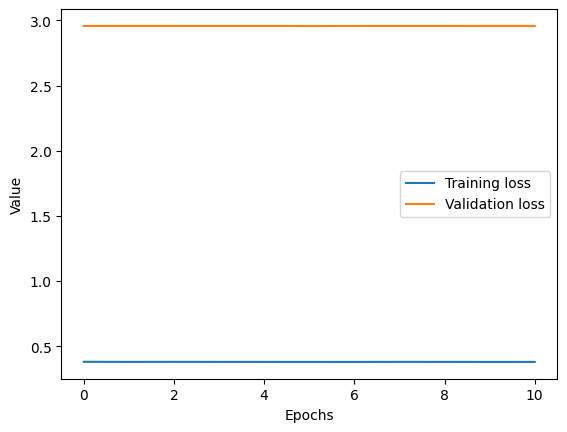

In [56]:
# Plot the training and validation metrics
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.show()

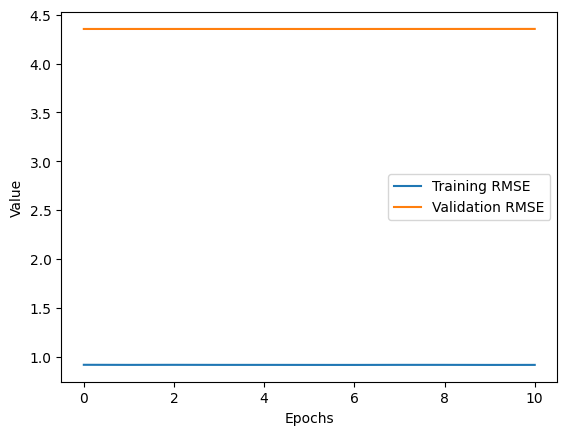

In [57]:
plt.plot(history.history['root_mean_squared_error'], label='Training RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='Validation RMSE')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.show()

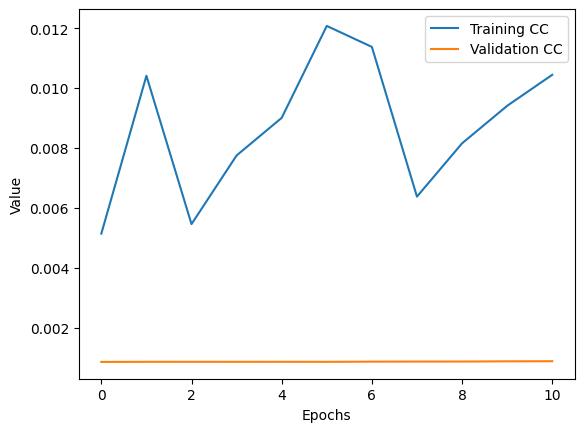

In [58]:
plt.plot(history.history['cc'], label='Training CC')
plt.plot(history.history['val_cc'], label='Validation CC')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.show()

In [59]:
# Evaluate the model on the test set
test_loss, test_rmse, test_cc = model.evaluate(X_test, y_test)

# Make predictions on the test set
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - cc: nan - loss: nan - root_mean_squared_error: nan
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 757ms/step


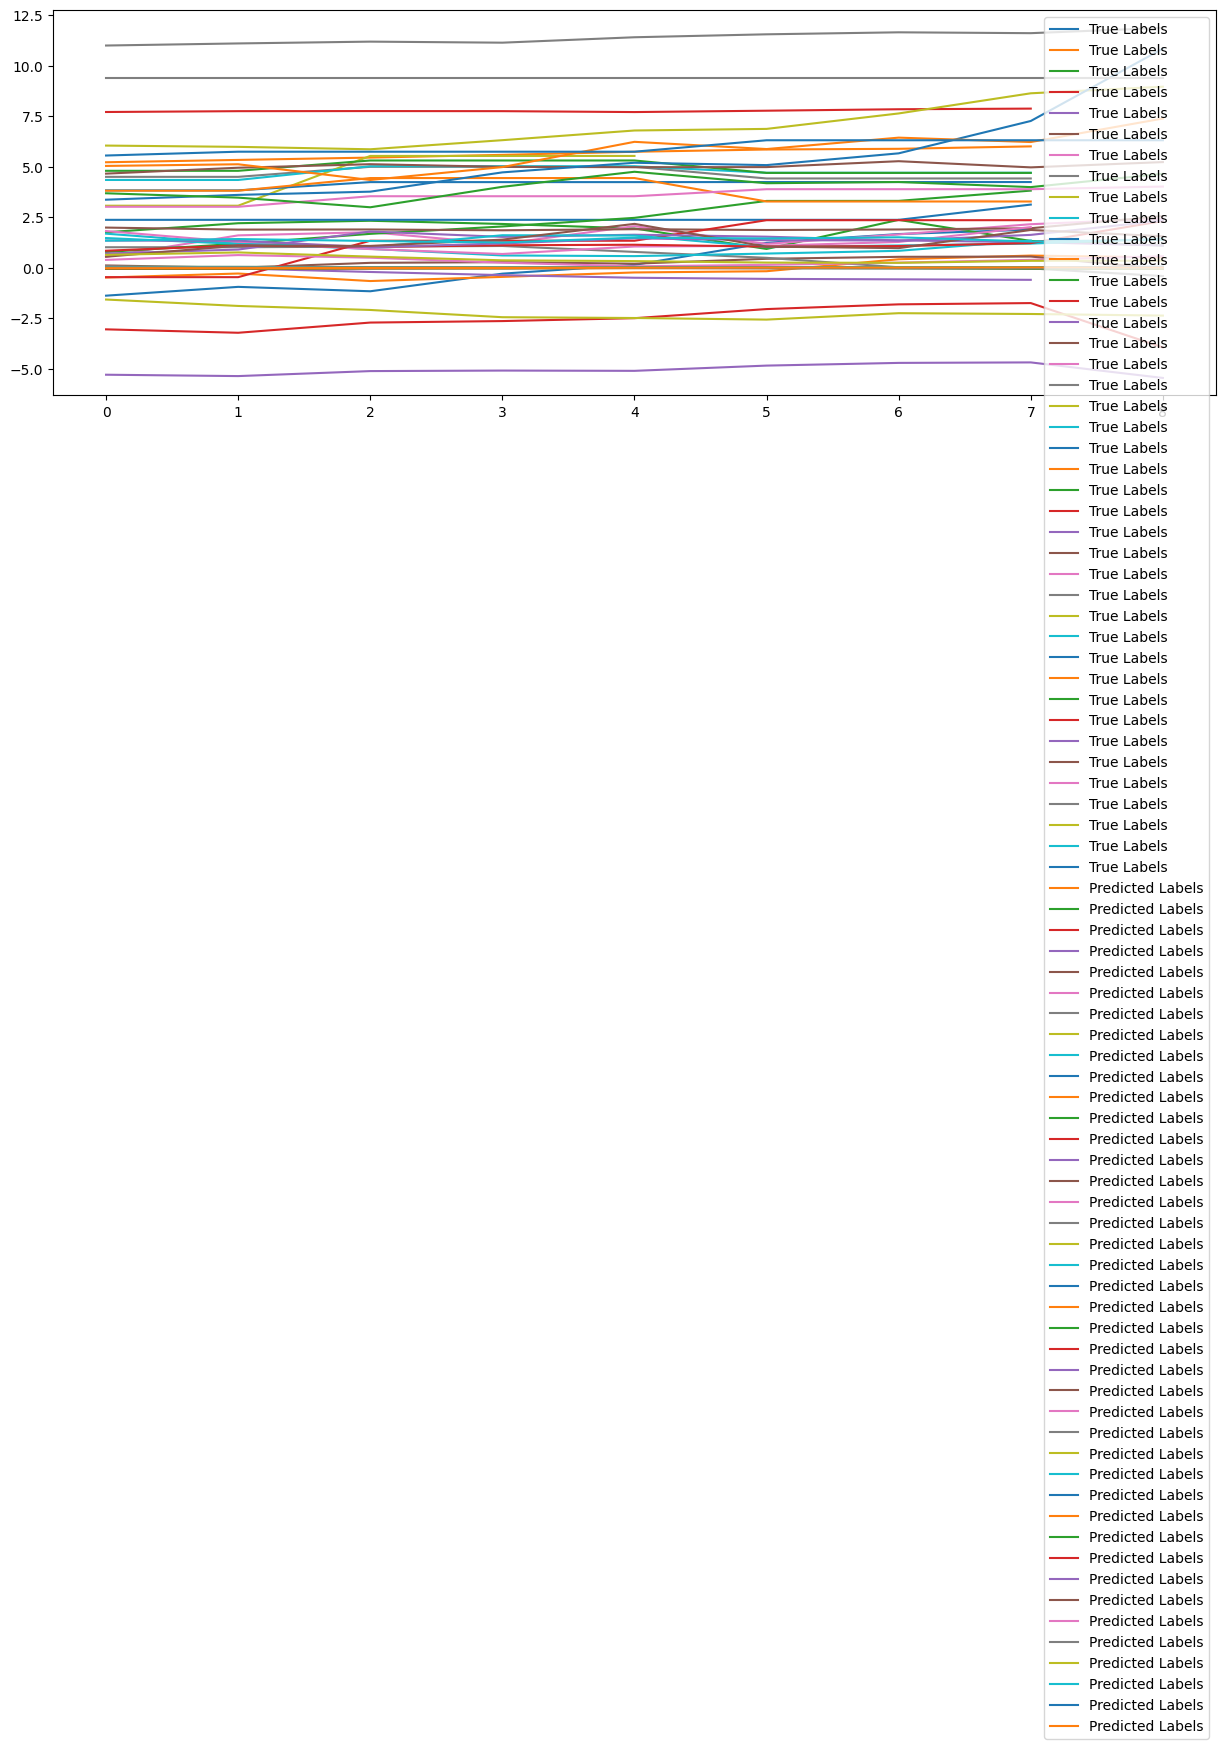

In [60]:
# Plot the predicted and true labels
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
plt.plot(y_test, label='True Labels')
plt.plot(y_pred, label='Predicted Labels')
plt.legend()
plt.show()

## step 9. 模型預測

- https://github.com/sarikayamehmet/cnn-bilstm-attention/blob/master/Cnn_bilstm_attention.ipynb

In [61]:
#Step 9
#Evaluate the model on the 1, 3, 7 Days to Forecast
import numpy as np

X_one   = np.array(X_test[:1], dtype=np.float32)
X_three = np.array(X_test[:3], dtype=np.float32)
X_five = np.array(X_test[:5], dtype=np.float32)

y_one   = np.array(y_test[:1], dtype=np.float32)
y_three = np.array(y_test[:3], dtype=np.float32)
y_five = np.array(y_test[:5], dtype=np.float32)

print("1 Day to Forecast")
test_loss, test_rmse, test_cc = model.evaluate(X_one, y_one)
y_pred_one = model.predict(X_one)


print("3 Days to Forecast")
test_loss, test_rmse, test_cc = model.evaluate(X_three, y_three)
y_pred_three = model.predict(X_three)

print("5 Days to Forecast")
test_loss, test_rmse, test_cc = model.evaluate(X_five, y_five)
y_pred_five = model.predict(X_five)

1 Day to Forecast
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - cc: 0.0000e+00 - loss: 2.4868 - root_mean_squared_error: 3.8762
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 771ms/step
3 Days to Forecast
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - cc: 1.6913e-05 - loss: 2.5701 - root_mean_squared_error: 3.9494
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
5 Days to Forecast
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - cc: 3.9664e-04 - loss: 2.6650 - root_mean_squared_error: 4.0476
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


In [62]:
#Step 10
#Inverse from scaled data
# inv_pred_one = scaler.inverse_transform(y_pred_one).flatten()
# inv_one      = scaler.inverse_transform(y_one).flatten()

# inv_pred_three = scaler.inverse_transform(y_pred_three).flatten()
# inv_three      = scaler.inverse_transform(y_three).flatten()

# inv_pred_five = scaler.inverse_transform(y_pred_five).flatten()
# inv_five      = scaler.inverse_transform(y_five).flatten()

inv_pred_one = scaler.inverse_transform(y_pred_one.reshape(-1, 1)).flatten()
inv_one = scaler.inverse_transform(y_one.reshape(-1, 1)).flatten()

inv_pred_three = scaler.inverse_transform(y_pred_three.reshape(-1, 1)).flatten()
inv_three = scaler.inverse_transform(y_three.reshape(-1, 1)).flatten()

inv_pred_five = scaler.inverse_transform(y_pred_five.reshape(-1, 1)).flatten()
inv_five = scaler.inverse_transform(y_five.reshape(-1, 1)).flatten()


#Copy data date
viz_one   = one_day_date.copy()
viz_three = three_day_date.copy()
viz_five = five_day_date.copy()

#Join true and predicted data
viz_one['load_pred'] = inv_pred_one
viz_one['load_true'] = inv_one

viz_three['load_pred'] = inv_pred_three
viz_three['load_true'] = inv_three

viz_five['load_pred'] = inv_pred_five
viz_five['load_true'] = inv_five

viz_one.index = range(1, 42)
viz_three.index = range(1, 42)
viz_five.index = range(1, 42)

ValueError: non-broadcastable output operand with shape (41,1) doesn't match the broadcast shape (41,41)

In [ ]:
# 假設 y_pred_one, y_one, y_pred_three, y_three, y_pred_five, y_five 是多變量數據
# 確保它們的形狀是 (41, n_features)

# Inverse from scaled data
inv_pred_one = scaler.inverse_transform(y_pred_one)
inv_one = scaler.inverse_transform(y_one)

inv_pred_three = scaler.inverse_transform(y_pred_three)
inv_three = scaler.inverse_transform(y_three)

inv_pred_five = scaler.inverse_transform(y_pred_five)
inv_five = scaler.inverse_transform(y_five)

# Copy data date
viz_one = one_day_date.copy()
viz_three = three_day_date.copy()
viz_five = five_day_date.copy()

# 確保 inv_pred_one, inv_one, inv_pred_three, inv_three, inv_pred_five, inv_five 是 DataFrame 並且有適當的列名
# 如果它們不是 DataFrame，則將它們轉換為 DataFrame，並設定適當的列名
inv_pred_one_df = pd.DataFrame(inv_pred_one, columns=['pred_feature1', 'pred_feature2', ...])
inv_one_df = pd.DataFrame(inv_one, columns=['true_feature1', 'true_feature2', ...])

inv_pred_three_df = pd.DataFrame(inv_pred_three, columns=['pred_feature1', 'pred_feature2', ...])
inv_three_df = pd.DataFrame(inv_three, columns=['true_feature1', 'true_feature2', ...])

inv_pred_five_df = pd.DataFrame(inv_pred_five, columns=['pred_feature1', 'pred_feature2', ...])
inv_five_df = pd.DataFrame(inv_five, columns=['true_feature1', 'true_feature2', ...])

# Join true and predicted data
viz_one = pd.concat([viz_one, inv_pred_one_df, inv_one_df], axis=1)
viz_three = pd.concat([viz_three, inv_pred_three_df, inv_three_df], axis=1)
viz_five = pd.concat([viz_five, inv_pred_five_df, inv_five_df], axis=1)

# Set index
viz_one.index = range(1, len(viz_one) + 1)
viz_three.index = range(1, len(viz_three) + 1)
viz_five.index = range(1, len(viz_five) + 1)


ValueError: Shape of passed values is (1, 41), indices imply (1, 3)

In [ ]:
print(f"Shape of inv_pred_one: {inv_pred_one.shape}")
print(f"Shape of inv_one: {inv_one.shape}")
print(f"Shape of inv_pred_three: {inv_pred_three.shape}")
print(f"Shape of inv_three: {inv_three.shape}")
print(f"Shape of inv_pred_five: {inv_pred_five.shape}")
print(f"Shape of inv_five: {inv_five.shape}")


Shape of inv_pred_one: (1, 41)
Shape of inv_one: (1, 41)
Shape of inv_pred_three: (3, 41)
Shape of inv_three: (3, 41)
Shape of inv_pred_five: (5, 41)
Shape of inv_five: (5, 41)


In [ ]:
import numpy as np
import pandas as pd

# Inverse from scaled data
inv_pred_one = scaler.inverse_transform(y_pred_one)
inv_one = scaler.inverse_transform(y_one)

inv_pred_three = scaler.inverse_transform(y_pred_three)
inv_three = scaler.inverse_transform(y_three)

inv_pred_five = scaler.inverse_transform(y_pred_five)
inv_five = scaler.inverse_transform(y_five)

# Copy data date
viz_one = one_day_date.copy()
viz_three = three_day_date.copy()
viz_five = five_day_date.copy()

# 確保 inv_pred_one, inv_one, inv_pred_three, inv_three, inv_pred_five, inv_five 是 DataFrame 並且有適當的列名
n_features = inv_pred_one.shape[1]  # 獲取特徵數量
columns_pred = [f'pred_feature{i+1}' for i in range(n_features)]
columns_true = [f'true_feature{i+1}' for i in range(n_features)]

# 如果它們不是 DataFrame，則將它們轉換為 DataFrame，並設定適當的列名
inv_pred_one_df = pd.DataFrame(inv_pred_one, columns=columns_pred)
inv_one_df = pd.DataFrame(inv_one, columns=columns_true)

inv_pred_three_df = pd.DataFrame(inv_pred_three, columns=columns_pred)
inv_three_df = pd.DataFrame(inv_three, columns=columns_true)

inv_pred_five_df = pd.DataFrame(inv_pred_five, columns=columns_pred)
inv_five_df = pd.DataFrame(inv_five, columns=columns_true)

# Join true and predicted data
viz_one = pd.concat([viz_one.reset_index(drop=True), inv_pred_one_df, inv_one_df], axis=1)
viz_three = pd.concat([viz_three.reset_index(drop=True), inv_pred_three_df, inv_three_df], axis=1)
viz_five = pd.concat([viz_five.reset_index(drop=True), inv_pred_five_df, inv_five_df], axis=1)

# Set index
viz_one.index = range(1, len(viz_one) + 1)
viz_three.index = range(1, len(viz_three) + 1)
viz_five.index = range(1, len(viz_five) + 1)

# 打印結果以確認
print(viz_one.head())
print(viz_three.head())
print(viz_five.head())


         date  pred_feature1  pred_feature2  pred_feature3  pred_feature4  \
1  2022-05-31      21.631702      48.956211       1.122426      81.742477   

   pred_feature5  pred_feature6  pred_feature7  pred_feature8  pred_feature9  \
1     105.107719      79.104767       3.698182       1.070138       3.934071   

   ...  true_feature32  true_feature33  true_feature34  true_feature35  \
1  ...      139.020004      136.149994         2128.25          8312.5   

   true_feature36  true_feature37  true_feature38  true_feature39  \
1         1365.25       86.489998           169.5       32.275002   

   true_feature40  true_feature41  
1         20500.0          2600.0  

[1 rows x 83 columns]
         date  pred_feature1  pred_feature2  pred_feature3  pred_feature4  \
1  2022-05-31      21.631702      48.956211       1.122426      81.742477   
2  2022-06-30      21.572378      48.888866       1.103713      81.721298   
3  2022-07-31      21.521358      48.830925       1.082894      81.695

In [ ]:
https://github.com/JeCase/LoadElectricity_Forecasting_CNN-BiLSTM-Attention/blob/main/Forecasting_CNN-BiLSTM.ipynb

SyntaxError: invalid syntax (3757924269.py, line 1)

# 時間序列模型概念

> [一維卷積層（1D Convolutional Layer）](https://chih-sheng-huang821.medium.com/%E5%8D%B7%E7%A9%8D%E7%A5%9E%E7%B6%93%E7%B6%B2%E8%B7%AF-convolutional-neural-network-cnn-1-1%E5%8D%B7%E7%A9%8D%E8%A8%88%E7%AE%97%E5%9C%A8%E5%81%9A%E4%BB%80%E9%BA%BC-7d7ebfe34b8)

> https://github.com/AkashSahlot/CNN-model/blob/main/Convolutional_Neural_Network_model.py




## 符合 CNN 的資料型態



>**( num_samples,  timesteps,  num_features )**



> **數據形狀轉換的過程**

* 選擇目標變量：

  希望預測的是房價或與房價相關的指標。<br></br>
* 選擇特徵變量（num_features）：

  這是每個時間步中包含的特徵數，選擇用於預測的特徵，例如經濟指標、房屋特徵等。<br></br>
* 確定時間步長（timesteps）：

  這是每個輸入樣本中包含的時間步數，例如你想用多少天、月或年的數據來預測下一個值。<br></br>
  決定每個樣本包含多少個時間步。例如，如果每個樣本包含過去12個月的數據，則時間步長為12。<br></br>
* 轉換數據形狀（num_samples）：

  這是整個數據集中可以劃分出多少個輸入樣本。將數據轉換為 (num_samples, timesteps, num_features) 的形狀。<br></br>

### 觀察資料

In [ ]:
df.head(1)

date  EA1101  EB0312  EB0911   EB18   EB21   EB22     EC06    EC07  \
0  2011-01-31    34.0    28.8  1.0978  86.78  95.85  89.85  19.6966  2.4085   

   LA07  ...  航運業(TSE26)收盤  鋼鐵(TSE20)收盤  倫敦鋁現貨價  倫敦高級銅極現貨價  巴拿馬型貨櫃運費指數  \
0  4.64  ...        123.49        120.7  2450.3     9560.9      1738.2   

   杜拜輕原油現貨價  水泥50kg北區台泥  無鉛汽油95   竹節鋼筋_南  預拌混凝土3000磅台北  
0     91.67       151.5    31.6  21260.0        1815.0  

[1 rows x 42 columns]

In [ ]:
df.tail(1)

date  EA1101  EB0312  EB0911   EB18   EB21  EB22     EC06   EC07  \
159  2024-04-30     NaN    55.2  1.9503  63.37  64.72  79.6  30.9222  0.837   

     LA07  ...  航運業(TSE26)收盤  鋼鐵(TSE20)收盤   倫敦鋁現貨價  倫敦高級銅極現貨價  巴拿馬型貨櫃運費指數  \
159  3.36  ...        169.39       145.65  2509.75     9554.5      1800.5   

     杜拜輕原油現貨價  水泥50kg北區台泥  無鉛汽油95   竹節鋼筋_南  預拌混凝土3000磅台北  
159     91.32       169.5   31.05  20600.0        2700.0  

[1 rows x 42 columns]

In [ ]:
df.columns

Index(['date', 'EA1101', 'EB0312', 'EB0911', 'EB18', 'EB21', 'EB22', 'EC06',
       'EC07', 'LA07', 'MA1501', 'MB65', 'MC31', 'MC31G', 'MC36', 'MC36G',
       'MO30', 'MP101G', 'NA0101', 'NA1005', 'NB0101', 'NC0117', 'NC0118',
       'NE0206', 'NE0812', 'OC08G', 'PA0120', 'PA1205', 'PE0503', 'TSE收盤',
       '水泥(TSE11)收盤', '建材營造(TSE25)收盤', '航運業(TSE26)收盤', '鋼鐵(TSE20)收盤', '倫敦鋁現貨價',
       '倫敦高級銅極現貨價', '巴拿馬型貨櫃運費指數', '杜拜輕原油現貨價', '水泥50kg北區台泥', '無鉛汽油95', '竹節鋼筋_南',
       '預拌混凝土3000磅台北'],
      dtype='object')

In [ ]:
df.index

RangeIndex(start=0, stop=160, step=1)

> 空缺值的比例

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 42 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           160 non-null    object 
 1   EA1101         159 non-null    float64
 2   EB0312         160 non-null    float64
 3   EB0911         160 non-null    float64
 4   EB18           160 non-null    float64
 5   EB21           160 non-null    float64
 6   EB22           160 non-null    float64
 7   EC06           160 non-null    float64
 8   EC07           160 non-null    float64
 9   LA07           160 non-null    float64
 10  MA1501         159 non-null    float64
 11  MB65           159 non-null    float64
 12  MC31           159 non-null    float64
 13  MC31G          159 non-null    float64
 14  MC36           159 non-null    float64
 15  MC36G          159 non-null    float64
 16  MO30           160 non-null    float64
 17  MP101G         159 non-null    float64
 18  NA0101    

> 檢查是否有離群值

In [ ]:
df.describe()

EA1101      EB0312      EB0911        EB18        EB21        EB22  \
count  159.000000  160.000000  160.000000  160.000000  160.000000  160.000000   
mean    22.710692   49.083125    1.267679   77.850188   93.548625   81.042750   
std      7.060629   13.462411    1.115552    7.421740   18.796058    6.242432   
min     10.000000   24.800000   -1.209500   59.120000   61.100000   69.850000   
25%     18.000000   37.900000    0.409475   73.147500   70.370000   76.075000   
50%     22.000000   51.750000    1.307550   78.490000  101.750000   81.480000   
75%     26.500000   60.150000    2.040950   83.637500  108.075000   85.875000   
max     41.000000   79.000000    3.588300   92.930000  115.850000   93.850000   

             EC06        EC07        LA07      MA1501  ...  航運業(TSE26)收盤  \
count  160.000000  160.000000  160.000000  159.000000  ...    160.000000   
mean     7.367804    0.802936    3.879125    5.416294  ...    102.251688   
std     16.019311    0.719559    0.289481    1.638121  ...     59.122538   
min    -23.768500   -1.564400    3.310000    2.915700  ...     49.250000   
25%     -4.900425    0.567275    3.670000    3.901500  ...     65.607500   
50%      8.781750    0.817600    3.825000    5.415700  ...     76.475000   
75%     16.010500    1.141200    4.080000    6.525800  ...    110.627500   
max     69.252500    2.645000    4.800000    9.226100  ...    366.570000   

       鋼鐵(TSE20)收盤       倫敦鋁現貨價    倫敦高級銅極現貨價   巴拿馬型貨櫃運費指數    杜拜輕原油現貨價  \
count   160.000000   160.000000    160.00000   160.000000  160.000000   
mean    112.328875  2038.566458   7186.15724  1399.732292   75.964798   
std      26.303727   373.783571   1485.17157   710.434636   24.884264   
min      72.320000  1459.000000   4501.70000   331.500000   27.855000   
25%      98.232500  1773.531250   5967.47500   901.187500   55.229375   
50%     103.000000  1987.062500   7048.30000  1300.250000   73.775000   
75%     121.160000  2226.281250   8312.87500  1693.850000  102.258625   
max     205.410000  3571.625000  10285.00000  4029.200000  122.132000   

       水泥50kg北區台泥      無鉛汽油95        竹節鋼筋_南  預拌混凝土3000磅台北  
count  160.000000  160.000000    160.000000    160.000000  
mean   159.742656   29.449203  18091.895833   1981.685417  
std      8.521310    3.950802   3139.739501    250.499318  
min    151.500000   19.100000  11050.000000   1680.000000  
25%    156.500000   26.493750  15850.000000   1784.375000  
50%    156.500000   30.226250  18050.000000   1902.500000  
75%    156.500000   32.011250  20525.000000   2056.250000  
max    190.500000   36.060000  26020.000000   2700.000000  

[8 rows x 41 columns]

### 載入套件

In [ ]:
# !pip install scikit-learn -q
# !pip install matplotlib -q
# !pip install seaborn -q
# !pip install missingno -q
# !pip install tensorflow
# !pip install pathlib2
# dl(Python 3.10.14)

> 確保 Python 環境與你安裝套件的環境一致

In [ ]:
import sys
print(sys.executable)

# 在 terminal 查看 python 版本
# python --version

c:\Users\student\anaconda3\envs\dl\python.exe


> 查看安裝套件的版本

In [ ]:
import matplotlib
print(matplotlib.__version__)

3.9.0


> 導入套件

In [ ]:
import pandas as pd
import numpy as np
import random
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.impute import SimpleImputer

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import scale
from os.path import join
from sklearn.metrics import accuracy_score as accuracy, f1_score, mean_absolute_error as mae
import os
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPool2D
from pathlib2 import Path
from tensorflow.keras import backend as K, callbacks
import tensorflow as tf
import tensorflow.keras as keras

## 特徵工程

> 特徵理解：我的資料集裡面有什麼？

> 特徵改進：清洗資料集

> 特徵選擇：對壞屬性說不

> 特徵建構：我們能建置全新的特徵嗎？

> 特徵轉換：數學登場囉！

> 特徵學習：以AI促進AI


### 設定特徵和標籤

In [ ]:
# 選擇目標變量
# 單位: 百萬元 NTD
target = 'total_price'  # 假設 'price' 是目標變量

# X = res_minmax.iloc[:, 0:13].values
X = df.iloc[:, 0:13].values
y = df.iloc[:, 13].values.reshape(-1,1) # 轉換成1個column

# 分割訓練和測試
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25)

print(f"Shape of X_train:{X_train.shape}")
print(f"Shape of X_test:{X_test.shape}")
print(f"Shape of y_train:{y_train.shape}")
print(f"Shape of y_test{y_test.shape}")

Shape of X_train:(112, 13)
Shape of X_test:(48, 13)
Shape of y_train:(112, 1)
Shape of y_test(48, 1)


### ETL

#### 缺失值填補

> 1. df.fillna() ⮕ 指定值、平均值或中位數填補。

> 2. df.interpolate() ⮕ 根據數據的趨勢進行插值填充，適用於連續性數據。

> 3. df.replace() ⮕ 將指定的空缺值替換為其他值。

> 4. def fill_na_with_something(column) ⮕ 自定義函數填補缺失值。

In [ ]:
# 對類別變數的所有值進行計數
from collections import Counter
sorted(Counter(df['total_price']).keys())

KeyError: 'total_price'

> 觀察原始資料的缺失值

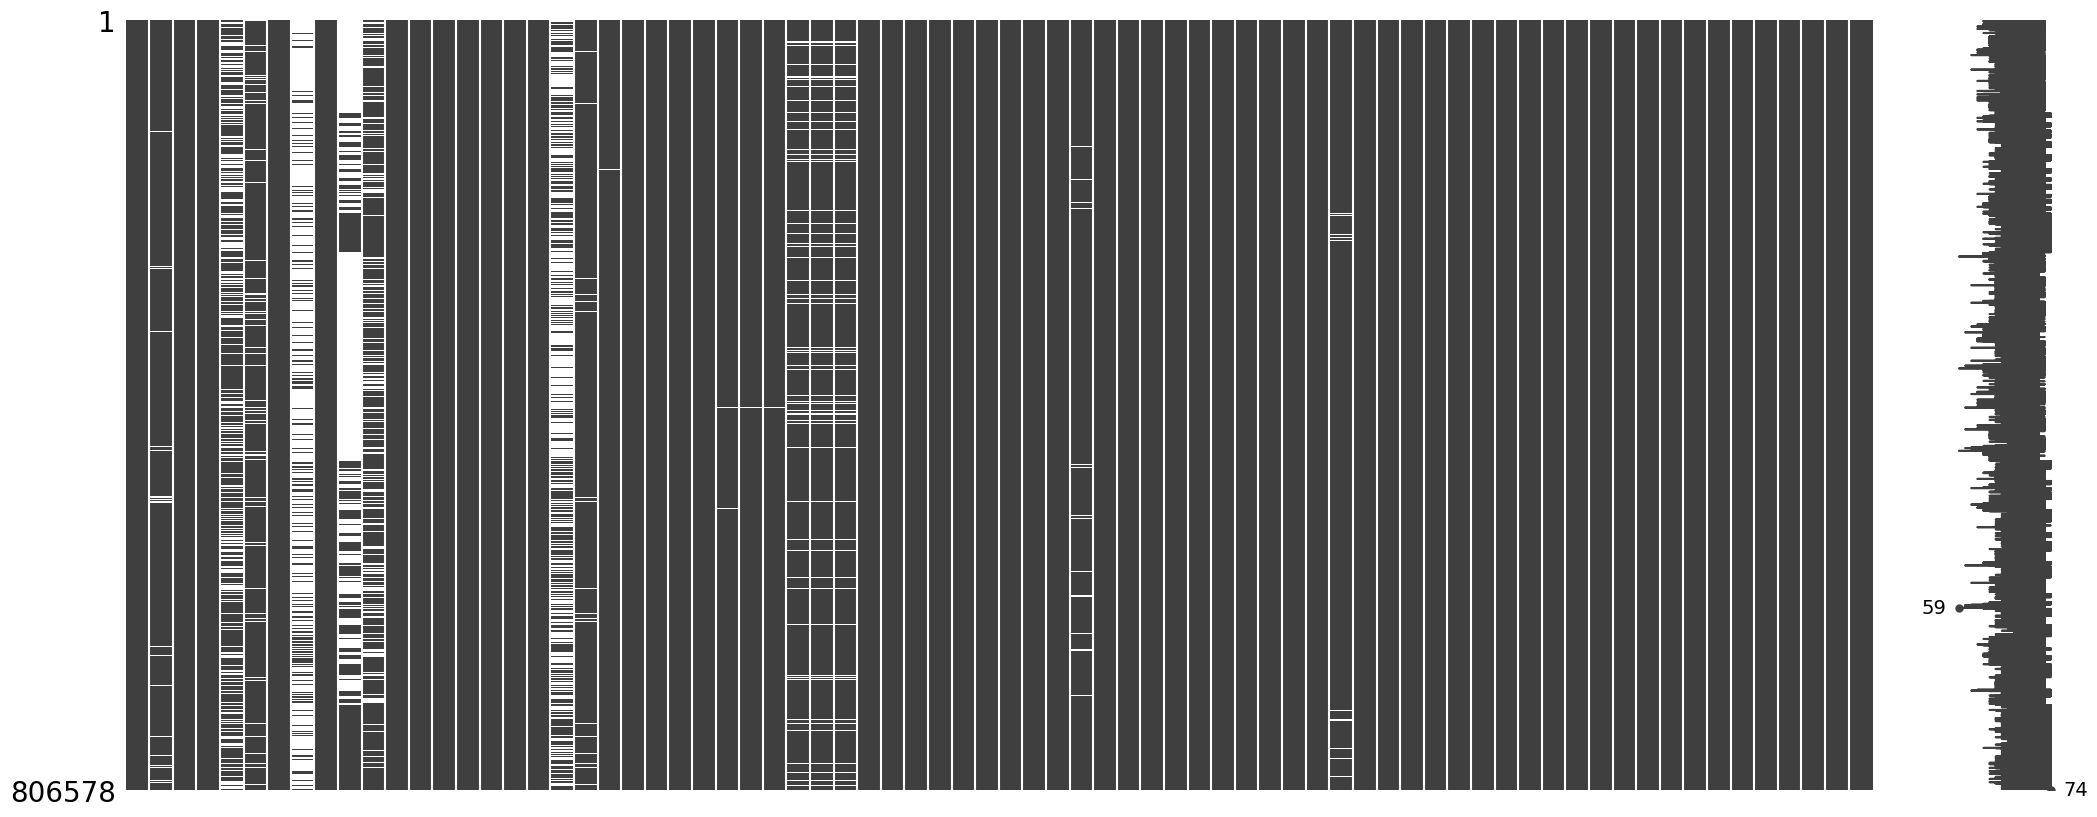

In [ ]:
# msno.bar(df)  # 繪製缺失值的條形圖
# plt.show()  # 顯示圖表
msno.matrix(df)  # 繪製缺失值的矩陣圖
plt.show()  # 顯示圖表

<Axes: >

c:\Users\student\anaconda3\envs\dl\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 25910 (\N{CJK UNIFIED IDEOGRAPH-6536}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\student\anaconda3\envs\dl\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 30436 (\N{CJK UNIFIED IDEOGRAPH-76E4}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\student\anaconda3\envs\dl\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 27700 (\N{CJK UNIFIED IDEOGRAPH-6C34}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\student\anaconda3\envs\dl\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 27877 (\N{CJK UNIFIED IDEOGRAPH-6CE5}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\student\anaconda3\envs\dl\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 24314 (\N{CJK UNIFIED IDEOGRAPH-5EFA}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\student\ana

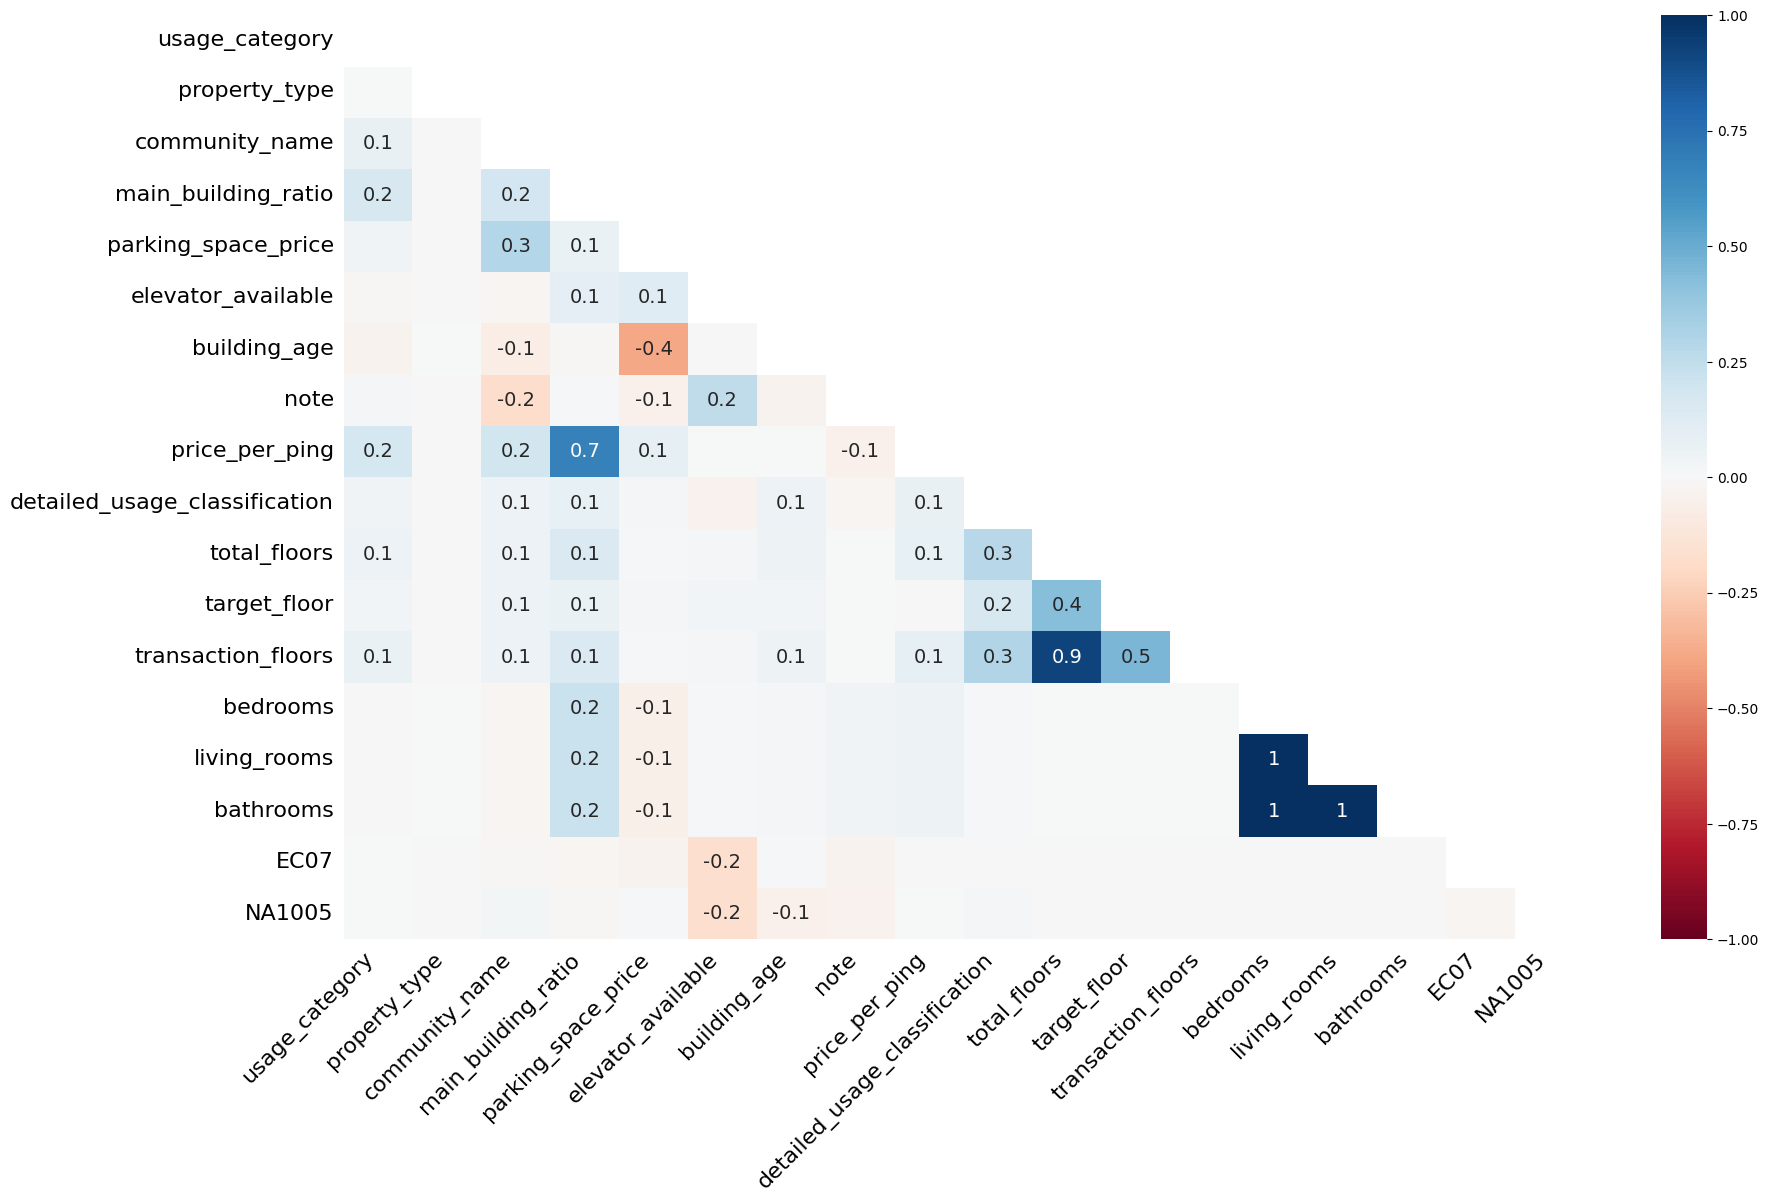

c:\Users\student\anaconda3\envs\dl\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25910 (\N{CJK UNIFIED IDEOGRAPH-6536}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\student\anaconda3\envs\dl\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 30436 (\N{CJK UNIFIED IDEOGRAPH-76E4}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\student\anaconda3\envs\dl\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 27700 (\N{CJK UNIFIED IDEOGRAPH-6C34}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\student\anaconda3\envs\dl\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 27877 (\N{CJK UNIFIED IDEOGRAPH-6CE5}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\student\anaconda3\envs\dl\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24314 (\N{CJK UNIFIE

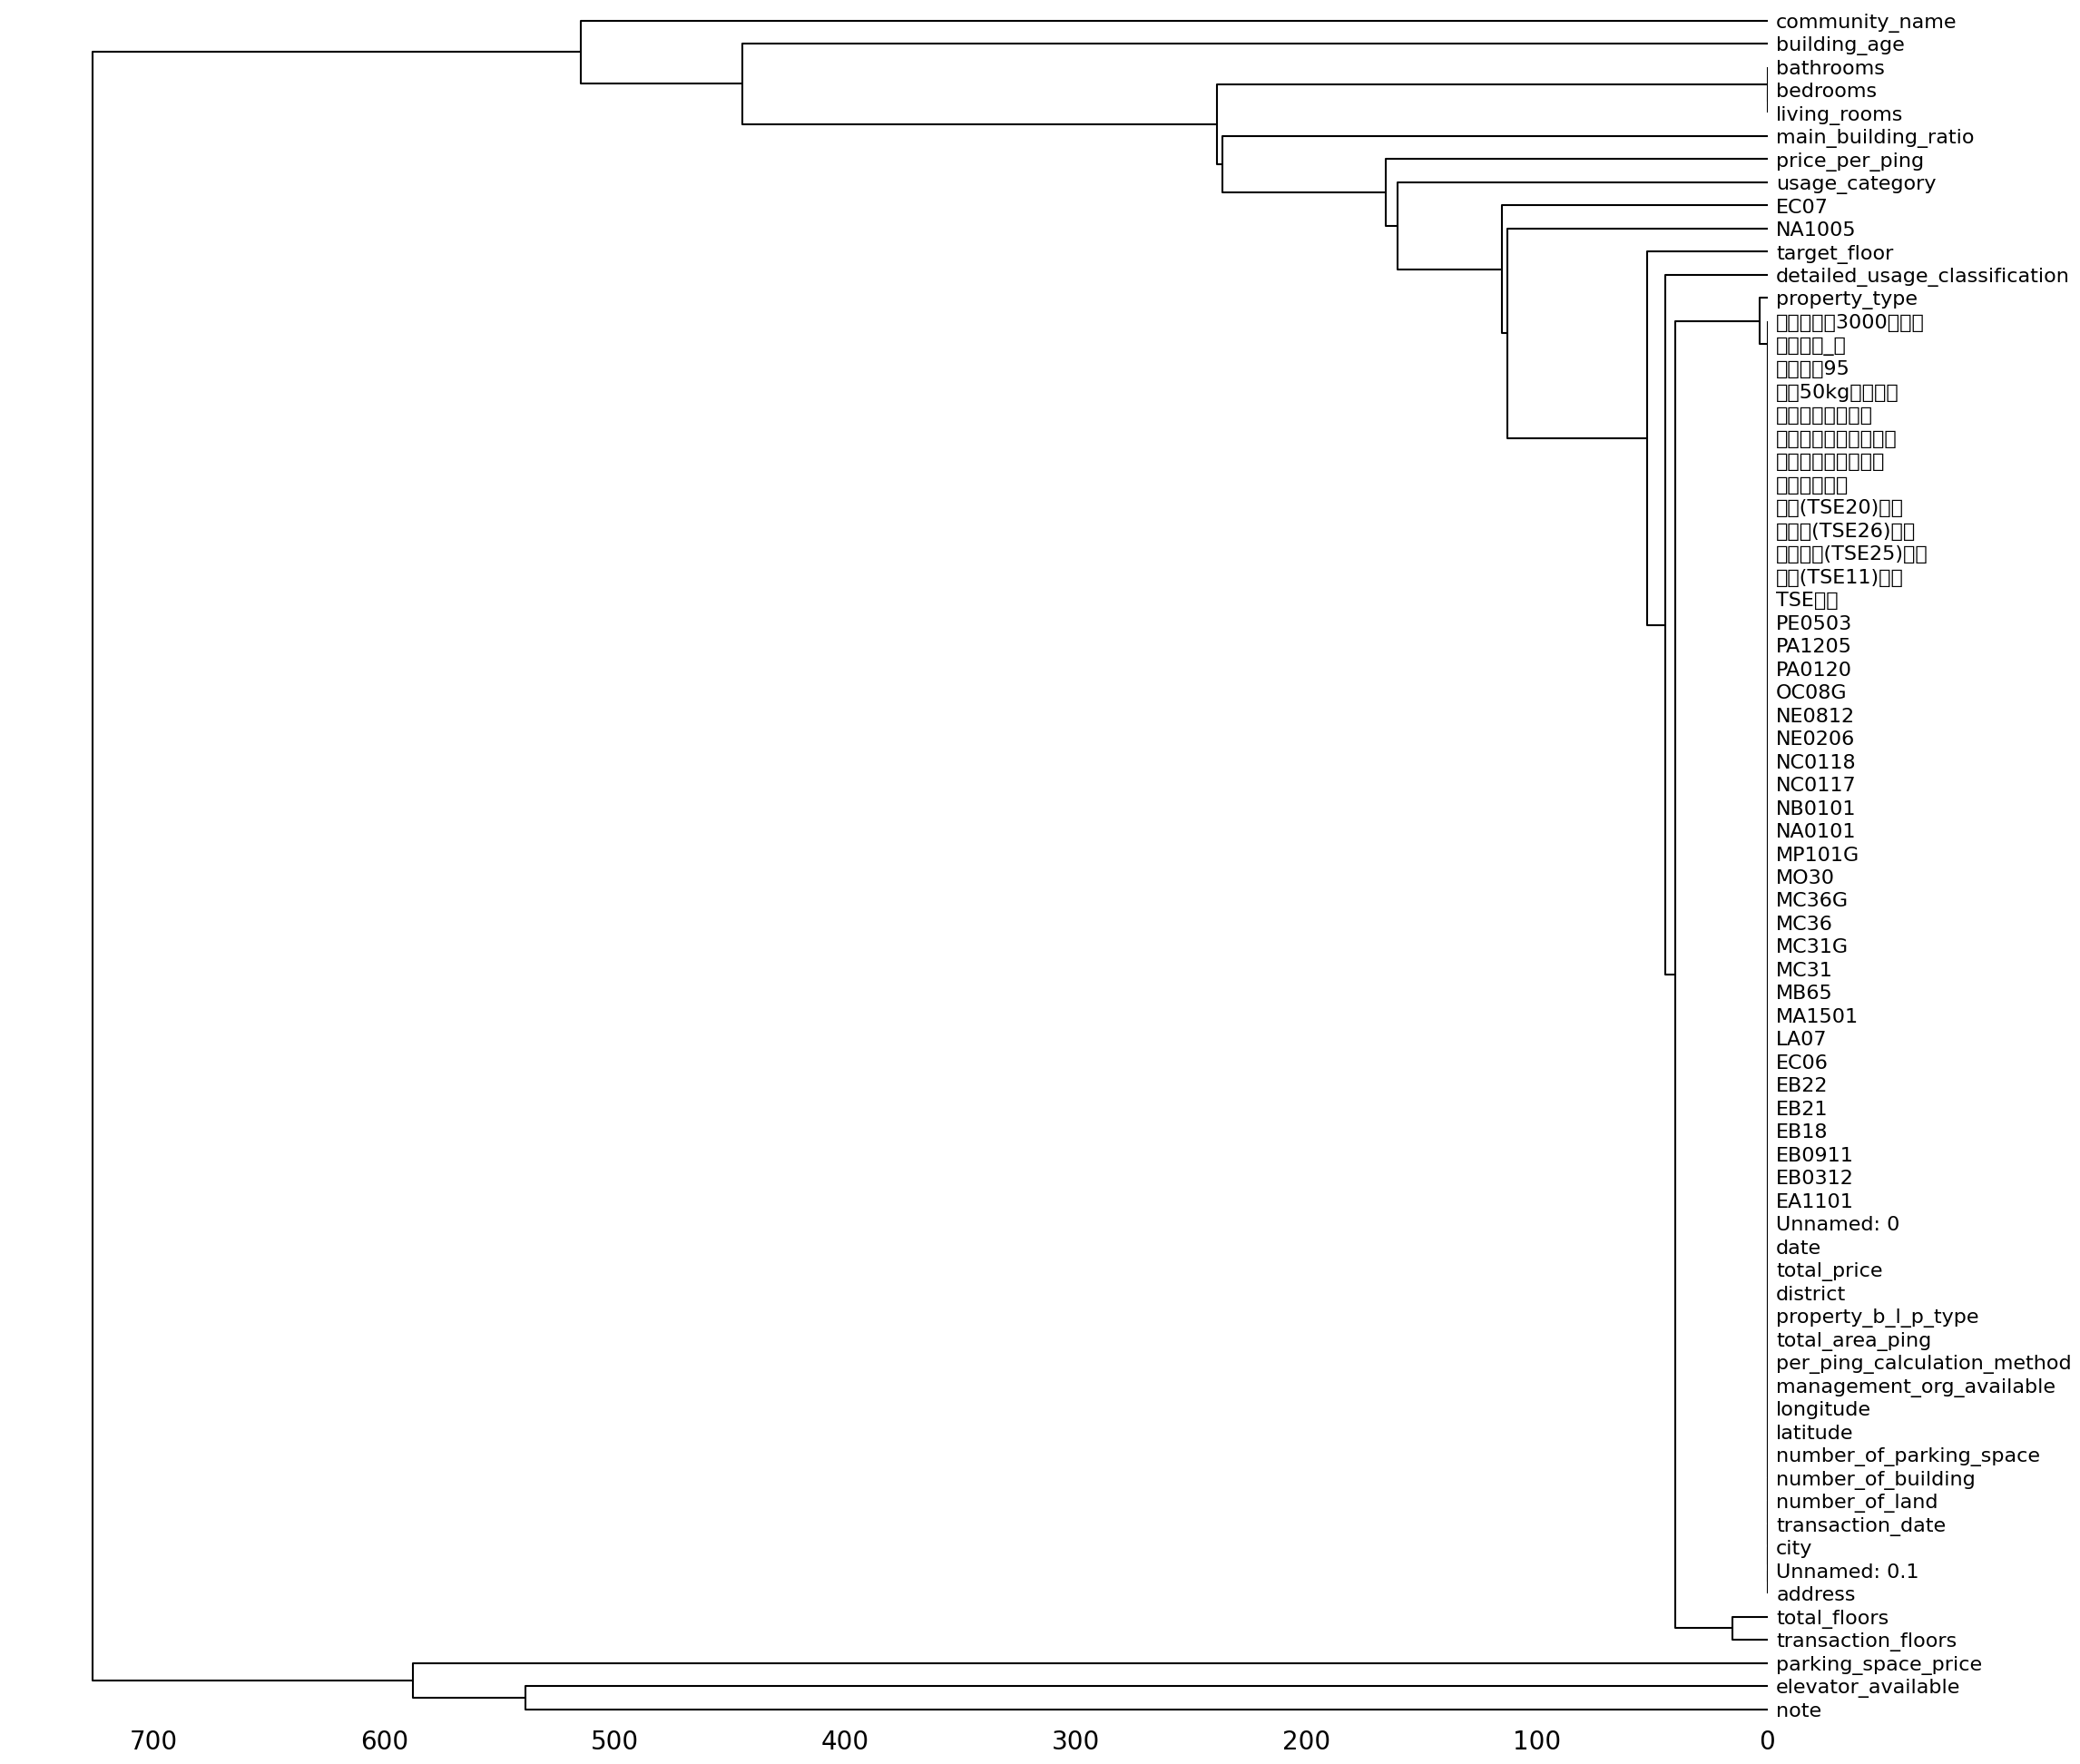

In [ ]:
# (直觀) 觀察缺失值之間的關係
msno.heatmap(df)
msno.dendrogram(df)

> 找出有 空格(NaN) 的欄位

In [ ]:
# 找出有 空格(NaN) 的欄位
nan_columns = df.isnull().any(axis=0)
nan_columns

Unnamed: 0.1      False
usage_category     True
address           False
property_type      True
community_name     True
                  ...  
杜拜輕原油現貨價          False
水泥50kg北區台泥        False
無鉛汽油95            False
竹節鋼筋_南            False
預拌混凝土3000磅台北      False
Length: 74, dtype: bool

In [ ]:
# 選擇這些欄位
# columns_with_nan = df.loc[:, nan_columns]
# print(columns_with_nan)

# 篩選出為 True 的欄位名稱
columns_with_nan = nan_columns[nan_columns].index.tolist()
print(columns_with_nan)

['usage_category', 'property_type', 'community_name', 'main_building_ratio', 'parking_space_price', 'elevator_available', 'building_age', 'note', 'price_per_ping', 'detailed_usage_classification', 'total_floors', 'target_floor', 'transaction_floors', 'bedrooms', 'living_rooms', 'bathrooms', 'EC07', 'NA1005']


> 進行補值

In [ ]:
# # 平均數補值
# df_mean = df.copy(deep=True)
# mean_imputer = SimpleImputer(strategy='mean')
# df_mean.loc[:, :] = mean_imputer.fit_transform(df_mean)

In [ ]:
# 插值法補值
df_interpolated = df.copy(deep=True)
df_interpolated = df_interpolated.interpolate(method='linear')

C:\Users\student\AppData\Local\Temp\ipykernel_9320\1115431455.py:3: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_interpolated = df_interpolated.interpolate(method='linear')


> 查看補值後的資料狀況

<Axes: >

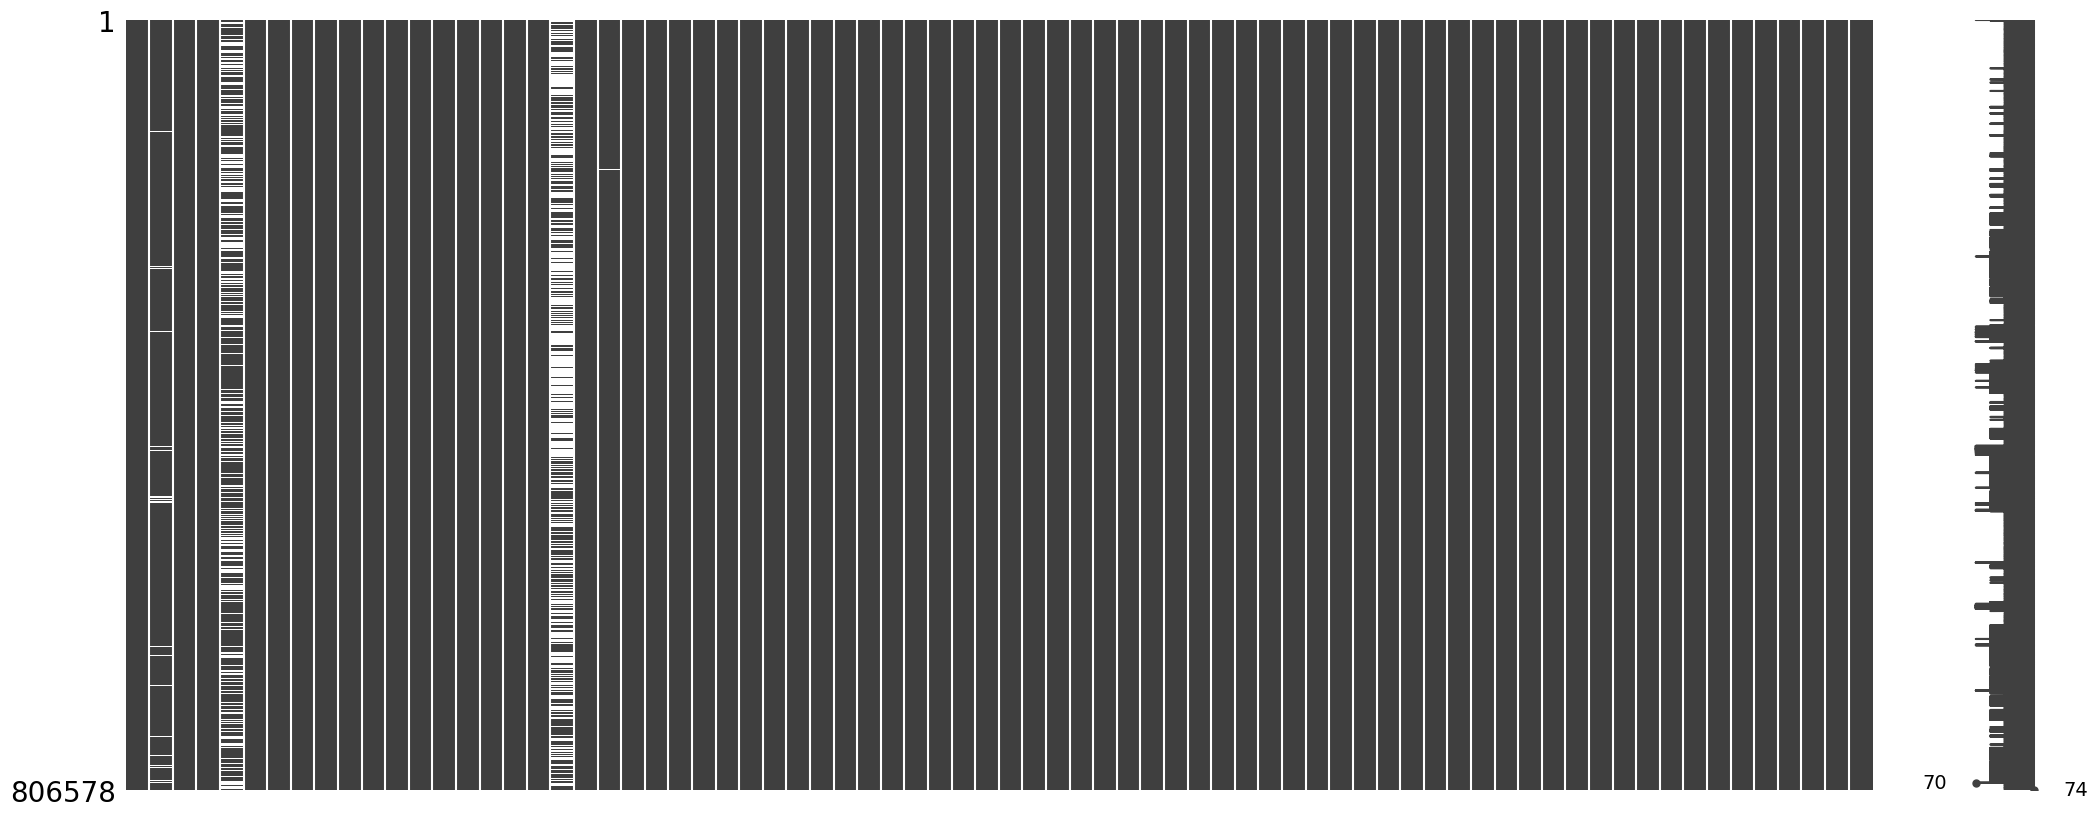

In [ ]:
df_interpolated
msno.matrix(df_interpolated)

In [ ]:
# 再次查看有 空格(NaN) 的欄位
nan_columns = df_interpolated.isnull().any(axis=0)
columns_with_nan = nan_columns[nan_columns].index.tolist()
print(columns_with_nan)

['usage_category', 'property_type', 'community_name', 'parking_space_price', 'elevator_available', 'note', 'detailed_usage_classification']


In [ ]:
# 補植完後的資料
# 找出資料類型為 object 的欄位
object_columns = df_interpolated.select_dtypes(include=['object']).columns.tolist()
print(object_columns)

['usage_category', 'address', 'property_type', 'community_name', 'city', 'transaction_date', 'per_ping_calculation_method', 'note', 'detailed_usage_classification', 'property_b_l_p_type', 'district', 'date']


> 02 小結

> 補值:

> 再補一次值

> 彙整前的 def

C:\Users\student\AppData\Local\Temp\ipykernel_9320\4264101436.py:7: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  return column.interpolate(method='linear')


DataFrame after filling specific columns:

Object columns: ['usage_category', 'address', 'property_type', 'community_name', 'city', 'transaction_date', 'per_ping_calculation_method', 'note', 'detailed_usage_classification', 'property_b_l_p_type', 'district', 'date']


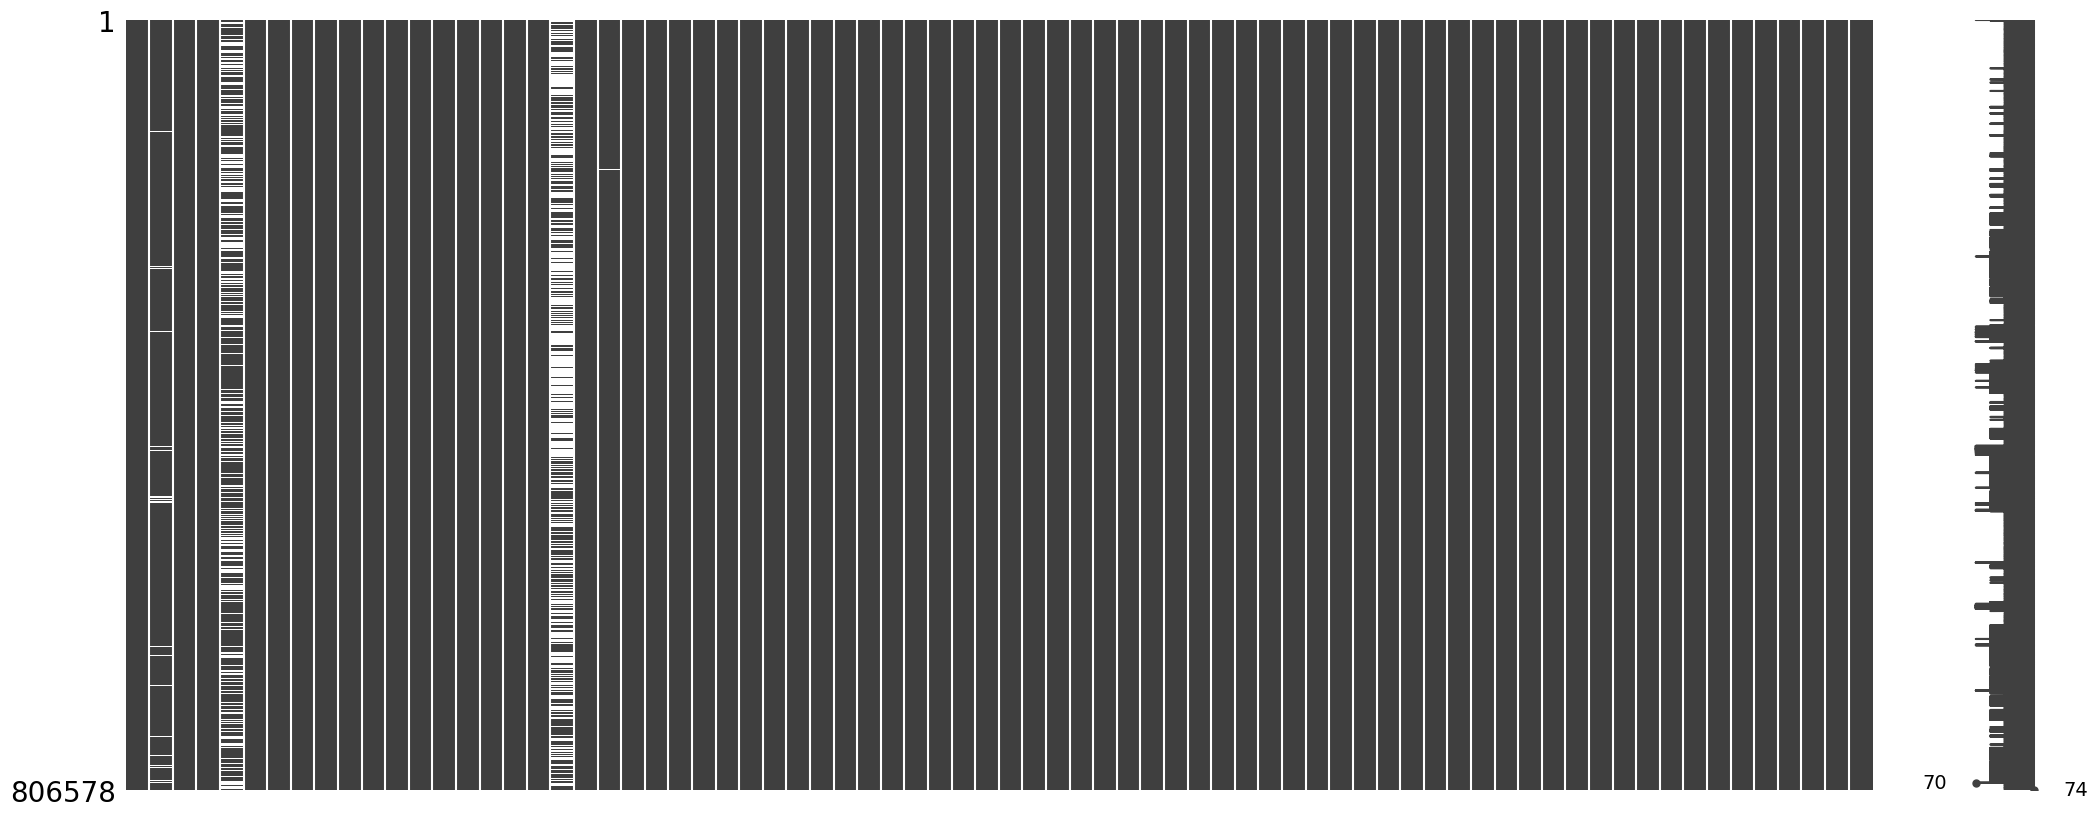

In [ ]:
# # 建立一個新的 DataFrame，作為原始 DataFrame 的副本
# df_fill_func_na = df.copy()

# # 定義另一個自定義函數來處理空缺值
# def fill_na_with_interpolated(column):
#     # 填補空缺值
#     return column.interpolate(method='linear')

# # 使用 apply 函數應用自定義函數來填補空缺值
# df_fill_func_na = df.apply(fill_na_with_interpolated)

# # 顯示處理後的 DataFrame
# print("DataFrame after filling specific columns:")
# msno.matrix(df_fill_func_na)

# # 找出資料類型為 object 的欄位
# object_columns = df_interpolated.select_dtypes(include=['object']).columns.tolist()
# print("\nObject columns:", object_columns)

### 離群值

> 找出那些欄位的 IQR > 1.5

In [ ]:
# df_interpolated
def calculate_outlier_ratios(df_interpolated):
    # 初始化一個空的列表，用於存儲每個列的離群值比例數據
    outlier_ratios = []

    # 初始化一個空的字典，用於存儲 IQR > 1.5 的列和其 IQR 值
    large_IQR_columns = {}

    # 遍歷DataFrame中的每一列
    for column_name in df_interpolated.columns:
        if pd.api.types.is_numeric_dtype(df_interpolated[column_name]):
            # 計算Q1和Q3
            Q1 = df_interpolated[column_name].quantile(0.25)
            Q3 = df_interpolated[column_name].quantile(0.75)

            # 計算IQR
            IQR = Q3 - Q1

            # 如果IQR大於1.5，將其存儲在字典中
            if IQR > 1.5:
                large_IQR_columns[column_name] = IQR

            # 定義離群值範圍
            outlier_lower = Q1 - 1.5 * IQR
            outlier_upper = Q3 + 1.5 * IQR

            # 計算離群值的數量
            outliers = df_interpolated[column_name][(df_interpolated[column_name] < outlier_lower) | (df_interpolated[column_name] > outlier_upper)]
            outlier_count = outliers.count()

            # 計算離群值比例
            outlier_ratio = outlier_count / len(df_interpolated[column_name])

            # 將結果存儲在列表中
            outlier_ratios.append({'Column': column_name, 'Outlier Ratio': outlier_ratio})

    # 將結果轉化為DataFrame
    outlier_report = pd.DataFrame(outlier_ratios)

    return outlier_report, large_IQR_columns

# calculate_outlier_ratios(df_interpolated)
# 調用函數並獲取結果
outlier_report, large_IQR_columns = calculate_outlier_ratios(df_interpolated)

# 打印結果
print("Outlier Report:")
print(outlier_report)
print("\nColumns with IQR > 1.5:")
print(large_IQR_columns)

Outlier Report:
                 Column  Outlier Ratio
0          Unnamed: 0.1       0.000000
1   main_building_ratio       0.000031
2   parking_space_price       0.088883
3    elevator_available       0.204217
4          building_age       0.000394
..                  ...            ...
57             杜拜輕原油現貨價       0.000000
58           水泥50kg北區台泥       0.224706
59               無鉛汽油95       0.000000
60               竹節鋼筋_南       0.015092
61         預拌混凝土3000磅台北       0.095567

[62 rows x 2 columns]

Columns with IQR > 1.5:
{'Unnamed: 0.1': 403288.5, 'main_building_ratio': 30.659999999999997, 'parking_space_price': 121.66666666666663, 'building_age': 24.0, 'price_per_ping': 259668.25, 'total_area_ping': 24.65, 'total_price': 11480000.0, 'total_floors': 10.0, 'target_floor': 6.0, 'Unnamed: 0': 2243.0, 'EA1101': 8.0, 'EB0312': 16.700000000000003, 'EB0911': 1.6889, 'EB18': 10.200000000000003, 'EB21': 37.47, 'EB22': 10.399999999999991, 'EC06': 17.5581, 'MA1501': 2.8067, 'MC31': 2264950.0

### 標準化

### 正則化

### 特徵選擇

選取特徵的步驟

 - 讀取數據並選擇初始特徵和目標變量。

 - 使用上述方法之一進行特徵選擇。

 - 使用選定的特徵進行模型訓練和評估。

> 1. 統計檢驗

> 2. 特徵重要性評估

使用基於樹的算法（如隨機森林）來計算每個特徵的重要性。

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# 假設 data_selected 是包含所有特徵和目標變量的 DataFrame
X = df.drop(columns=[target])
y = df[target]

# 訓練隨機森林模型
model = RandomForestRegressor()
model.fit(X, y)

# 獲取特徵重要性
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

# 打印特徵重要性
for i in range(len(features)):
    print(f"{features[indices[i]]}: {importances[indices[i]]}")

# 繪製特徵重要性圖表
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(features)), importances[indices], align="center")
plt.xticks(range(len(features)), [features[i] for i in indices], rotation=90)
plt.show()

ValueError: could not convert string to float: '住'

>3. 遞歸特徵消除（RFE）

使用遞歸特徵消除方法，從全部特徵中遞歸地選擇特徵。

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# 建立線性迴歸模型
model = LinearRegression()

# 使用 RFE 選擇特徵
rfe = RFE(model, n_features_to_select=10)
fit = rfe.fit(X, y)

# 打印選中的特徵
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

# 選中的特徵
selected_features = X.columns[fit.support_]
print(selected_features)

NameError: name 'X' is not defined

>4. 嵌入法

* 線性模型而言，有三種主要型態的regularization：

 * Lasso regression 或 L1 regularization

 * Ridge regression 或 L2 regularization

 * Elastic nets 或 L1/L2 regularization

>  (1) 使用L1正則化（Lasso）進行特徵選擇。

In [ ]:
from sklearn import model_selection
from sklearn.linear_model import Lasso

# 使用 Lasso 進行特徵選擇
model = Lasso(alpha=0.1)
model.fit(X, y)

# 打印選中的特徵
importance = np.abs(model.coef_)
selected_features = X.columns[importance > 1e-5]
print(selected_features)

>　(2) 脊迴歸(Ridge Regression)

In [ ]:
from sklearn import model_selection
from sklearn.linear_model import Ridge

# 隨機打亂樣本順序(shuffle=True, random_state=1)後，切分為十等分(n_splits=10)
kf_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)

for i, (train_index, test_index) in enumerate(kf_10.split(solTestXtrans)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

> (3) 彈性網罩懲罰模型(Elastic Nets)

In [ ]:
from sklearn import model_selection
from sklearn.linear_model import ElasticNet

# 隨機打亂樣本順序(shuffle=True, random_state=1)後，切分為十等分(n_splits=10)
kf_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)

for i, (train_index, test_index) in enumerate(kf_10.split(solTestXtrans)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")



> 使用標準化來使數據具有均值為0和方差為1的特性

> 這有助於加速模型訓練和提高性能





In [ ]:
### 5.1.3 脊迴歸、LASSO迴歸與彈性網罩懲罰模型(Ridge Regression, LASSO, and Elastic Nets)
from sklearn import model_selection
from sklearn.linear_model import Ridge, ElasticNet# Step 1

# 隨機打亂樣本順序(shuffle=True, random_state=1)後，切分為十等分(n_splits=10)
kf_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)

for i, (train_index, test_index) in enumerate(kf_10.split(solTestXtrans)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

#### Ridge Regression (調lambda或alpha)
mse = []
for i in np.linspace(start=0, stop=0.008, num=5): # i here means lambda (alpha in Python)
    rr = Ridge(alpha=i) # Step 2
    score = -1 * model_selection.cross_val_score(rr, solTrainXtrans, solTrainY, cv=kf_10, scoring='neg_mean_squared_error').mean() # All scorer objects follow the convention that [higher return values are better] than lower return values. Thus metrics which measure the distance between the model and the data, like metrics.mean_squared_error, are available as neg_mean_squared_error which return the negated value of the metric. (scikit-learn特異之處) Step 3 & 4
    mse.append(score)

plt.plot(np.sqrt(mse)) # lambda* = 0.00714286
plt.xlabel(str(np.linspace(start=0, stop=0.008, num=5)))
# Refit the Ridge model under lambda = 0.00714286, and write the regression equation you get.

min(mse)
np.linspace(start=0, stop=0.1, num=15)[mse.index(min(mse))]

rr = Ridge(alpha=0.00714286)
rr.fit(solTrainXtrans, solTrainY)
dir(rr)
rr.n_features_in_
rr.coef_
rr.intercept_
# rr.sparse_coef_ # AttributeError: 'Ridge' object has no attribute 'sparse_coef_'

rr.coef_.shape # (1, 228)
sum(rr.coef_.reshape((-1,)) != 0) # 228

ls = Lasso(alpha=0.00714286) # alpha=0.1
ls.fit(solTrainXtrans, solTrainY)
ls.n_features_in_
ls.coef_
ls.intercept_
ls.sparse_coef_ # 70 versus 6

ls.coef_.shape # (228,)
sum(ls.coef_ != 0)

#### Elastic Nets (兩個參數要調)
# Step 1
from sklearn.model_selection import GridSearchCV
# Step 2
lm_elastic = ElasticNet(max_iter = 5000)

parameters = {'alpha':[0.01, 0.05, 0.1], 'l1_ratio':np.linspace(0.05, 1, num=20)}

# Step 2
search = GridSearchCV(lm_elastic, parameters, scoring='neg_mean_squared_error', cv=10)

# Step 3
search.fit(solTrainXtrans, solTrainY)

print(search.best_score_, search.best_params_) # {'alpha': 0.01, 'l1_ratio': 0.05}
# Refit the Elastic Nets model under l'alpha': 0.01, 'l1_ratio': 0.05 and write the regression equation you get.

In [ ]:
#### 5.1.3 脊迴歸、

### 特徵建構

> 依據上述的選擇，選取特徵變數

In [ ]:
# 選擇特徵列和目標列
data_selected = df[features + [target]]

# 填補缺失值（這裡簡單用0填補，你可以根據需要進行不同的處理）
data_selected.fillna(0, inplace=True)

# 將數據轉換為 numpy 數組
data_array = data_selected.values

In [ ]:
#　目的：將時間切割成每月
import numpy as np

def create_dataset(data, timesteps):
    X, y = [], []
    for i in range(len(data) - timesteps):
        X.append(data[i:(i + timesteps), :-1])
        y.append(data[i + timesteps, -1])
    return np.array(X), np.array(y)

# 假設data是已經標準化並轉換成numpy數組的數據
# data的形狀應該是 (num_samples, num_features)
# 其中num_features中最後一列是目標變量（例如房價）

# 設定時間步長
timesteps = 30

# 創建適合CNN的數據集
X, y = create_dataset(data, timesteps)
print(X.shape)  # (num_samples, timesteps, num_features-1)
print(y.shape)  # (num_samples,)

In [ ]:
import numpy as np
import pandas as pd

# 讀取數據
file_path = '/mnt/data/first_100_rows.csv'
data = pd.read_csv(file_path, encoding='utf-8')

# 選擇需要的列（特徵和目標變量）
features = [
    '台灣國產與進口品物價指數(2021=100)-年增率-年(百分比)',
    '台灣國產與進口品物價指數-2021=100(指數)',
    '台灣國產與進口品物價指數年增率(2021=100)(百分比)',
    '台灣生產物價指數年增率-2021=100(百分比)',
    '台灣生產者物價指數PPI 2021=100(指數)',
    '台灣進口物價指數(2021=100)-年增率(百分比)',
    '進口物價年指數 EPI 2021=100 (美元計)(指數)',
    '進口物價年指數 IPI 2021=100(美元計價)(指數)',
    '香港綜合CPI 2019/10-2020/09=100(指數)'
    # 你可以選擇更多的特徵
]

# 選擇目標變量
target = 'price'  # 假設 'price' 是目標變量

# 選擇特徵列和目標列
data_selected = data[features + [target]]

# 填補缺失值（這裡簡單用0填補，你可以根據需要進行不同的處理）
data_selected.fillna(0, inplace=True)

# 將數據轉換為 numpy 數組
data_array = data_selected.values

# 設置時間步長
timesteps = 10

# 創建數據集
def create_dataset(data, timesteps):
    X, y = [], []
    for i in range(len(data) - timesteps):
        X.append(data[i:(i + timesteps), :-1])
        y.append(data[i + timesteps, -1])
    return np.array(X), np.array(y)

X, y = create_dataset(data_array, timesteps)

# 檢查數據形狀
print(X.shape)  # (num_samples, timesteps, num_features)
print(y.shape)  # (num_samples,)

### 特徵轉換

### 特徵學習

## ETL

#### 缺失值填補

> 1. df.fillna() ⮕ 指定值、平均值或中位數填補。

> 2. df.interpolate() ⮕ 根據數據的趨勢進行插值填充，適用於連續性數據。

> 3. df.replace() ⮕ 將指定的空缺值替換為其他值。

> 4. def fill_na_with_something(column) ⮕ 自定義函數填補缺失值。

In [ ]:
# 使用插值法填補缺失值
df_interpolated = df.interpolate()

#### 離群值處理

#### 標準化

#### 正規化轉換

## EDA

In [ ]:
import matplotlib.pyplot as plt

# 生成範例日期
dates = pd.date_range(start='2023-01-01', periods=60, freq='D')

# 生成範例房價數據
np.random.seed(0)
daily_prices = np.random.normal(loc=300, scale=20, size=60)  # 正態分佈的日常房價數據
mtd_prices = np.cumsum(daily_prices)  # 月初至今的房價數據
qtd_prices = np.cumsum(daily_prices)  # 季初至今的房價數據
ytd_prices = np.cumsum(daily_prices)  # 年初至今的房價數據

# 創建 DataFrame
daily_df = pd.DataFrame({
    'Date': dates,
    'Daily Price': daily_prices,
    'MTD': mtd_prices,
    'QTD': qtd_prices,
    'YTD': ytd_prices
}).set_index('Date')

# 選擇前60天以便更清晰地可視化
sample_df = daily_df

# 繪製圖表
fig, ax = plt.subplots(figsize=(14, 8))

# 繪製每一個計算欄位
ax.plot(sample_df.index, sample_df['Daily Price'], label='Daily Price', marker='o')
ax.plot(sample_df.index, sample_df['MTD'], label='MTD', linestyle='-')
ax.plot(sample_df.index, sample_df['QTD'], label='QTD', linestyle='-.')
ax.plot(sample_df.index, sample_df['YTD'], label='YTD', linestyle=':')

# 格式化圖表
ax.set_xlabel('Date')
ax.set_ylabel('Price (Thousands)')
ax.set_title('Daily, MTD, QTD, and YTD House Price Visualization')
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2D-CNN Time Series
期刊論文的方法

## 載入套件

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import scale
from os.path import join
from sklearn.metrics import accuracy_score as accuracy, f1_score, mean_absolute_error as mae
import os
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPool2D
from pathlib2 import Path
from tensorflow.keras import backend as K, callbacks
import tensorflow as tf
import tensorflow.keras as keras

## 載入數據

In [ ]:
def load_data(file_fir):
    try:
        df_raw = pd.read_csv(file_fir, index_col='Date')
    except IOError:
        print("IO ERROR")
    return df_raw

## 構建數據倉庫函數

> 1. 訓練集

> 2. 驗證集

> 3. 測試集

* 使用 訓練集 + 驗證集 進行 Cross Validation

> 這個函數遍歷所有股票文件，載入數據並處理生成訓練、驗證和測試數據集，並且計算一些全局變量如 number_of_stocks 和 number_feature。

In [ ]:
def costruct_data_warehouse(ROOT_PATH, file_names):
    global number_of_stocks, samples_in_each_stock, number_feature, order_stocks
    data_warehouse = {}

    for stock_file_name in file_names:
        file_dir = os.path.join(ROOT_PATH, stock_file_name)
        try:
            df_raw = load_data(file_dir)
        except ValueError:
            print("Couldn't Read {} file".format(file_dir))

        number_of_stocks += 1
        data = df_raw
        df_name = data['Name'][0]
        order_stocks.append(df_name)
        del data['Name']

        target = (data['Close'][predict_day:] / data['Close'][:-predict_day].values).astype(int)
        data = data[:-predict_day]
        target.index = data.index

        data = data[200:]
        data = data.fillna(0)
        data['target'] = target
        target = data['target']
        del data['target']

        number_feature = data.shape[1]
        samples_in_each_stock = data.shape[0]

        train_data = data[data.index < '2016-04-21']
        train_data1 = scale(train_data)
        train_target1 = target[target.index < '2016-04-21']
        train_data = train_data1[:int(0.75 * train_data1.shape[0])]
        train_target = train_target1[:int(0.75 * train_target1.shape[0])]

        valid_data = scale(train_data1[int(0.75 * train_data1.shape[0]) - seq_len:])
        valid_target = train_target1[int(0.75 * train_target1.shape[0]) - seq_len:]

        data = pd.DataFrame(scale(data.values), columns=data.columns)
        data.index = target.index
        test_data = data[data.index >= '2016-04-21']
        test_target = target[target.index >= '2016-04-21']

        data_warehouse[df_name] = [train_data, train_target, np.array(test_data), np.array(test_target), valid_data, valid_target]

    return data_warehouse

## 序列數據生成函數

>　這個函數將數據分割成指定長度的序列，並將其對應的目標值添加到相應列表中。

In [ ]:
def cnn_data_sequence_separately(tottal_data, tottal_target, data, target, seque_len):
    for index in range(data.shape[0] - seque_len + 1):
        tottal_data.append(data[index: index + seque_len])
        tottal_target.append(target[index + seque_len - 1])

    return tottal_data, tottal_target

## CNN 數據生成函數

> 這個函數將數據倉庫中的數據序列化，生成適合 CNN 模型輸入的數據格式。

In [ ]:
def cnn_data_sequence(data_warehouse, seq_len):
    tottal_train_data, tottal_train_target, tottal_valid_data, tottal_valid_target, tottal_test_data, tottal_test_target = ([] for i in range(6))

    for key, value in data_warehouse.items():
        tottal_train_data, tottal_train_target = cnn_data_sequence_separately(tottal_train_data, tottal_train_target, value[0], value[1], seq_len)
        tottal_test_data, tottal_test_target = cnn_data_sequence_separately(tottal_test_data, tottal_test_target, value[2], value[3], seq_len)
        tottal_valid_data, tottal_valid_target = cnn_data_sequence_separately(tottal_valid_data, tottal_valid_target, value[4], value[5], seq_len)

    tottal_train_data = np.array(tottal_train_data)
    tottal_train_target = np.array(tottal_train_target)
    tottal_test_data = np.array(tottal_test_data)
    tottal_test_target = np.array(tottal_test_target)
    tottal_valid_data = np.array(tottal_valid_data)
    tottal_valid_target = np.array(tottal_valid_target)

    tottal_train_data = tottal_train_data.reshape(tottal_train_data.shape[0], tottal_train_data.shape[1], tottal_train_data.shape[2], 1)
    tottal_test_data = tottal_test_data.reshape(tottal_test_data.shape[0], tottal_test_data.shape[1], tottal_test_data.shape[2], 1)
    tottal_valid_data = tottal_valid_data.reshape(tottal_valid_data.shape[0], tottal_valid_data.shape[1], tottal_valid_data.shape[2], 1)

    return tottal_train_data, tottal_train_target, tottal_test_data, tottal_test_target, tottal_valid_data, tottal_valid_target

## 評估函數

> 使用 sklearn 庫來計算模型的 MAE、準確率和 F1 分數。

In [ ]:
def sklearn_acc(model, test_data, test_target):
    overall_results = model.predict(test_data)
    test_pred = (overall_results > 0.5).astype(int)
    acc_results = [mae(overall_results, test_target), accuracy(test_pred, test_target), f1_score(test_pred, test_target, average='macro')]

    return acc_results


## 訓練函數

> 這個函數負責訓練 CNN 模型。如果已存在已訓練的模型文件，則加載該模型；否則，創建並訓練新模型。

In [ ]:
def train(data_warehouse, i):
    seq_len = 60
    epochs = 200
    drop = 0.1

    global cnn_train_data, cnn_train_target, cnn_test_data, cnn_test_target, cnn_valid_data, cnn_valid_target

    if i == 1:
        print('sequencing ...')
        cnn_train_data, cnn_train_target, cnn_test_data, cnn_test_target, cnn_valid_data, cnn_valid_target = cnn_data_sequence(data_warehouse, seq_len)

    my_file = Path(join(Base_dir, '2D-models/best-{}-{}-{}-{}-{}.h5'.format(epochs, seq_len, number_filter, drop, i)))
    filepath = join(Base_dir, '2D-models/best-{}-{}-{}-{}-{}.h5'.format(epochs, seq_len, number_filter, drop, i))
    if my_file.is_file():
        print('loading model')
        model = load_model(filepath, custom_objects={'f1': f1})
    else:
        print('fitting model to target')
        model = Sequential()
        model.add(Conv2D(number_filter[0], (1, number_feature), activation='relu', input_shape=(seq_len, number_feature, 1)))
        model.add(Conv2D(number_filter[1], (3, 1), activation='relu'))
        model.add(MaxPool2D(pool_size=(2, 1)))
        model.add(Conv2D(number_filter[2], (3, 1), activation='relu'))
        model.add(MaxPool2D(pool_size=(2, 1)))
        model.add(Flatten())
        model.add(Dropout(drop))
        model.add(Dense(1, activation='sigmoid'))

        model.compile(optimizer='Adam', loss='mae', metrics=['acc', f1])

        best_model = callbacks.ModelCheckpoint(filepath, monitor='val_f1', verbose=0, save_best_only=True, save_weights_only=False, mode='max', period=1)

        model.fit(cnn_train_data, cnn_train_target, epochs=epochs, batch_size=128, verbose=1, validation_data=(cnn_valid_data, cnn_valid_target), callbacks=[best_model])

    return model, seq_len

## 序列化測試數據函數

>　這個函數將測試數據序列化，以適應 CNN 模型的輸入格式。

In [ ]:
def cnn_data_sequence_pre_train(data, target, seque_len):
    new_data = []
    new_target = []
    for index in range(data.shape[0] - seque_len + 1):
        new_data.append(data[index: index + seque_len])
        new_target.append(target[index + seque_len - 1])

    new_data = np.array(new_data)
    new_target = np.array(new_target)
    new_data = new_data.reshape(new_data.shape[0], new_data.shape[1], new_data.shape[2], 1)

    return new_data, new_target


## 預測函數

> 這個函數對每個股票的測試數據進行預測，並將 F1 分數存儲在 cnn_results 列表中。

In [ ]:
def prediction(data_warehouse, model, seque_len, order_stocks, cnn_results):
    for name in order_stocks:
        value = data_warehouse[name]
        test_data, test_target = cnn_data_sequence_pre_train(value[2], value[3], seque_len)
        cnn_results.append(sklearn_acc(model, test_data, test_target)[2])

    return cnn_results

## 主函數

這個函數負責執行整個 CNN 模型的訓練和預測流程，並將結果保存為 CSV 文件。

In [ ]:
def run_cnn_ann(data_warehouse, order_stocks):
    cnn_results = []
    iterate_no = 4
    for i in range(1, iterate_no):
        K.clear_session()
        print(i)
        model, seq_len = train(data_warehouse, i)
        cnn_results = prediction(data_warehouse, model, seq_len, order_stocks, cnn_results)

    cnn_results = np.array(cnn_results)
    cnn_results = cnn_results.reshape(iterate_no - 1, len(order_stocks))
    cnn_results = pd.DataFrame(cnn_results, columns=order_stocks)
    cnn_results = cnn_results.append([cnn_results.mean(), cnn_results.max(), cnn_results.std()], ignore_index=True)
    cnn_results.to_csv(join(Base_dir, '2D-models/new results.csv'), index=False)


## 全局變量定義與程序入口

> 這部分定義了全局變量，設置文件路徑並加載數據，最終調用 run_cnn_ann 函數開始整個流程。

In [ ]:
Base_dir = ''
TRAIN_ROOT_PATH = join(Base_dir, 'Dataset')
train_file_names = os.listdir(join(Base_dir, 'Dataset'))

seq_len = 60
moving_average_day = 0
number_of_stocks = 0
number_feature = 0
samples_in_each_stock = 0
number_filter = [8, 8, 8]
predict_day = 1

cnn_train_data, cnn_train_target, cnn_test_data, cnn_test_target, cnn_valid_data, cnn_valid_target = ([] for i in range(6))

print('Loading train data ...')
order_stocks = []
data_warehouse = costruct_data_warehouse(TRAIN_ROOT_PATH, train_file_names)
print('number of stocks = '), number_of_stocks

run_cnn_ann(data_warehouse, order_stocks)

FileNotFoundError: [WinError 3] 系統找不到指定的路徑。: 'Dataset'

## 結論

# Timedistributed CNN+LSTM

In [ ]:
# define model
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation=’relu’), input_shape=(None, n_steps, n_features)))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(50, activation=’relu’))
model.add(Dense(1))
model.compile(optimizer=’adam’, loss=’mse’)